In [ ]:
!ls /datasets/googledrivemaziyar/"Colab Notebooks"/FlacAIModels/

ls: cannot access '/datasets/googledrivemaziyar/Colab Notebooks/FlacAIModels/': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library and Files

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from math import sqrt
from numpy import concatenate


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import datetime
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math


import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
import pickle
import joblib

# Data Preprocessing

In [ ]:
sourceAddress = "/content/drive/MyDrive/Colab Notebooks/FlacAIModels/simpleStaticModel/"
sourceFile = "dataTotal_500model.csv"

In [ ]:
dfRead = pd.read_csv(sourceAddress+sourceFile,index_col=0)
dfRead.head()

faceP  groutP  gLayer  zDisp_M  waterT  BurdenLoad  tunnelDepth  \
0     70     300       0 -7.51789       3         102           15   
1    190     340       1 -7.07843       3         102           15   
2    150     160       0 -7.81465       3         102           15   
3    300     150       1 -7.52817       3         102           15   
4    180     320       0 -7.27724       3         102           15   

  geoPosition geoProperty  
0           z      model0  
1           z      model0  
2           z      model0  
3           z      model0  
4           z      model0

In [ ]:
dfRead.describe()

faceP      groutP      gLayer     zDisp_M      waterT  BurdenLoad  \
count  526.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean   173.346008  215.019011    0.511407  -11.168649    4.047529   75.019011   
std     78.299924   85.500764    0.500346    5.139971    1.560105   41.030901   
min     50.000000   60.000000    0.000000  -27.426500    0.000000   10.000000   
25%    112.500000  160.000000    0.000000  -14.547625    3.000000   42.000000   
50%    165.000000  210.000000    1.000000  -10.726450    4.000000   71.000000   
75%    250.000000  300.000000    1.000000   -7.520460    5.000000  115.500000   
max    310.000000  360.000000    1.000000   -0.478720    6.000000  133.000000   

       tunnelDepth  
count   526.000000  
mean     12.382129  
std       1.637764  
min      10.000000  
25%      11.000000  
50%      12.000000  
75%      14.000000  
max      15.000000

In [ ]:
dfRead["geoPosition"].value_counts()

z    242
B     87
F     74
E     40
D     40
A     28
C     15
Name: geoPosition, dtype: int64

In [ ]:
dfRead["geoProperty"].value_counts()

model0    292
model2     50
model3     49
model5     47
model4     45
model1     43
Name: geoProperty, dtype: int64

# Feature Importance

## Random Forest

In [ ]:
y2 = dfRead["zDisp_M"]
X2 = dfRead.drop(columns=["zDisp_M"])

NameError: name 'dfRead' is not defined

In [ ]:
newLocName = {"z" : 0,
        "B"  : 1,
        "F"  : 2,
        "D"  : 3,
        "E"  : 4,
        "A"  : 5,
        "C"  : 6}

newLocName2 = {"model0" :0,
              "model2"  :1,
              "model3"  :2,
              "model1"  :3,
              "model4"  :4,
              "model5"  :5 }

In [ ]:
X2["geoPosition"] = X2["geoPosition"].replace(newLocName)

In [ ]:
X2["geoProperty"] = X2["geoProperty"].replace(newLocName2)

In [ ]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
X_train2.shape, X_val2.shape, y_train2.shape, y_val2.shape

((420, 8), (106, 8), (420,), (106,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#Sample Random Forest Model (Not Tuned)
rfreg = RandomForestRegressor(bootstrap=False, max_depth=16, max_features='sqrt',
                      min_samples_split=6, n_estimators=9, random_state=32)
rf_reg = rfreg.fit(X_train2, y_train2)

In [ ]:
Importance = pd.DataFrame({'Importance':rf_reg.feature_importances_ * 100},
                          index = X_train2.columns)
Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

NameError: name 'rf_reg' is not defined

In [ ]:
Importance.sort_values(by = 'Importance', axis = 0, ascending = False)

Importance
geoProperty   26.177555
BurdenLoad    25.687940
waterT        12.384102
geoPosition   11.848201
faceP          9.999900
groutP         7.445539
tunnelDepth    6.246391
gLayer         0.210372

## Correlation Table

In [ ]:
corr_table = round(pd.concat([X2,y2],axis=1).corr(method = 'pearson'), 2)
corr_table

faceP  groutP  gLayer  waterT  BurdenLoad  tunnelDepth  \
faceP         1.00    0.38   -0.01    0.16        0.02        -0.03   
groutP        0.38    1.00   -0.05    0.15        0.08         0.06   
gLayer       -0.01   -0.05    1.00    0.02        0.01         0.04   
waterT        0.16    0.15    0.02    1.00        0.03        -0.01   
BurdenLoad    0.02    0.08    0.01    0.03        1.00         0.00   
tunnelDepth  -0.03    0.06    0.04   -0.01        0.00         1.00   
geoPosition   0.10    0.20    0.05    0.29       -0.10        -0.01   
geoProperty   0.03    0.14    0.00    0.23        0.03         0.01   
zDisp_M       0.24    0.19    0.05   -0.21       -0.41         0.03   

             geoPosition  geoProperty  zDisp_M  
faceP               0.10         0.03     0.24  
groutP              0.20         0.14     0.19  
gLayer              0.05         0.00     0.05  
waterT              0.29         0.23    -0.21  
BurdenLoad         -0.10         0.03    -0.41  
tunnelDepth        -0.01         0.01     0.03  
geoPosition         1.00         0.47    -0.12  
geoProperty         0.47         1.00    -0.51  
zDisp_M            -0.12        -0.51     1.00

<Axes: >

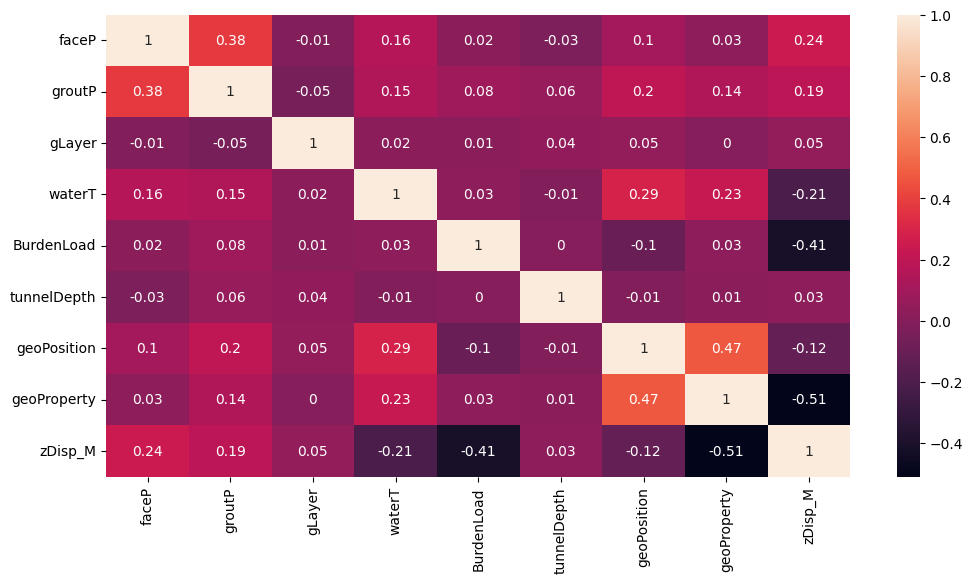

In [ ]:
plt.figure(figsize = (12, 6))
sns.heatmap(corr_table, annot = True)

<Axes: >

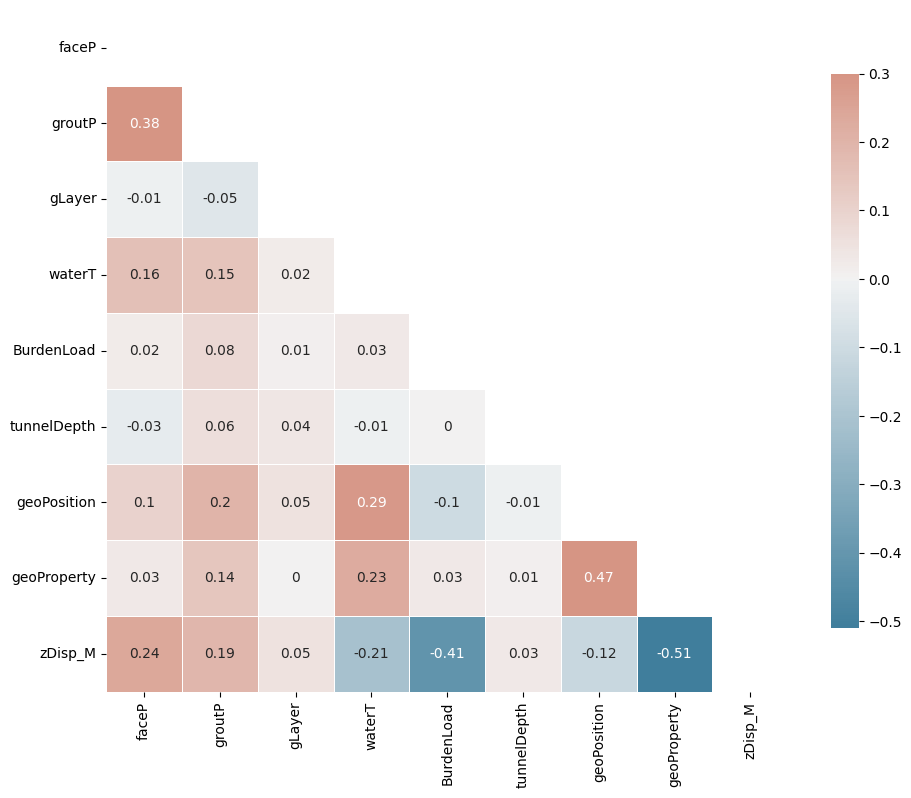

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_table, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_table, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})

In [ ]:
abs(corr_table["zDisp_M"]).sort_values(axis = 0, ascending = False)

zDisp_M        1.00
geoProperty    0.51
BurdenLoad     0.41
faceP          0.24
waterT         0.21
groutP         0.19
geoPosition    0.12
gLayer         0.05
tunnelDepth    0.03
Name: zDisp_M, dtype: float64

In [ ]:
corr_table[corr_table["zDisp_M"]>0]

faceP  groutP  gLayer  waterT  BurdenLoad  tunnelDepth  \
faceP         1.00    0.38   -0.01    0.16        0.02        -0.03   
groutP        0.38    1.00   -0.05    0.15        0.08         0.06   
gLayer       -0.01   -0.05    1.00    0.02        0.01         0.04   
tunnelDepth  -0.03    0.06    0.04   -0.01        0.00         1.00   
zDisp_M       0.24    0.19    0.05   -0.21       -0.41         0.03   

             geoPosition  geoProperty  zDisp_M  
faceP               0.10         0.03     0.24  
groutP              0.20         0.14     0.19  
gLayer              0.05         0.00     0.05  
tunnelDepth        -0.01         0.01     0.03  
zDisp_M            -0.12        -0.51     1.00

## Evalaute the values in each category

In [ ]:
dfRead["gLayer"].value_counts()

1    269
0    257
Name: gLayer, dtype: int64

In [ ]:
dfRead["waterT"].value_counts()

In [ ]:
dfRead["tunnelDepth"].value_counts()

12    146
14    124
10    103
15     53
11     50
13     50
Name: tunnelDepth, dtype: int64

In [ ]:
dfRead["geoProperty"].value_counts()

model0    292
model2     50
model3     49
model5     47
model4     45
model1     43
Name: geoProperty, dtype: int64

In [ ]:
dfRead["geoPosition"].value_counts()

z    242
B     87
F     74
E     40
D     40
A     28
C     15
Name: geoPosition, dtype: int64

## Dummies variable

In [ ]:
dfRead

faceP  groutP  gLayer   zDisp_M  waterT  BurdenLoad  tunnelDepth  \
0       70     300       0  -7.51789       3         102           15   
1      190     340       1  -7.07843       3         102           15   
2      150     160       0  -7.81465       3         102           15   
3      300     150       1  -7.52817       3         102           15   
4      180     320       0  -7.27724       3         102           15   
..     ...     ...     ...       ...     ...         ...          ...   
521    150     290       1 -14.10640       5          96           12   
522    140     330       0 -14.08380       5          96           12   
523    260     290       0 -12.96760       6         122           12   
524    140     140       0 -15.81460       6         122           12   
525    230     190       0 -14.30110       6         122           12   

    geoPosition geoProperty  
0             z      model0  
1             z      model0  
2             z      model0  
3             z      model0  
4             z      model0  
..          ...         ...  
521           F      model5  
522           F      model5  
523           B      model5  
524           B      model5  
525           B      model5  

[526 rows x 9 columns]

In [ ]:
dfDummy = dfRead.loc[:,["geoProperty","geoPosition"]]
dfDummy.head(2)

geoProperty geoPosition
0      model0           z
1      model0           z

In [ ]:
catCol = ["geoProperty","geoPosition"]
dummies = pd.get_dummies(dfDummy,columns=catCol,drop_first=True)
dummies.shape

(526, 11)

In [ ]:
X_ = dfRead.drop(columns=catCol, axis = 1)
X_.shape

(526, 7)

In [ ]:
df = pd.concat([X_, dummies], axis = 1)
df.head(3)

faceP  groutP  gLayer  zDisp_M  waterT  BurdenLoad  tunnelDepth  \
0     70     300       0 -7.51789       3         102           15   
1    190     340       1 -7.07843       3         102           15   
2    150     160       0 -7.81465       3         102           15   

   geoProperty_model1  geoProperty_model2  geoProperty_model3  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   

   geoProperty_model4  geoProperty_model5  geoPosition_B  geoPosition_C  \
0                   0                   0              0              0   
1                   0                   0              0              0   
2                   0                   0              0              0   

   geoPosition_D  geoPosition_E  geoPosition_F  geoPosition_z  
0              0              0              0              1  
1              0              0              0              1  
2              0              0              0              1

In [ ]:
y = df["zDisp_M"]
X = df.drop(columns=["zDisp_M"])

<Axes: >

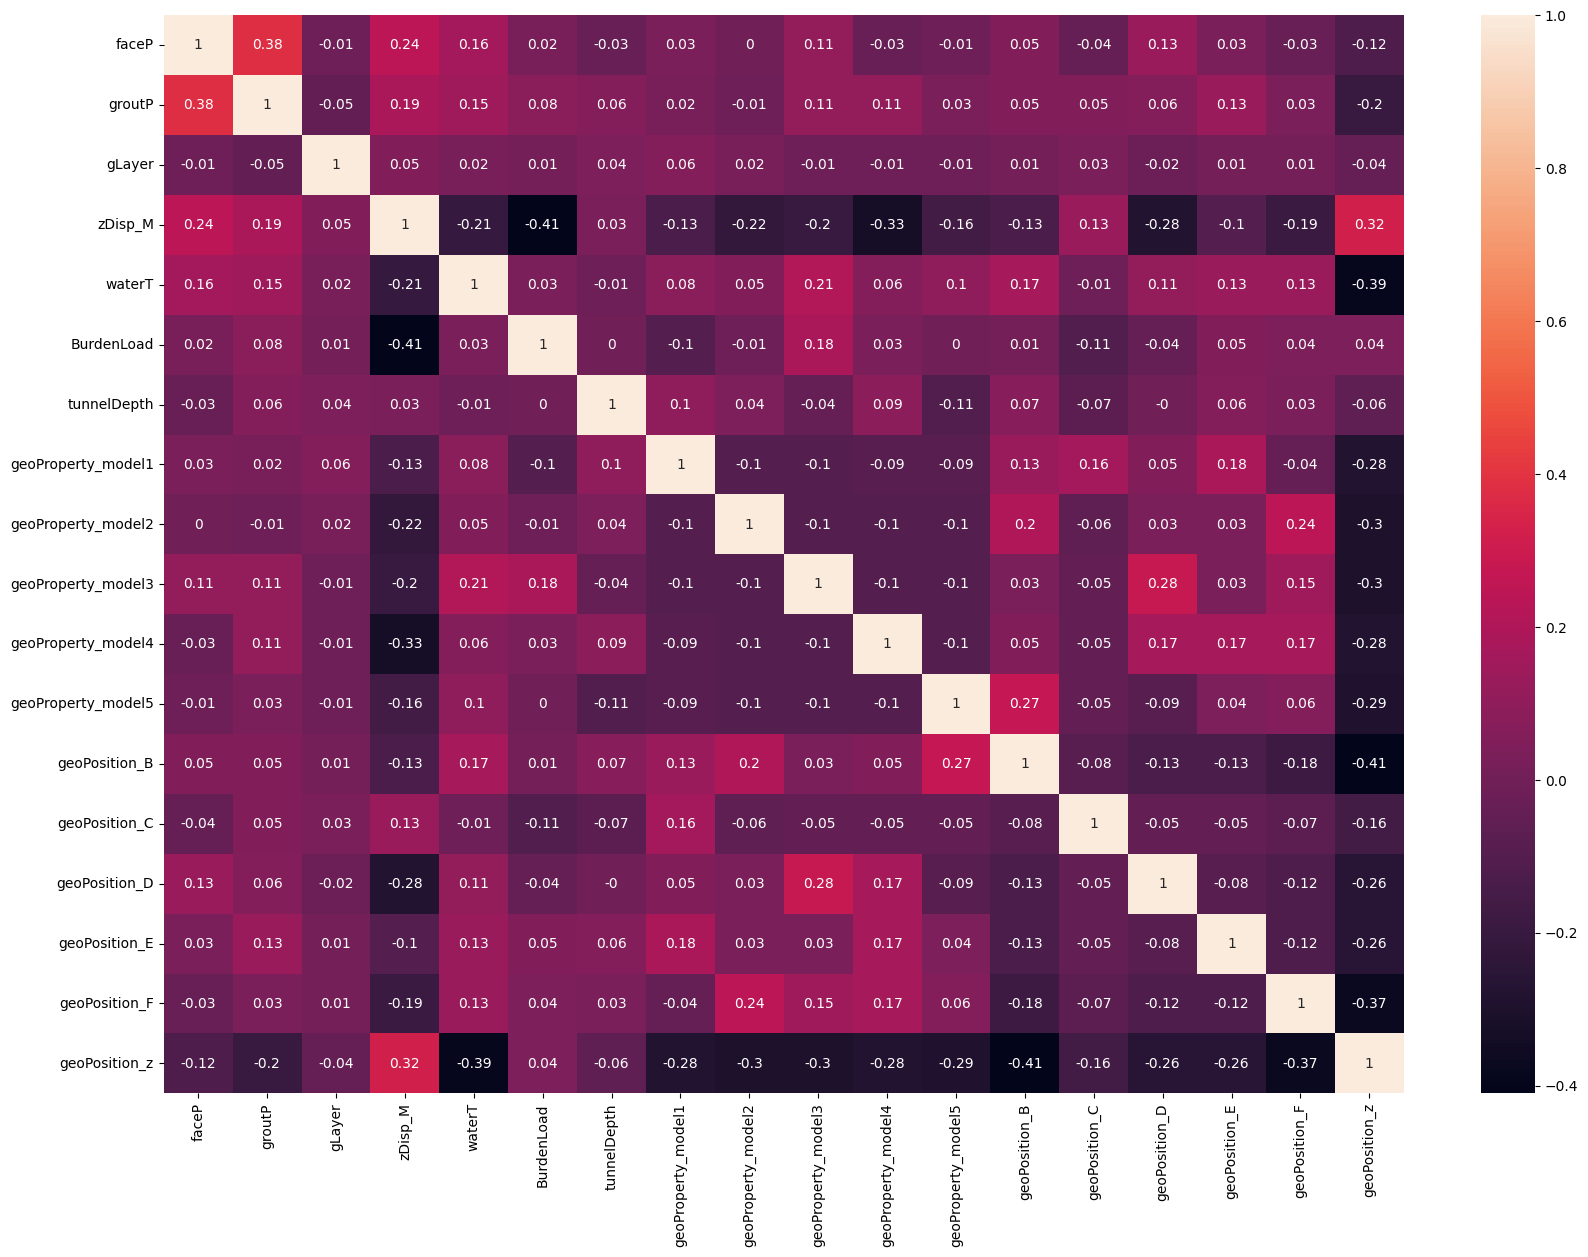

In [ ]:
#Correlation Analysis
corr_table = round(df.corr(method = 'pearson'), 2)
corr_table

plt.figure(figsize = (20, 14))
sns.heatmap(corr_table, annot = True)

# Split Train and Validation

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((420, 17), (106, 17), (420,), (106,))

In [ ]:
import pickle

In [ ]:
# Save the variables to disk
filename = 'data.pkl'
with open(filename, 'wb') as file:
    pickle.dump((X_train, X_val, y_train, y_val), file)

In [ ]:
# Load the variables from disk
fileName = 'data.pkl'
with open(sourceAddress + fileName, 'rb') as file:
    X_train, X_val, y_train, y_val = pickle.load(file)

ModuleNotFoundError: No module named 'pandas.core.indexes.numeric'

In [ ]:
# Load the data using Pandas
data = pd.read_pickle(sourceAddress + 'data.pkl')

X_train, X_val, y_train, y_val = data

# Develop Machine learning

# ML_Linear Regression

In [ ]:
X_train["constant"] = 1
X_val["constant"] = 1

## Model1: Simple Regression

In [ ]:
lm = sm.OLS(y_train,X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                zDisp_M   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     83.70
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          2.11e-120
Time:                        03:17:42   Log-Likelihood:                -966.03
No. Observations:                 420   AIC:                             1968.
Df Residuals:                     402   BIC:                             2041.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
faceP                  0.0132      0.002      7.609      0.000       0.010       0.017
groutP                 0.0117      0.002      7.320      0.000       0.009       0.015
gLayer                 0.5049      0.245      2.063      0.040       0.024       0.986
waterT                -0.6207      0.087     -7.174      0.000      -0.791      -0.451
BurdenLoad            -0.0454      0.003    -14.722      0.000      -0.051      -0.039
tunnelDepth            0.1910      0.077      2.472      0.014       0.039       0.343
geoProperty_model1    -9.5527      0.559    -17.085      0.000     -10.652      -8.454
geoProperty_model2    -9.5749      0.576    -16.634      0.000     -10.707      -8.443
geoProperty_model3    -7.7810      0.586    -13.277      0.000      -8.933      -6.629
geoProperty_model4   -11.1223      0.615    -18.077      0.000     -12.332      -9.913
geoProperty_model5    -9.7562      0.611    -15.970      0.000     -10.957      -8.555
geoPosition_B         -1.5168      0.595     -2.551      0.011      -2.686      -0.348
geoPosition_C         -2.7026      0.851     -3.174      0.002      -4.376      -1.029
geoPosition_D         -6.0131      0.681     -8.827      0.000      -7.352      -4.674
geoPosition_E         -1.3206      0.696     -1.898      0.058      -2.688       0.047
geoPosition_F         -2.2290      0.623     -3.576      0.000      -3.454      -1.004
geoPosition_z         -6.6944      0.623    -10.741      0.000      -7.920      -5.469
constant              -4.1874      1.275     -3.284      0.001      -6.694      -1.681
==============================================================================
Omnibus:                       41.381   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.328
Skew:                          -0.622   Prob(JB):                     5.35e-16
Kurtosis:                       4.573   Cond. No.                     3.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: ylabel='Probability'>

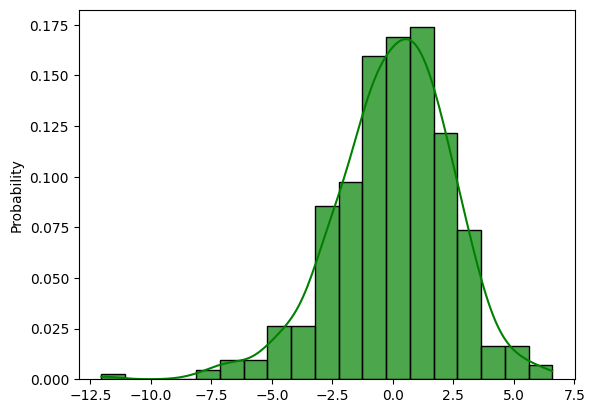

In [ ]:
#Check Assumptions of Regression
#Normality of residuals

#Plot histogram of residuals
sns.histplot(lm.resid, stat = 'probability',
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(lm.resid), max(lm.resid), 20))

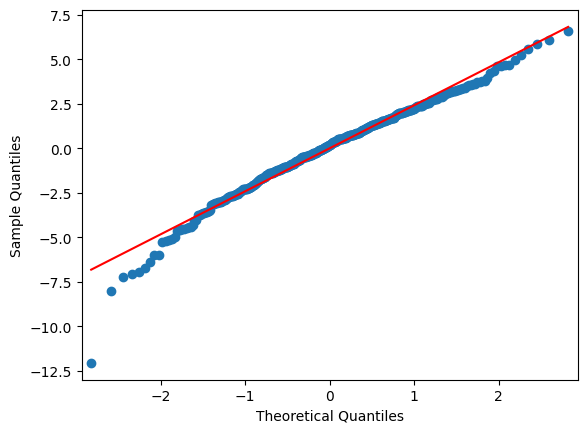

In [ ]:
#QQ-plot
qqplot_lm = sm.qqplot(lm.resid, line = 's')
plt.show()

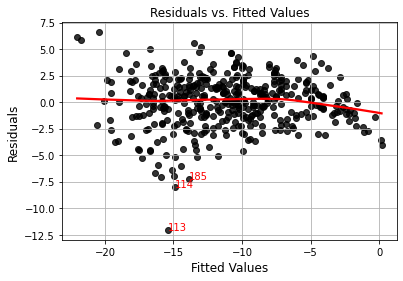

In [ ]:
#Residuals vs. Fitted Values
sns.regplot(x = lm.fittedvalues, y = lm.resid, lowess = True,
                       scatter_kws = {"color": "black"}, line_kws = {"color": "red"})
plt.xlabel('Fitted Values', fontsize = 12)
plt.ylabel('Residuals', fontsize = 12)
plt.title('Residuals vs. Fitted Values', fontsize = 12)
plt.grid()

#Top three observations with greates absolute value of the residual
top3 = abs(lm.resid).sort_values(ascending = False)[:3]
for i in top3.index:
    plt.annotate(i, xy = (lm.fittedvalues[i], lm.resid[i]), color = 'red')

In [ ]:
#Check Cook's distance
sum(lm.get_influence().summary_frame().cooks_d > 1)

0

In [ ]:
#Check Multicollinearity
#Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(X_train.iloc[:, :-1])
#If VIF > 10 then multicollinearity is high

variables        VIF
0                faceP   7.111585
1               groutP   9.474395
2               gLayer   2.112526
3               waterT   8.334177
4           BurdenLoad   4.658333
5          tunnelDepth  26.330552
6   geoProperty_model1   1.878516
7   geoProperty_model2   2.228593
8   geoProperty_model3   2.229507
9   geoProperty_model4   2.000164
10  geoProperty_model5   1.755980
11       geoPosition_B   3.855918
12       geoPosition_C   1.449316
13       geoPosition_D   2.496976
14       geoPosition_E   2.220116
15       geoPosition_F   3.452246
16       geoPosition_z   8.521007

### Box-Cox Transformation

In [ ]:
#Box-Cox Transformation
from scipy.stats import boxcox
box_results = boxcox(-1* y_train, alpha = 0.05)

In [ ]:
#log transformation
logy_train = np.log(-1*y_train)
logy_train

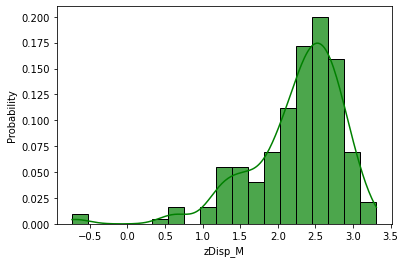

In [ ]:
#Histogram of Log Salary
sns.histplot(logy_train, stat = 'probability',
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(logy_train), max(logy_train), 20))

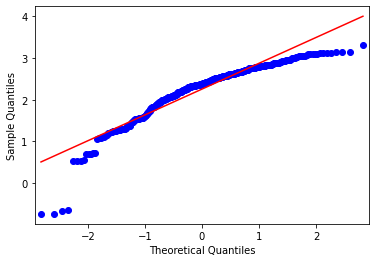

In [ ]:
#QQ-plot
qqplot_lm_bc = sm.qqplot(logy_train, line = 's')
plt.show()

Based on QQ plot and histogram is shows that log y is not recommended.

### Model1: Prediction on Simple Regression

In [ ]:
pred_SR = lm.predict(X_val)

In [ ]:
#Absolute error
abs_err_tree = abs(y_val - pred_SR)

In [ ]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp_Reg = pd.DataFrame({'Mean of Squared Error':  mean_squared_error(y_val , pred_SR),
                                  'RMSE': math.sqrt(mean_squared_error(y_val , pred_SR)),
                                  'R2':r2_score(y_val , pred_SR),
                                             'Mean of AbsErrors':    abs_err_tree.mean(),
                                             'Median of AbsErrors' : abs_err_tree.median(),
                                             'SD of AbsErrors' :     abs_err_tree.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_tree),
                                             'Min of AbsErrors':     abs_err_tree.min(),
                                             'Max of AbsErrors':     abs_err_tree.max()}, index = ['Simple Regression'])
model_comp_Reg

Mean of Squared Error      RMSE        R2  \
Simple Regression               6.870365  2.621138  0.734303   

                   Mean of AbsErrors  Median of AbsErrors  SD of AbsErrors  \
Simple Regression           2.031037             1.491181         1.664752   

                   IQR of AbsErrors  Min of AbsErrors  Max of AbsErrors  
Simple Regression          1.842819          0.039518          9.600385

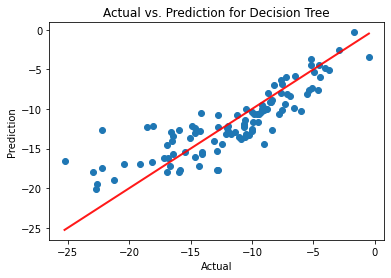

In [ ]:
#Actual vs. Prediction
plt.scatter(x = y_val, y = pred_SR)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction for Decision Tree')

#Add 45 degree line
xp = np.linspace(y_val.min(), y_val.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

## Model2: Best Subset

Algorithm:

1- Let M0 denote the null model , which contains no predictors.

2- For k = 1, 2,...p:

(a) Fit all Cr(p, k) models that contain exactly k predictors.

(b) Pick the best among these models, and call it Mk.
       The best is defined as having the largest R-squared.
       
3- Select a single best model from among M0, ..., Mp

   using cross-validated prediction error, AIC, BIC, or adjusted R-squared

In [ ]:
X_train.head()

faceP  groutP  gLayer  waterT  BurdenLoad  tunnelDepth  \
69     150     270       0       5          47           14   
477    140     290       1       5          81           10   
307     70     270       0       4          23           12   
173     50      60       0       5         130           12   
237    250     300       1       0          70           14   

     geoProperty_model1  geoProperty_model2  geoProperty_model3  \
69                    0                   0                   0   
477                   0                   0                   0   
307                   1                   0                   0   
173                   0                   0                   0   
237                   0                   0                   0   

     geoProperty_model4  geoProperty_model5  geoPosition_B  geoPosition_C  \
69                    0                   0              0              0   
477                   1                   0              0              0   
307                   0                   0              0              1   
173                   0                   0              0              0   
237                   0                   0              0              0   

     geoPosition_D  geoPosition_E  geoPosition_F  geoPosition_z  constant  
69               0              0              0              1         1  
477              1              0              0              0         1  
307              0              0              0              0         1  
173              0              0              0              1         1  
237              0              0              0              1         1

In [ ]:
#Define function to fit linear regression
def fit_lm(feature_set):
    reg_model = sm.OLS(y_train, X_train[['constant'] + list(feature_set)]).fit()
    return {'model': reg_model, 'RSquared': reg_model.rsquared}

In [ ]:
#Get All Combinations with 3 Variables
import itertools
list(itertools.combinations(X_train.iloc[:, :-1].columns, 3))

In [ ]:
len(list(itertools.combinations(X_train.iloc[:, :-1].columns, 3)))

680

In [ ]:
def bestsubset_func(k):
    res = []
    #Looping over all possible combinations
    for features in itertools.combinations(X_train.iloc[:, :-1].columns, k):
        res.append(fit_lm(features))

    models = pd.DataFrame(res)

    #Choose the model with the Highest RSquared
    best_model = models.iloc[models['RSquared'].argmax()]
         #Note: numpy.argmax() returns indices of the maximum values along with the specified axis.

    #Return the best model
    return best_model

In [ ]:
bestsubset_func(3)[0].model.exog_names

['constant', 'faceP', 'BurdenLoad', 'geoPosition_z']

In [ ]:
import time #to measure the processing time
models_bestsub = pd.DataFrame(columns = ['RSquared', 'model'])
start_time = time.time()
for i in range(1, len(X_train.iloc[:, 1:].columns) + 1):
    models_bestsub.loc[i] = bestsubset_func(i)
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  261.11755204200745 seconds


In [ ]:
models_bestsub

RSquared                                              model
1   0.169255  <statsmodels.regression.linear_model.Regressio...
2   0.268419  <statsmodels.regression.linear_model.Regressio...
3   0.354206  <statsmodels.regression.linear_model.Regressio...
4   0.420168  <statsmodels.regression.linear_model.Regressio...
5   0.461879  <statsmodels.regression.linear_model.Regressio...
6   0.525573  <statsmodels.regression.linear_model.Regressio...
7   0.617337  <statsmodels.regression.linear_model.Regressio...
8   0.667898  <statsmodels.regression.linear_model.Regressio...
9   0.707144  <statsmodels.regression.linear_model.Regressio...
10  0.736152  <statsmodels.regression.linear_model.Regressio...
11  0.763453  <statsmodels.regression.linear_model.Regressio...
12  0.767810  <statsmodels.regression.linear_model.Regressio...
13  0.770682  <statsmodels.regression.linear_model.Regressio...
14  0.773391  <statsmodels.regression.linear_model.Regressio...
15  0.776086  <statsmodels.regression.linear_model.Regressio...
16  0.777750  <statsmodels.regression.linear_model.Regressio...
17  0.779724  <statsmodels.regression.linear_model.Regressio...

In [ ]:
models_bestsub.loc[4, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                zDisp_M   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     75.18
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           6.77e-48
Time:                        23:06:55   Log-Likelihood:                -1169.3
No. Observations:                 420   AIC:                             2349.
Df Residuals:                     415   BIC:                             2369.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
constant        -11.5296      0.613    -18.822      0.000     -12.734     -10.326
faceP             0.0210      0.002      8.470      0.000       0.016       0.026
BurdenLoad       -0.0550      0.005    -11.798      0.000      -0.064      -0.046
geoPosition_D    -4.9912      0.726     -6.871      0.000      -6.419      -3.563
geoPosition_z     2.9201      0.404      7.236      0.000       2.127       3.713
==============================================================================
Omnibus:                       11.947   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.190
Skew:                           0.387   Prob(JB):                      0.00225
Kurtosis:                       3.312   Cond. No.                         795.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Adj. RSquared
models_bestsub_adjrs = models_bestsub.apply(lambda row: row[1].rsquared_adj, axis = 1)
models_bestsub_adjrs

1     0.167268
2     0.264910
3     0.349549
4     0.414580
5     0.455379
6     0.518681
7     0.610835
8     0.661434
9     0.700715
10    0.729701
11    0.757075
12    0.760964
13    0.763339
14    0.765558
15    0.767772
16    0.768926
17    0.770409
dtype: float64

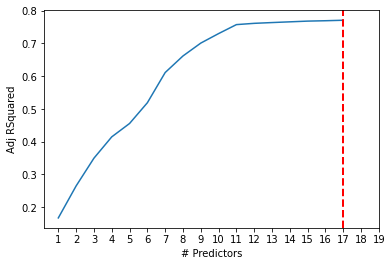

In [ ]:
#Adj. RSquared Plot
plt.plot(models_bestsub_adjrs)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Adj RSquared')
plt.axvline(models_bestsub_adjrs.argmax() + 1, color = 'red', linewidth = 2, linestyle = '--')

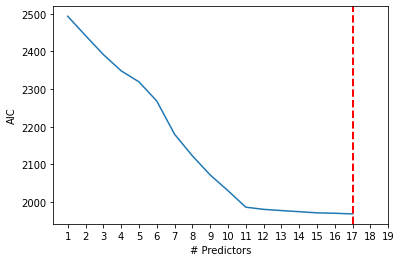

In [ ]:
#AIC Plot
models_bestsub_aic = models_bestsub.apply(lambda row: row[1].aic, axis = 1)
plt.plot(models_bestsub_aic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('AIC')
plt.axvline(models_bestsub_aic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

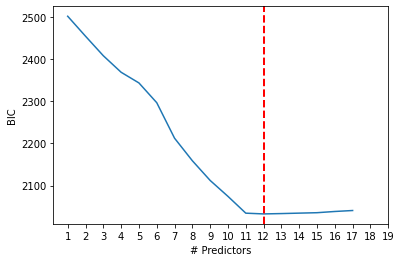

In [ ]:
#BIC Plot
models_bestsub_bic = models_bestsub.apply(lambda row: row[1].bic, axis = 1)
plt.plot(models_bestsub_bic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('BIC')
plt.axvline(models_bestsub_bic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

In [ ]:
#Model with 11 Variables
models_bestsub.loc[12, 'model'].params

constant              -5.950292
faceP                  0.013660
groutP                 0.011534
waterT                -0.587035
BurdenLoad            -0.045868
tunnelDepth            0.213861
geoProperty_model1    -9.416306
geoProperty_model2    -9.788763
geoProperty_model3    -7.866884
geoProperty_model4   -11.256354
geoProperty_model5    -9.484374
geoPosition_D         -4.397408
geoPosition_z         -5.082917
dtype: float64

In [ ]:
#Model with 12 Variables: Variable Names
models_bestsub.loc[12, 'model'].model.exog_names

['constant',
 'faceP',
 'groutP',
 'waterT',
 'BurdenLoad',
 'tunnelDepth',
 'geoProperty_model1',
 'geoProperty_model2',
 'geoProperty_model3',
 'geoProperty_model4',
 'geoProperty_model5',
 'geoPosition_D',
 'geoPosition_z']

#### Model 2: Prediction on Test Dataset

In [ ]:
X_val[models_bestsub.loc[12, 'model'].model.exog_names].head()

NameError: name 'models_bestsub' is not defined

In [ ]:
pred_bestsub = models_bestsub.loc[12, 'model'].predict(X_val[models_bestsub.loc[12, 'model'].model.exog_names])
pred_bestsub.head()

311   -17.232510
397   -12.836244
6      -9.774308
184   -10.915443
78     -8.692024
dtype: float64

In [ ]:
y_val.head()

311   -15.89370
397   -14.25650
6      -9.21729
184    -9.84230
78     -8.44962
Name: zDisp_M, dtype: float64

In [ ]:
#Absolute error
abs_err_bestsub = abs(y_val - pred_bestsub)

In [ ]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp_Reg = model_comp_Reg.append(pd.DataFrame({'Mean of Squared Error':  mean_squared_error(y_val , pred_bestsub),
                                  'RMSE': math.sqrt(mean_squared_error(y_val , pred_bestsub)),
                                  'R2':r2_score(y_val , pred_bestsub),
                                            'Mean of AbsErrors':    abs_err_bestsub.mean(),
                                             'Median of AbsErrors' : abs_err_bestsub.median(),
                                             'SD of AbsErrors' :     abs_err_bestsub.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_bestsub),
                                             'Min of AbsErrors':     abs_err_bestsub.min(),
                                             'Max of AbsErrors':     abs_err_bestsub.max()}, index = ['Bagging Reg_BIC_12']),
                               ignore_index = False)

model_comp_Reg

Mean of Squared Error      RMSE        R2  \
Simple Regression                6.870365  2.621138  0.734303   
Bagging Reg_BIC_12               7.030199  2.651452  0.728122   

                    Mean of AbsErrors  Median of AbsErrors  SD of AbsErrors  \
Simple Regression            2.031037             1.491181         1.664752   
Bagging Reg_BIC_12           2.000299             1.601123         1.748671   

                    IQR of AbsErrors  Min of AbsErrors  Max of AbsErrors  
Simple Regression           1.842819          0.039518          9.600385  
Bagging Reg_BIC_12          1.822787          0.025003          9.760073

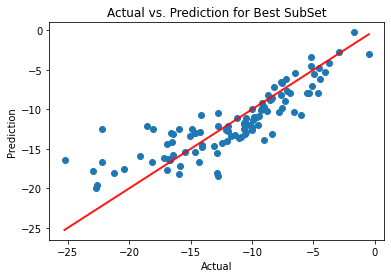

In [ ]:
#Actual vs. Prediction
plt.scatter(x = y_val, y = pred_bestsub)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction for Best SubSet')

#Add 45 degree line
xp = np.linspace(y_val.min(), y_val.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

## Model 3: Forward and Backward Stepwise Selection

Forward Stepwise Selection Algorithm:

1- Let M0 denote the null model , which contains no predictors.

2- For k = 0, 2,...p - 1:

(a) Consider all C(p, k) models that augment the predictors in Mk
       with one additional predictor.

(b) Pick the best among these models, and call it Mk+1.
       The best is defined as having the largest R-squared.
       
3- Select a single best model from among M0, ..., Mp
   using cross-validated prediction error, Cp, BIC, or adjusted R


In [ ]:
def forward_func(features):
    res = []
    # Pull out features still needed to process
    remaining_features = [_ for _ in X_train.iloc[:, :-1].columns if _ not in features]

    for f in remaining_features:
        res.append(fit_lm(features + [f]))

    models = pd.DataFrame(res)

    #Choose the model with the Highest RSquared
    best_model = models.iloc[models['RSquared'].argmax()]

    #Return the best model
    return best_model

In [ ]:
#Forward Selection Implementation
import time #to measure the processing time
models_fw = pd.DataFrame(columns = ['RSquared', 'model'])
start_time = time.time()
features = []
for i in range(1, len(X_train.iloc[:, :-1].columns) + 1):
    models_fw.loc[i] = forward_func(features)
    features = models_fw.loc[i, 'model'].model.exog_names[1:]
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  0.7522692680358887 seconds


In [ ]:
models_fw

RSquared                                              model
1   0.169255  <statsmodels.regression.linear_model.Regressio...
2   0.268419  <statsmodels.regression.linear_model.Regressio...
3   0.354206  <statsmodels.regression.linear_model.Regressio...
4   0.420168  <statsmodels.regression.linear_model.Regressio...
5   0.450127  <statsmodels.regression.linear_model.Regressio...
6   0.486591  <statsmodels.regression.linear_model.Regressio...
7   0.516506  <statsmodels.regression.linear_model.Regressio...
8   0.556189  <statsmodels.regression.linear_model.Regressio...
9   0.627106  <statsmodels.regression.linear_model.Regressio...
10  0.736152  <statsmodels.regression.linear_model.Regressio...
11  0.763453  <statsmodels.regression.linear_model.Regressio...
12  0.767810  <statsmodels.regression.linear_model.Regressio...
13  0.770682  <statsmodels.regression.linear_model.Regressio...
14  0.773391  <statsmodels.regression.linear_model.Regressio...
15  0.776086  <statsmodels.regression.linear_model.Regressio...
16  0.777750  <statsmodels.regression.linear_model.Regressio...
17  0.779724  <statsmodels.regression.linear_model.Regressio...

In [ ]:
models_fw.loc[17, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                zDisp_M   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     83.70
Date:                Thu, 10 Nov 2022   Prob (F-statistic):          2.11e-120
Time:                        23:28:39   Log-Likelihood:                -966.03
No. Observations:                 420   AIC:                             1968.
Df Residuals:                     402   BIC:                             2041.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
constant              -4.1874      1.275     -3.284      0.001      -6.694      -1.681
BurdenLoad            -0.0454      0.003    -14.722      0.000      -0.051      -0.039
geoPosition_z         -6.6944      0.623    -10.741      0.000      -7.920      -5.469
faceP                  0.0132      0.002      7.609      0.000       0.010       0.017
geoPosition_D         -6.0131      0.681     -8.827      0.000      -7.352      -4.674
geoProperty_model4   -11.1223      0.615    -18.077      0.000     -12.332      -9.913
groutP                 0.0117      0.002      7.320      0.000       0.009       0.015
geoProperty_model2    -9.5749      0.576    -16.634      0.000     -10.707      -8.443
geoProperty_model1    -9.5527      0.559    -17.085      0.000     -10.652      -8.454
geoProperty_model5    -9.7562      0.611    -15.970      0.000     -10.957      -8.555
geoProperty_model3    -7.7810      0.586    -13.277      0.000      -8.933      -6.629
waterT                -0.6207      0.087     -7.174      0.000      -0.791      -0.451
tunnelDepth            0.1910      0.077      2.472      0.014       0.039       0.343
geoPosition_F         -2.2290      0.623     -3.576      0.000      -3.454      -1.004
geoPosition_C         -2.7026      0.851     -3.174      0.002      -4.376      -1.029
gLayer                 0.5049      0.245      2.063      0.040       0.024       0.986
geoPosition_B         -1.5168      0.595     -2.551      0.011      -2.686      -0.348
geoPosition_E         -1.3206      0.696     -1.898      0.058      -2.688       0.047
==============================================================================
Omnibus:                       41.381   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.328
Skew:                          -0.622   Prob(JB):                     5.35e-16
Kurtosis:                       4.573   Cond. No.                     3.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

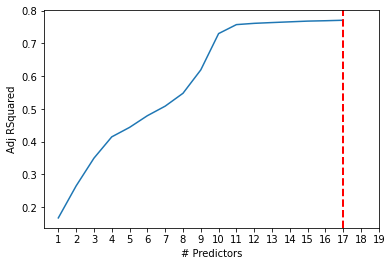

In [ ]:
#Adj. RSquared
models_fw_adjrs = models_fw.apply(lambda row: row[1].rsquared_adj, axis = 1)
models_fw_adjrs
#Adj. RSquared Plot
plt.plot(models_fw_adjrs)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Adj RSquared')
plt.axvline(models_fw_adjrs.argmax() + 1, color = 'red', linewidth = 2, linestyle = '--')

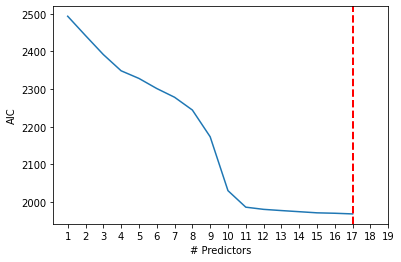

In [ ]:
#AIC Plot
models_fw_aic = models_fw.apply(lambda row: row[1].aic, axis = 1)
plt.plot(models_fw_aic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('AIC')
plt.axvline(models_fw_aic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

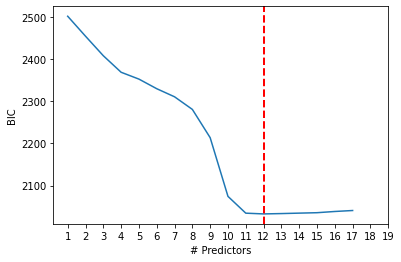

In [ ]:
#BIC Plot
models_fw_bic = models_fw.apply(lambda row: row[1].bic, axis = 1)
plt.plot(models_fw_bic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('BIC')
plt.axvline(models_fw_bic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

In [ ]:
#Model with 12 Variables
models_fw.loc[12, 'model'].params

constant              -5.950292
BurdenLoad            -0.045868
geoPosition_z         -5.082917
faceP                  0.013660
geoPosition_D         -4.397408
geoProperty_model4   -11.256354
groutP                 0.011534
geoProperty_model2    -9.788763
geoProperty_model1    -9.416306
geoProperty_model5    -9.484374
geoProperty_model3    -7.866884
waterT                -0.587035
tunnelDepth            0.213861
dtype: float64

Backward Selection Algorithm:

1- Let Mp denote the full model , which contains all predictors.

2- For k = p, p - 1,..., 1:

(a) Consider all k models that contain all but one of the predictors
       in  Mk, for a total of k ??? 1 predictors.

(b) Pick the best among these models, and call it Mk-1.
       The best is defined as having the largest R-squared.

3- Select a single best model from among M0, ..., Mp
   using cross-validated prediction error, Cp, BIC, or adjusted R

In [ ]:
def backward_func(features):
    res = []
    for features in itertools.combinations(features, len(features) - 1):
        res.append(fit_lm(features))

    models = pd.DataFrame(res)

    #Choose the model with the Highest RSquared
    best_model = models.iloc[models['RSquared'].argmax()]

    #Return the best model
    return best_model

In [ ]:
#Backward Selection Implementation
models_bw = pd.DataFrame(columns = ['RSquared', 'model'])
start_time = time.time()
features = X_train.columns
while(len(features) > 1):
    models_bw.loc[len(features) - 1] = backward_func(features)
    features = models_bw.loc[len(features) - 1]["model"].model.exog_names[1:]
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  0.39958620071411133 seconds


In [ ]:
models_bw

RSquared                                              model
17  0.779724  <statsmodels.regression.linear_model.Regressio...
16  0.777750  <statsmodels.regression.linear_model.Regressio...
15  0.776086  <statsmodels.regression.linear_model.Regressio...
14  0.773391  <statsmodels.regression.linear_model.Regressio...
13  0.770682  <statsmodels.regression.linear_model.Regressio...
12  0.767810  <statsmodels.regression.linear_model.Regressio...
11  0.763453  <statsmodels.regression.linear_model.Regressio...
10  0.736152  <statsmodels.regression.linear_model.Regressio...
9   0.707144  <statsmodels.regression.linear_model.Regressio...
8   0.657768  <statsmodels.regression.linear_model.Regressio...
7   0.601969  <statsmodels.regression.linear_model.Regressio...
6   0.524919  <statsmodels.regression.linear_model.Regressio...
5   0.445244  <statsmodels.regression.linear_model.Regressio...
4   0.383643  <statsmodels.regression.linear_model.Regressio...
3   0.322015  <statsmodels.regression.linear_model.Regressio...
2   0.255720  <statsmodels.regression.linear_model.Regressio...
1   0.169255  <statsmodels.regression.linear_model.Regressio...

In [ ]:
models_bw.loc[17, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                zDisp_M   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     83.70
Date:                Thu, 10 Nov 2022   Prob (F-statistic):          2.11e-120
Time:                        23:29:30   Log-Likelihood:                -966.03
No. Observations:                 420   AIC:                             1968.
Df Residuals:                     402   BIC:                             2041.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
constant              -4.1874      1.275     -3.284      0.001      -6.694      -1.681
faceP                  0.0132      0.002      7.609      0.000       0.010       0.017
groutP                 0.0117      0.002      7.320      0.000       0.009       0.015
gLayer                 0.5049      0.245      2.063      0.040       0.024       0.986
waterT                -0.6207      0.087     -7.174      0.000      -0.791      -0.451
BurdenLoad            -0.0454      0.003    -14.722      0.000      -0.051      -0.039
tunnelDepth            0.1910      0.077      2.472      0.014       0.039       0.343
geoProperty_model1    -9.5527      0.559    -17.085      0.000     -10.652      -8.454
geoProperty_model2    -9.5749      0.576    -16.634      0.000     -10.707      -8.443
geoProperty_model3    -7.7810      0.586    -13.277      0.000      -8.933      -6.629
geoProperty_model4   -11.1223      0.615    -18.077      0.000     -12.332      -9.913
geoProperty_model5    -9.7562      0.611    -15.970      0.000     -10.957      -8.555
geoPosition_B         -1.5168      0.595     -2.551      0.011      -2.686      -0.348
geoPosition_C         -2.7026      0.851     -3.174      0.002      -4.376      -1.029
geoPosition_D         -6.0131      0.681     -8.827      0.000      -7.352      -4.674
geoPosition_E         -1.3206      0.696     -1.898      0.058      -2.688       0.047
geoPosition_F         -2.2290      0.623     -3.576      0.000      -3.454      -1.004
geoPosition_z         -6.6944      0.623    -10.741      0.000      -7.920      -5.469
==============================================================================
Omnibus:                       41.381   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.328
Skew:                          -0.622   Prob(JB):                     5.35e-16
Kurtosis:                       4.573   Cond. No.                     3.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

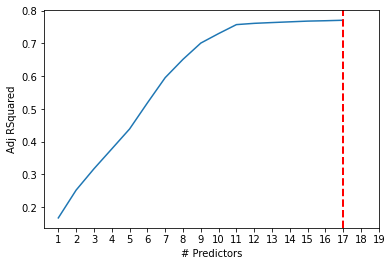

In [ ]:
#Adj. RSquared
models_bw_adjrs = models_bw.apply(lambda row: row[1].rsquared_adj, axis = 1)
models_bw_adjrs = models_bw_adjrs.sort_index()
#Adj. RSquared Plot
plt.plot(models_bw_adjrs)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Adj RSquared')
plt.axvline(models_bw_adjrs.argmax() + 1, color = 'red', linewidth = 2, linestyle = '--')

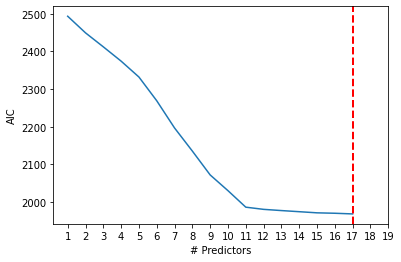

In [ ]:
#AIC Plot
models_bw_aic = models_bw.apply(lambda row: row[1].aic, axis = 1)
models_bw_aic = models_bw_aic.sort_index()
plt.plot(models_bw_aic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('AIC')
plt.axvline(models_bw_aic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

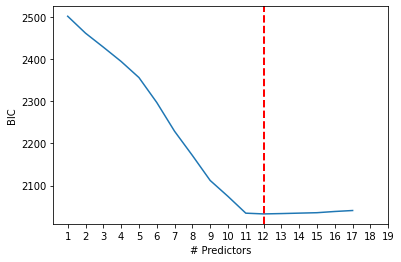

In [ ]:
#BIC Plot
models_bw_bic = models_bw.apply(lambda row: row[1].bic, axis = 1)
models_bw_bic = models_bw_bic.sort_index()
plt.plot(models_bw_bic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('BIC')
plt.axvline(models_bw_bic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

### Model 3: Prediction on Test Dataset

In [ ]:
#Forward Selection Model with 7 Variables
models_fw.loc[17, 'model'].params

constant              -4.187376
BurdenLoad            -0.045404
geoPosition_z         -6.694351
faceP                  0.013158
geoPosition_D         -6.013070
geoProperty_model4   -11.122251
groutP                 0.011718
geoProperty_model2    -9.574899
geoProperty_model1    -9.552715
geoProperty_model5    -9.756176
geoProperty_model3    -7.781013
waterT                -0.620731
tunnelDepth            0.191016
geoPosition_F         -2.229017
geoPosition_C         -2.702613
gLayer                 0.504854
geoPosition_B         -1.516826
geoPosition_E         -1.320567
dtype: float64

In [ ]:
pred_fw = models_fw.loc[17, 'model'].predict(X_val[models_fw.loc[17, 'model'].model.exog_names])
pred_fw.head()

311   -17.656231
397   -12.769094
6     -10.017543
184   -10.665816
78     -9.078092
dtype: float64

In [ ]:
#Absolute error
abs_err_fw = abs(y_val - pred_fw)

In [ ]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp_Reg = model_comp_Reg.append(pd.DataFrame({'Mean of Squared Error':  mean_squared_error(y_val , pred_fw),
                                  'RMSE': math.sqrt(mean_squared_error(y_val , pred_fw)),
                                  'R2':r2_score(y_val , pred_fw),
                                            'Mean of AbsErrors':    abs_err_fw.mean(),
                                             'Median of AbsErrors' : abs_err_fw.median(),
                                             'SD of AbsErrors' :     abs_err_fw.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_fw),
                                             'Min of AbsErrors':     abs_err_fw.min(),
                                             'Max of AbsErrors':     abs_err_fw.max()}, index = ['Bagging Reg']),
                               ignore_index = False)

model_comp_Reg

Mean of Squared Error      RMSE        R2  \
Simple Regression                6.870365  2.621138  0.734303   
Bagging Reg_BIC_12               7.030199  2.651452  0.728122   
Bagging Reg                      6.870365  2.621138  0.734303   

                    Mean of AbsErrors  Median of AbsErrors  SD of AbsErrors  \
Simple Regression            2.031037             1.491181         1.664752   
Bagging Reg_BIC_12           2.000299             1.601123         1.748671   
Bagging Reg                  2.031037             1.491181         1.664752   

                    IQR of AbsErrors  Min of AbsErrors  Max of AbsErrors  
Simple Regression           1.842819          0.039518          9.600385  
Bagging Reg_BIC_12          1.822787          0.025003          9.760073  
Bagging Reg                 1.842819          0.039518          9.600385

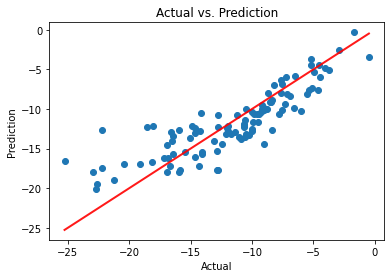

In [ ]:
#Actual vs. Prediction
plt.scatter(x = y_val, y = pred_fw)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_val.min(), y_val.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

## Model 4: Using K-fold Cross-Validation Approach

In [ ]:
k = 5
np.random.seed(123)
folds = np.random.randint(low = 1, high = k + 1, size = X_train.shape[0])

In [ ]:
folds

array([3, 3, 7, ..., 2, 2, 8])

In [ ]:
cv_errors = pd.DataFrame(index = range(1, k + 1), columns = range(1, 20))

In [ ]:
cv_errors

1    2    3    4    5    6    7    8    9    10   11   12   13   14   15  \
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    16   17   18   19  
1  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  
5  NaN  NaN  NaN  NaN

In [ ]:
#Forward Stepwise Regression Results
models_fw

RSquared                                              model
1   0.169255  <statsmodels.regression.linear_model.Regressio...
2   0.268419  <statsmodels.regression.linear_model.Regressio...
3   0.354206  <statsmodels.regression.linear_model.Regressio...
4   0.420168  <statsmodels.regression.linear_model.Regressio...
5   0.450127  <statsmodels.regression.linear_model.Regressio...
6   0.486591  <statsmodels.regression.linear_model.Regressio...
7   0.516506  <statsmodels.regression.linear_model.Regressio...
8   0.556189  <statsmodels.regression.linear_model.Regressio...
9   0.627106  <statsmodels.regression.linear_model.Regressio...
10  0.736152  <statsmodels.regression.linear_model.Regressio...
11  0.763453  <statsmodels.regression.linear_model.Regressio...
12  0.767810  <statsmodels.regression.linear_model.Regressio...
13  0.770682  <statsmodels.regression.linear_model.Regressio...
14  0.773391  <statsmodels.regression.linear_model.Regressio...
15  0.776086  <statsmodels.regression.linear_model.Regressio...
16  0.777750  <statsmodels.regression.linear_model.Regressio...
17  0.779724  <statsmodels.regression.linear_model.Regressio...

In [ ]:
#Forward Stepwise Regression using K-fold Cross Validation
for i in range(1, models_fw.shape[0] + 1):
    for j in range(1, k + 1):
        reg_model = sm.OLS(y_train[folds != j], X_train.loc[folds != j, models_fw.loc[i, 'model'].model.exog_names]).fit()
        pred = reg_model.predict(X_train.loc[folds == j, models_fw.loc[i, 'model'].model.exog_names])
        cv_errors.iloc[j - 1, i - 1] = ((y_train[folds == j] - pred) ** 2).mean()

In [ ]:
cv_errors

1          2          3          4          5          6   \
1  20.650326  19.607242  16.985927  15.099122  14.350447  14.363759   
2  24.474942  20.364887  16.129329  14.125896  13.534395  11.771735   
3  17.119381  13.725499  13.372229  12.405755  11.894807  11.653548   
4  27.297526  25.489112  22.809601  21.828762  20.702791  19.443195   
5  20.454573  17.890607  17.423879  14.655132  13.616879  12.623655   

          7          8          9          10         11        12        13  \
1  13.480639  12.303758   8.433244   5.888745   5.697819   5.72707  5.910386   
2   10.86463   9.805832    8.52493   5.966075   5.533916  5.319559   5.23538   
3  11.357056  10.564161   9.421065    6.77878   5.374915  5.164313  4.982528   
4  18.406971   16.96808  15.131199  11.174852  10.120646  9.950904  9.850016   
5  11.711964  10.618917    9.85212   6.762113   6.429096  6.560476  6.486412   

         14        15        16        17   18   19  
1  5.926372   5.74485  5.601199  5.675453  NaN  NaN  
2  5.079589  5.037259  4.909681  4.996499  NaN  NaN  
3  4.836485   4.89125  4.949915  4.785213  NaN  NaN  
4  9.744715   9.75992  9.806447  9.722602  NaN  NaN  
5  6.491481  6.280721  6.453641  6.375469  NaN  NaN

In [ ]:
mean_cv_erros = cv_errors.mean(axis = 0)
mean_cv_erros

1     21.999350
2     19.415469
3     17.344193
4     15.622933
5     14.819864
6     13.971178
7     13.164252
8     12.052150
9     10.272512
10     7.314113
11     6.631279
12     6.544464
13     6.492944
14     6.415728
15     6.342800
16     6.344177
17     6.311047
18          NaN
19          NaN
dtype: float64

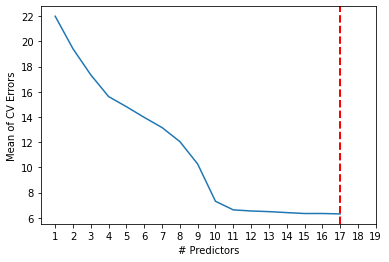

In [ ]:
#Mean of CV Errors Plot
plt.plot(mean_cv_erros)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Mean of CV Errors')
plt.axvline(mean_cv_erros.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

### Model 4: Prediction on Test Dataset

In [ ]:
#Forward Selection Model with 5 Variables
models_fw.loc[17, 'model'].params

const         4.575593
CHits         0.000466
Hits          0.005712
Division_W   -0.199733
Walks         0.005095
Years         0.044819
dtype: float64

In [ ]:
pred_fw_cv = models_fw.loc[17, 'model'].predict(X_val[models_fw.loc[17, 'model'].model.exog_names])
pred_fw_cv.head()

311   -17.656231
397   -12.769094
6     -10.017543
184   -10.665816
78     -9.078092
dtype: float64

In [ ]:
#Absolute error
abs_err_fw_cv = abs(y_val - pred_fw_cv)

In [ ]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp_Reg = model_comp_Reg.append(pd.DataFrame({'Mean of Squared Error':  mean_squared_error(y_val , pred_fw_cv),
                                  'RMSE': math.sqrt(mean_squared_error(y_val , pred_fw_cv)),
                                  'R2':r2_score(y_val , pred_fw_cv),
                                            'Mean of AbsErrors':    abs_err_fw_cv.mean(),
                                             'Median of AbsErrors' : abs_err_fw_cv.median(),
                                             'SD of AbsErrors' :     abs_err_fw_cv.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_fw_cv),
                                             'Min of AbsErrors':     abs_err_fw_cv.min(),
                                             'Max of AbsErrors':     abs_err_fw_cv.max()}, index = ['Forward Step CV']),
                               ignore_index = False)

model_comp_Reg

Mean of Squared Error      RMSE        R2  \
Simple Regression                6.870365  2.621138  0.734303   
Bagging Reg_BIC_12               7.030199  2.651452  0.728122   
Bagging Reg                      6.870365  2.621138  0.734303   
Forward Step CV                  6.870365  2.621138  0.734303   

                    Mean of AbsErrors  Median of AbsErrors  SD of AbsErrors  \
Simple Regression            2.031037             1.491181         1.664752   
Bagging Reg_BIC_12           2.000299             1.601123         1.748671   
Bagging Reg                  2.031037             1.491181         1.664752   
Forward Step CV              2.031037             1.491181         1.664752   

                    IQR of AbsErrors  Min of AbsErrors  Max of AbsErrors  
Simple Regression           1.842819          0.039518          9.600385  
Bagging Reg_BIC_12          1.822787          0.025003          9.760073  
Bagging Reg                 1.842819          0.039518          9.600385  
Forward Step CV             1.842819          0.039518          9.600385

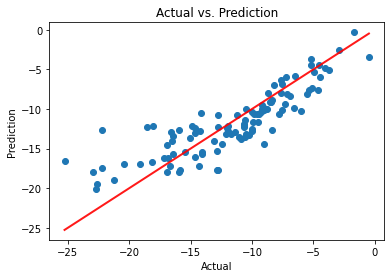

In [ ]:
#Actual vs. Prediction
plt.scatter(x = y_val, y = pred_fw_cv)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_val.min(), y_val.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

# ML_Regression tree

In [ ]:
X_train.drop(columns=["constant"], inplace=True)
X_val.drop(columns=["constant"], inplace=True)

KeyError: "['constant'] not found in axis"

## Model 1: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
reg_tree = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 5, ccp_alpha = 0.01)

In [ ]:
tree_res = reg_tree.fit(X_train, y_train)

[Text(0.4732142857142857, 0.9, 'BurdenLoad <= 80.0\nsquared_error = 26.447\nsamples = 420\nvalue = -11.067'),
 Text(0.23214285714285715, 0.7, 'geoPosition_D <= 0.5\nsquared_error = 23.305\nsamples = 242\nvalue = -9.037'),
 Text(0.14285714285714285, 0.5, 'faceP <= 105.0\nsquared_error = 19.475\nsamples = 219\nvalue = -8.379'),
 Text(0.07142857142857142, 0.3, 'waterT <= 1.5\nsquared_error = 26.767\nsamples = 58\nvalue = -11.159'),
 Text(0.03571428571428571, 0.1, 'squared_error = 0.828\nsamples = 10\nvalue = -5.567'),
 Text(0.10714285714285714, 0.1, 'squared_error = 24.298\nsamples = 48\nvalue = -12.324'),
 Text(0.21428571428571427, 0.3, 'geoProperty_model2 <= 0.5\nsquared_error = 13.06\nsamples = 161\nvalue = -7.377'),
 Text(0.17857142857142858, 0.1, 'squared_error = 11.152\nsamples = 145\nvalue = -6.849'),
 Text(0.25, 0.1, 'squared_error = 4.899\nsamples = 16\nvalue = -12.164'),
 Text(0.32142857142857145, 0.5, 'BurdenLoad <= 40.0\nsquared_error = 16.3\nsamples = 23\nvalue = -15.309'),
 

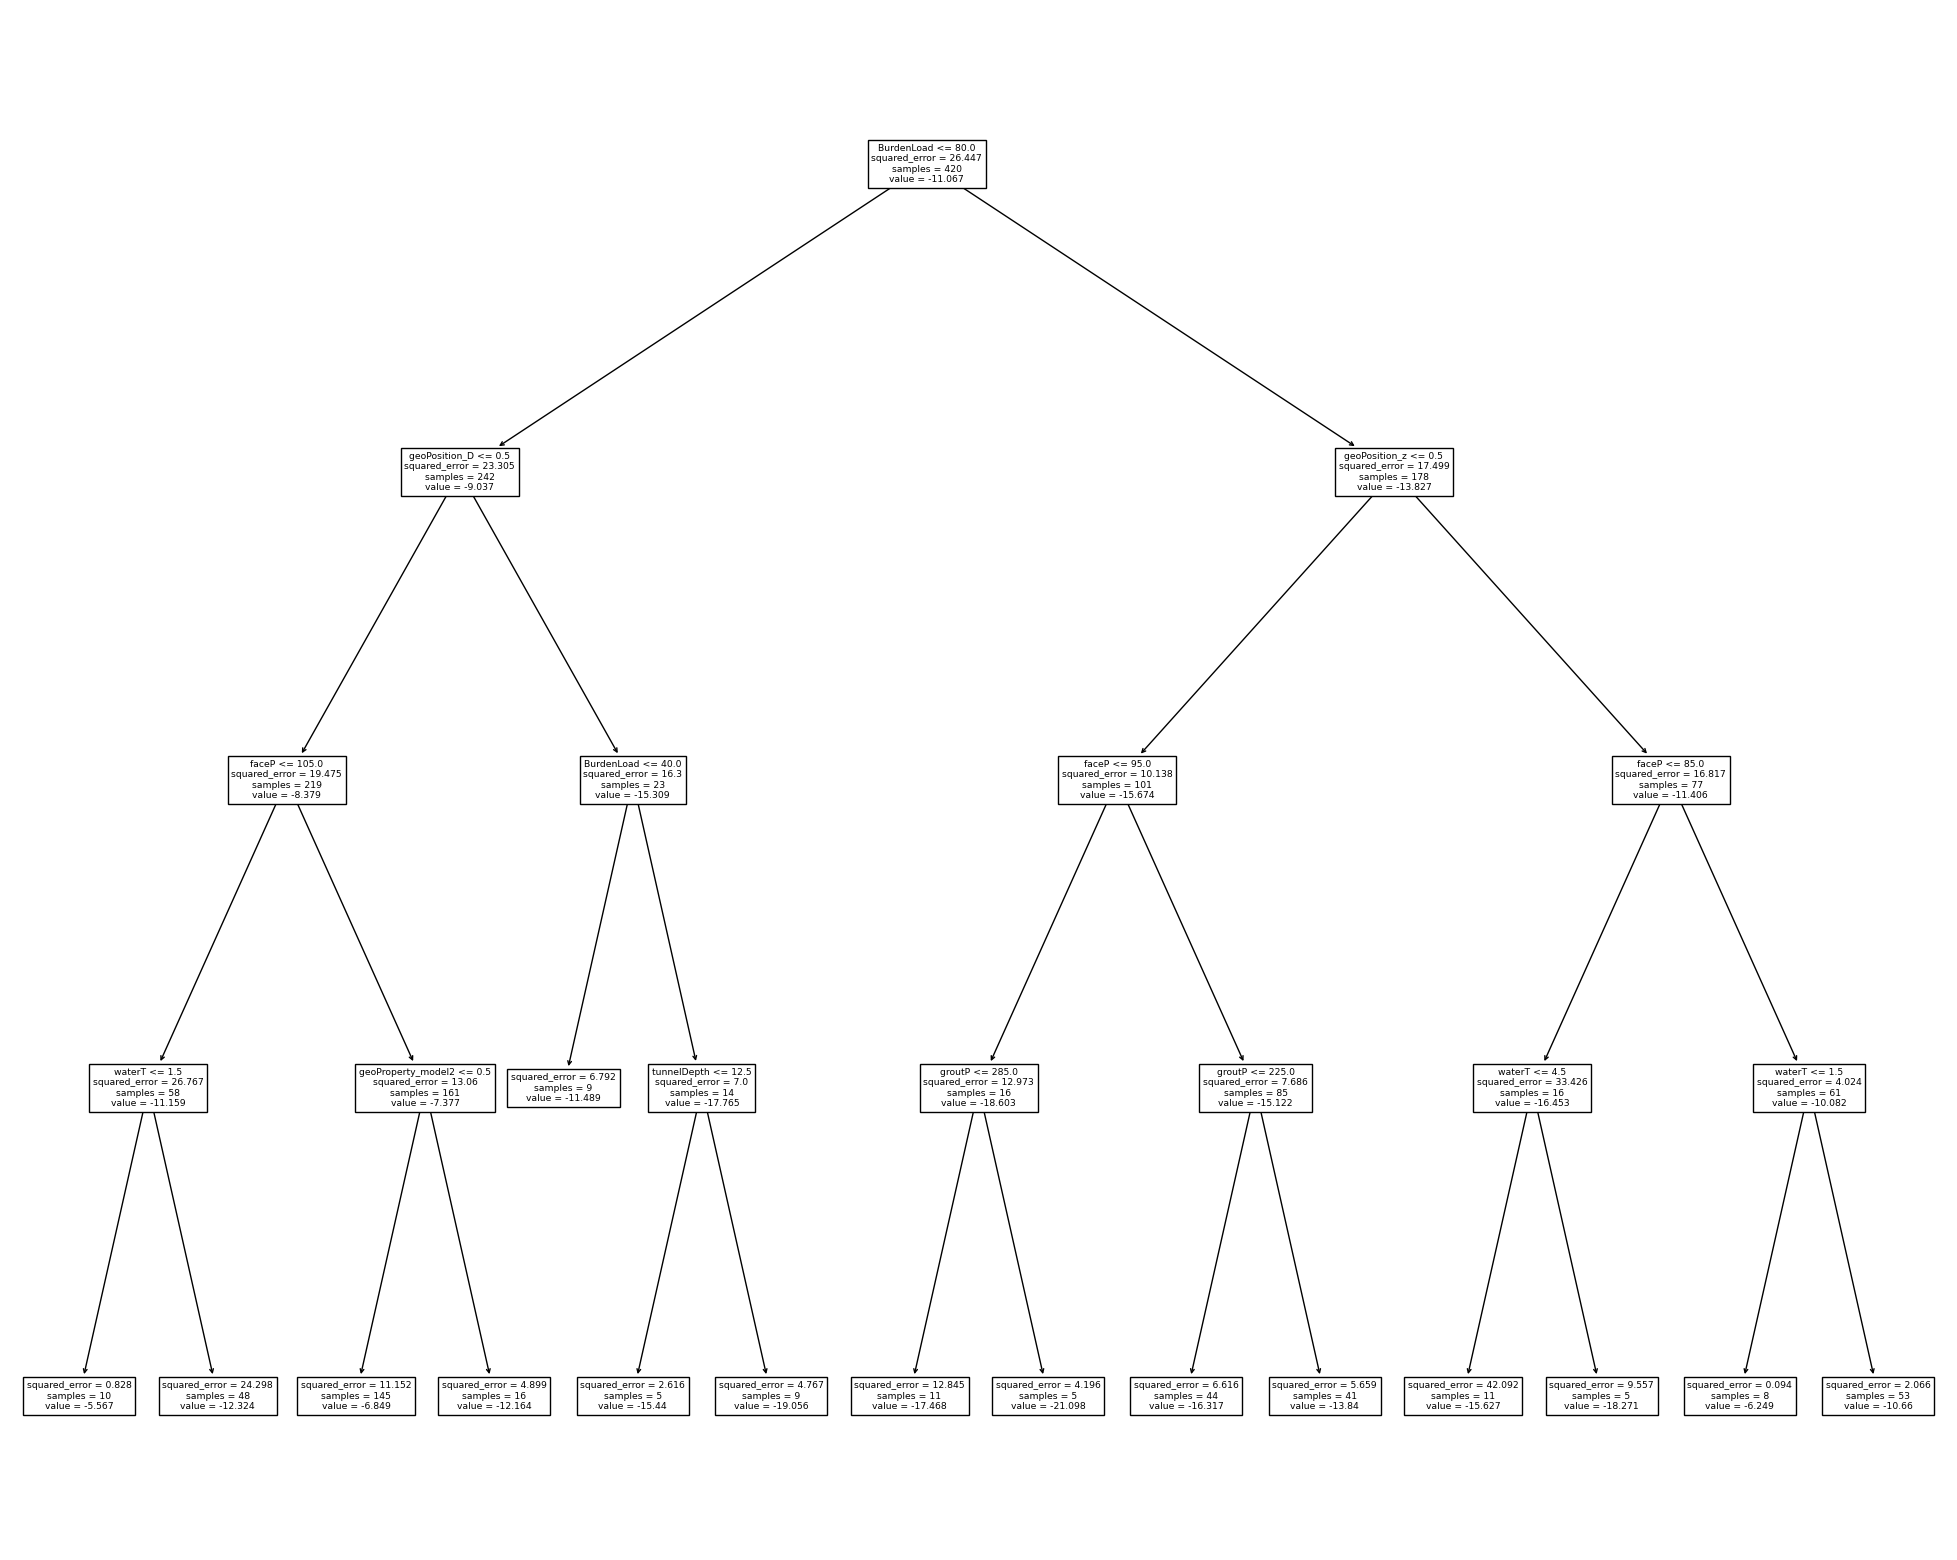

In [ ]:
#Plot the Tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (25, 20))
plot_tree(tree_res, feature_names =X_train.columns)

In [ ]:
#To save the figure to the .png file:
fig.savefig('decistion_tree.png')

[Text(0.5520833333333334, 0.9166666666666666, 'BurdenLoad <= 80.0\nsquared_error = 26.447\nsamples = 420\nvalue = -11.067'),
 Text(0.3072916666666667, 0.75, 'geoPosition_D <= 0.5\nsquared_error = 23.305\nsamples = 242\nvalue = -9.037'),
 Text(0.16666666666666666, 0.5833333333333334, 'faceP <= 105.0\nsquared_error = 19.475\nsamples = 219\nvalue = -8.379'),
 Text(0.08333333333333333, 0.4166666666666667, 'waterT <= 1.5\nsquared_error = 26.767\nsamples = 58\nvalue = -11.159'),
 Text(0.041666666666666664, 0.25, 'BurdenLoad <= 40.0\nsquared_error = 0.828\nsamples = 10\nvalue = -5.567'),
 Text(0.020833333333333332, 0.08333333333333333, 'squared_error = 0.045\nsamples = 5\nvalue = -4.676'),
 Text(0.0625, 0.08333333333333333, 'squared_error = 0.027\nsamples = 5\nvalue = -6.457'),
 Text(0.125, 0.25, 'tunnelDepth <= 12.5\nsquared_error = 24.298\nsamples = 48\nvalue = -12.324'),
 Text(0.10416666666666667, 0.08333333333333333, 'squared_error = 10.027\nsamples = 26\nvalue = -15.03'),
 Text(0.1458333

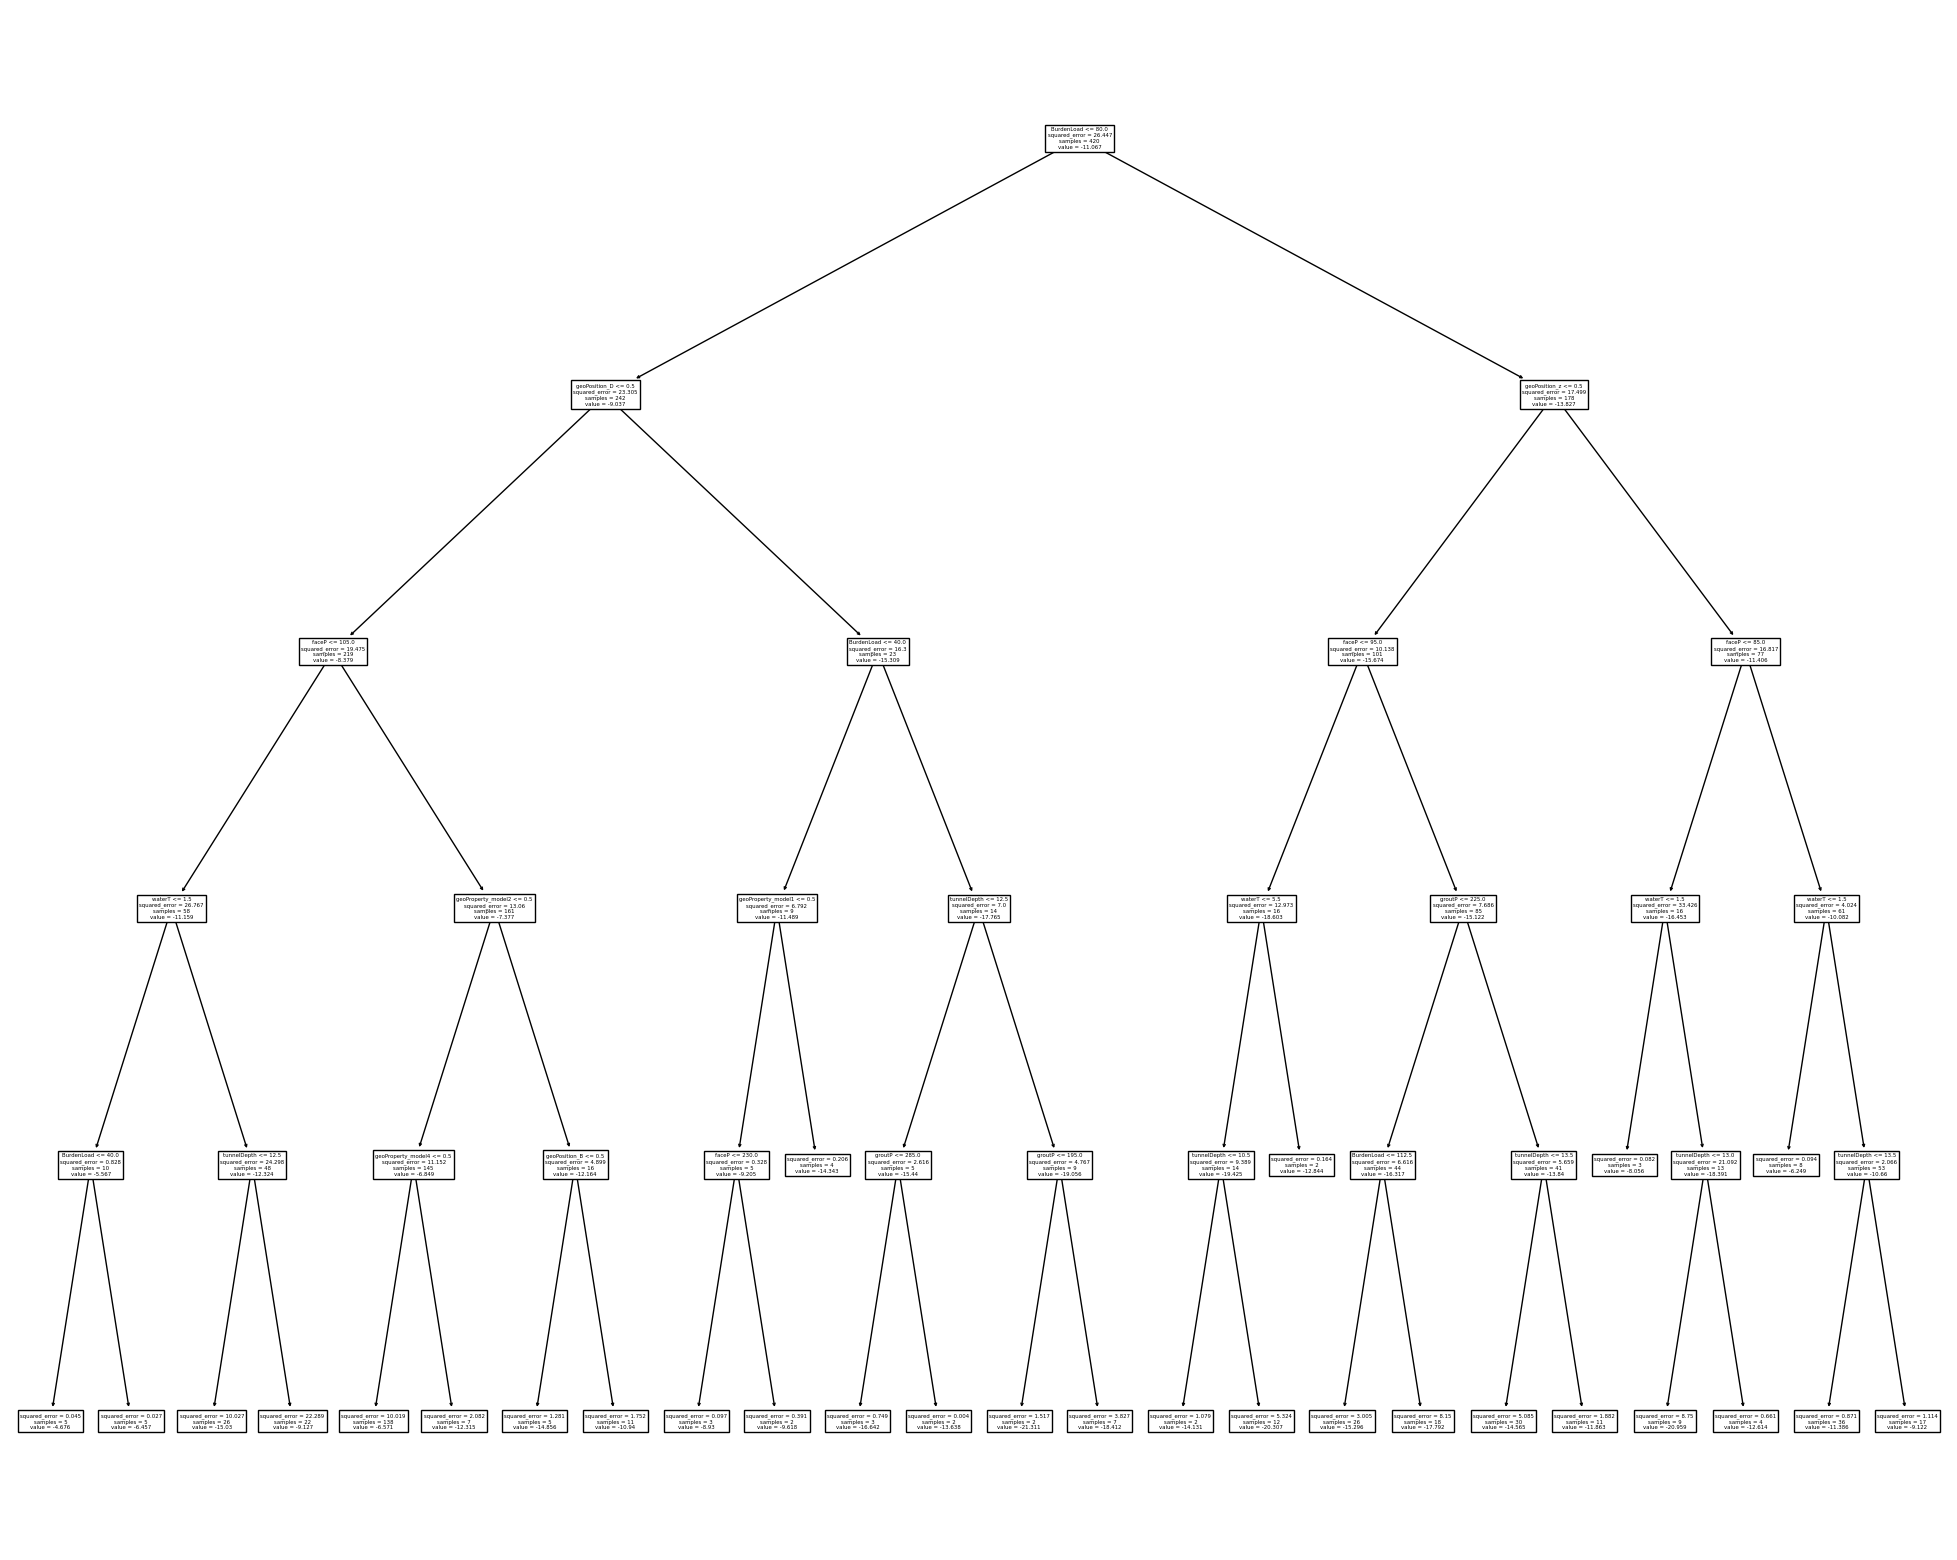

In [ ]:
#Change Complexity of Tree Model
reg_tree = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 2, ccp_alpha = 0.001)
tree_res = reg_tree.fit(X_train, y_train)
#Plot the Tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (25, 20))
plot_tree(tree_res, feature_names = X_train.columns)

[Text(0.4943181818181818, 0.9285714285714286, 'waterT <= 80.0\nsquared_error = 26.447\nsamples = 420\nvalue = -11.067'),
 Text(0.2755681818181818, 0.7857142857142857, 'geoPosition_C <= 0.5\nsquared_error = 23.305\nsamples = 242\nvalue = -9.037'),
 Text(0.21022727272727273, 0.6428571428571429, 'geoProperty_model1 <= 0.5\nsquared_error = 19.475\nsamples = 219\nvalue = -8.379'),
 Text(0.14772727272727273, 0.5, 'geoProperty_model4 <= 0.5\nsquared_error = 18.338\nsamples = 197\nvalue = -7.864'),
 Text(0.09090909090909091, 0.35714285714285715, 'tunnelDepth <= 0.5\nsquared_error = 16.171\nsamples = 179\nvalue = -7.426'),
 Text(0.045454545454545456, 0.21428571428571427, 'faceP <= 80.0\nsquared_error = 14.656\nsamples = 160\nvalue = -6.914'),
 Text(0.022727272727272728, 0.07142857142857142, 'squared_error = 20.681\nsamples = 30\nvalue = -10.382'),
 Text(0.06818181818181818, 0.07142857142857142, 'squared_error = 9.848\nsamples = 130\nvalue = -6.113'),
 Text(0.13636363636363635, 0.214285714285714

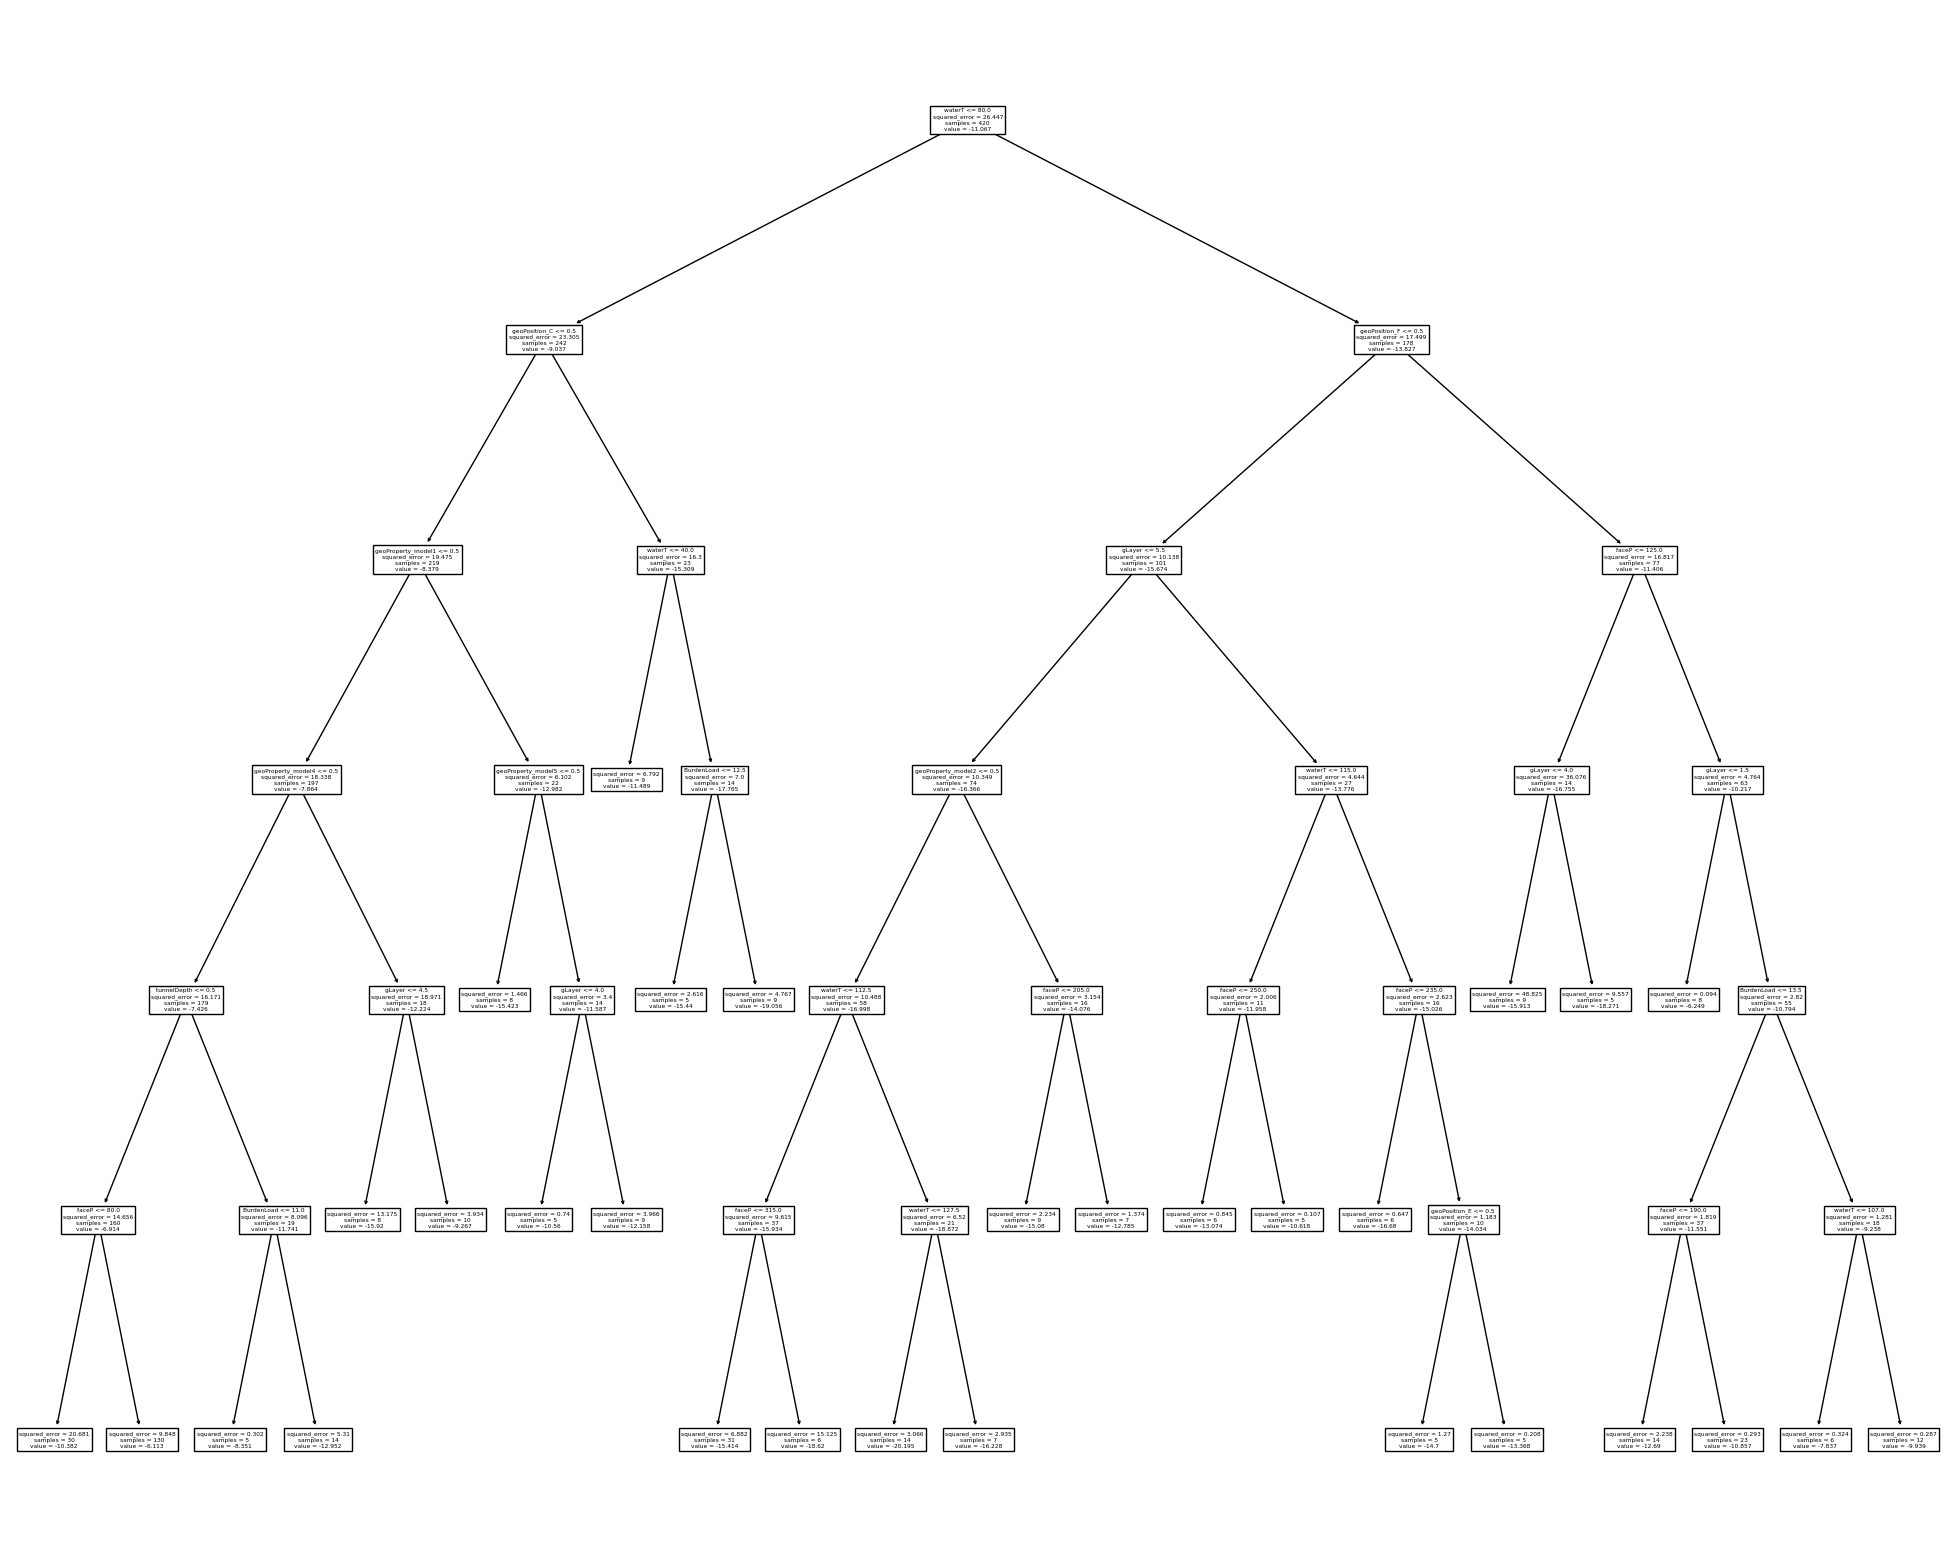

In [ ]:
# Decision Tree Model Using All Variables
reg_tree = DecisionTreeRegressor(max_depth = 6, min_samples_leaf = 5, ccp_alpha = 0.001)
tree_res = reg_tree.fit(X_train.iloc[:, 1:], y_train) #remove constant
#Plot the Tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (25, 20))
plot_tree(tree_res, feature_names = X_train.iloc[:, :].columns)

In [ ]:
#K-Fold Cross Validation for Choosing Hyper-parameters
#Create Hyper-parameters grid
import itertools

max_depth = [5, 7, 10]
min_samples_leaf = [5, 10, 15]
ccp_alpha = [0.0001, 0.001, 0.01]
grid = list(itertools.product(max_depth, min_samples_leaf, ccp_alpha))
grid = pd.DataFrame(data = grid, index = range(1, 28), columns = ['max_depth', 'min_samples_leaf', 'ccp_alpha'])
grid

max_depth  min_samples_leaf  ccp_alpha
1           5                 5     0.0001
2           5                 5     0.0010
3           5                 5     0.0100
4           5                10     0.0001
5           5                10     0.0010
6           5                10     0.0100
7           5                15     0.0001
8           5                15     0.0010
9           5                15     0.0100
10          7                 5     0.0001
11          7                 5     0.0010
12          7                 5     0.0100
13          7                10     0.0001
14          7                10     0.0010
15          7                10     0.0100
16          7                15     0.0001
17          7                15     0.0010
18          7                15     0.0100
19         10                 5     0.0001
20         10                 5     0.0010
21         10                 5     0.0100
22         10                10     0.0001
23         10                10     0.0010
24         10                10     0.0100
25         10                15     0.0001
26         10                15     0.0010
27         10                15     0.0100

In [ ]:
#K-fold Cross Validation to Choose the Best Model
from sklearn.model_selection import cross_val_score

cv_errors = np.zeros(shape = grid.shape[0]) #to save cv results

for i in range(grid.shape[0]):
    reg_tree = DecisionTreeRegressor(max_depth = grid.iloc[i, 0],
                                     min_samples_leaf = grid.iloc[i, 1],
                                     ccp_alpha = grid.iloc[i, 2])
    scores = cross_val_score(estimator = reg_tree,
                             X = X_train, y =y_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 5, n_jobs = -1)
    cv_errors [i] = scores.mean()
#To check scoring: https://scikit-learn.org/stable/modules/model_evaluation.html

NameError: ignored

In [ ]:
cv_errors

array([-3.43250733, -3.43250733, -3.43188403, -3.68350545, -3.68245716,
       -3.68245716, -3.83609376, -3.83609376, -3.83609376, -3.38811987,
       -3.38795475, -3.38637839, -3.63463346, -3.63352772, -3.63263619,
       -3.80532359, -3.80532359, -3.80532359, -3.16439149, -3.1643236 ,
       -3.16364288, -3.53870586, -3.53759074, -3.53992201, -3.80532359,
       -3.80532359, -3.80532359])

In [ ]:
#Best Model
grid.iloc[np.argmax(cv_errors), :]

max_depth           10.00
min_samples_leaf     5.00
ccp_alpha            0.01
Name: 21, dtype: float64

### Model 1: Prediction on Test Dataset

[Text(0.507, 0.9545454545454546, 'BurdenLoad <= 80.0\nsquared_error = 26.447\nsamples = 420\nvalue = -11.067'),
 Text(0.303, 0.8636363636363636, 'geoPosition_D <= 0.5\nsquared_error = 23.305\nsamples = 242\nvalue = -9.037'),
 Text(0.206, 0.7727272727272727, 'faceP <= 105.0\nsquared_error = 19.475\nsamples = 219\nvalue = -8.379'),
 Text(0.076, 0.6818181818181818, 'waterT <= 1.5\nsquared_error = 26.767\nsamples = 58\nvalue = -11.159'),
 Text(0.032, 0.5909090909090909, 'BurdenLoad <= 40.0\nsquared_error = 0.828\nsamples = 10\nvalue = -5.567'),
 Text(0.016, 0.5, 'squared_error = 0.045\nsamples = 5\nvalue = -4.676'),
 Text(0.048, 0.5, 'squared_error = 0.027\nsamples = 5\nvalue = -6.457'),
 Text(0.12, 0.5909090909090909, 'tunnelDepth <= 12.5\nsquared_error = 24.298\nsamples = 48\nvalue = -12.324'),
 Text(0.08, 0.5, 'BurdenLoad <= 58.5\nsquared_error = 10.027\nsamples = 26\nvalue = -15.03'),
 Text(0.064, 0.4090909090909091, 'geoPosition_z <= 0.5\nsquared_error = 4.229\nsamples = 18\nvalue = -

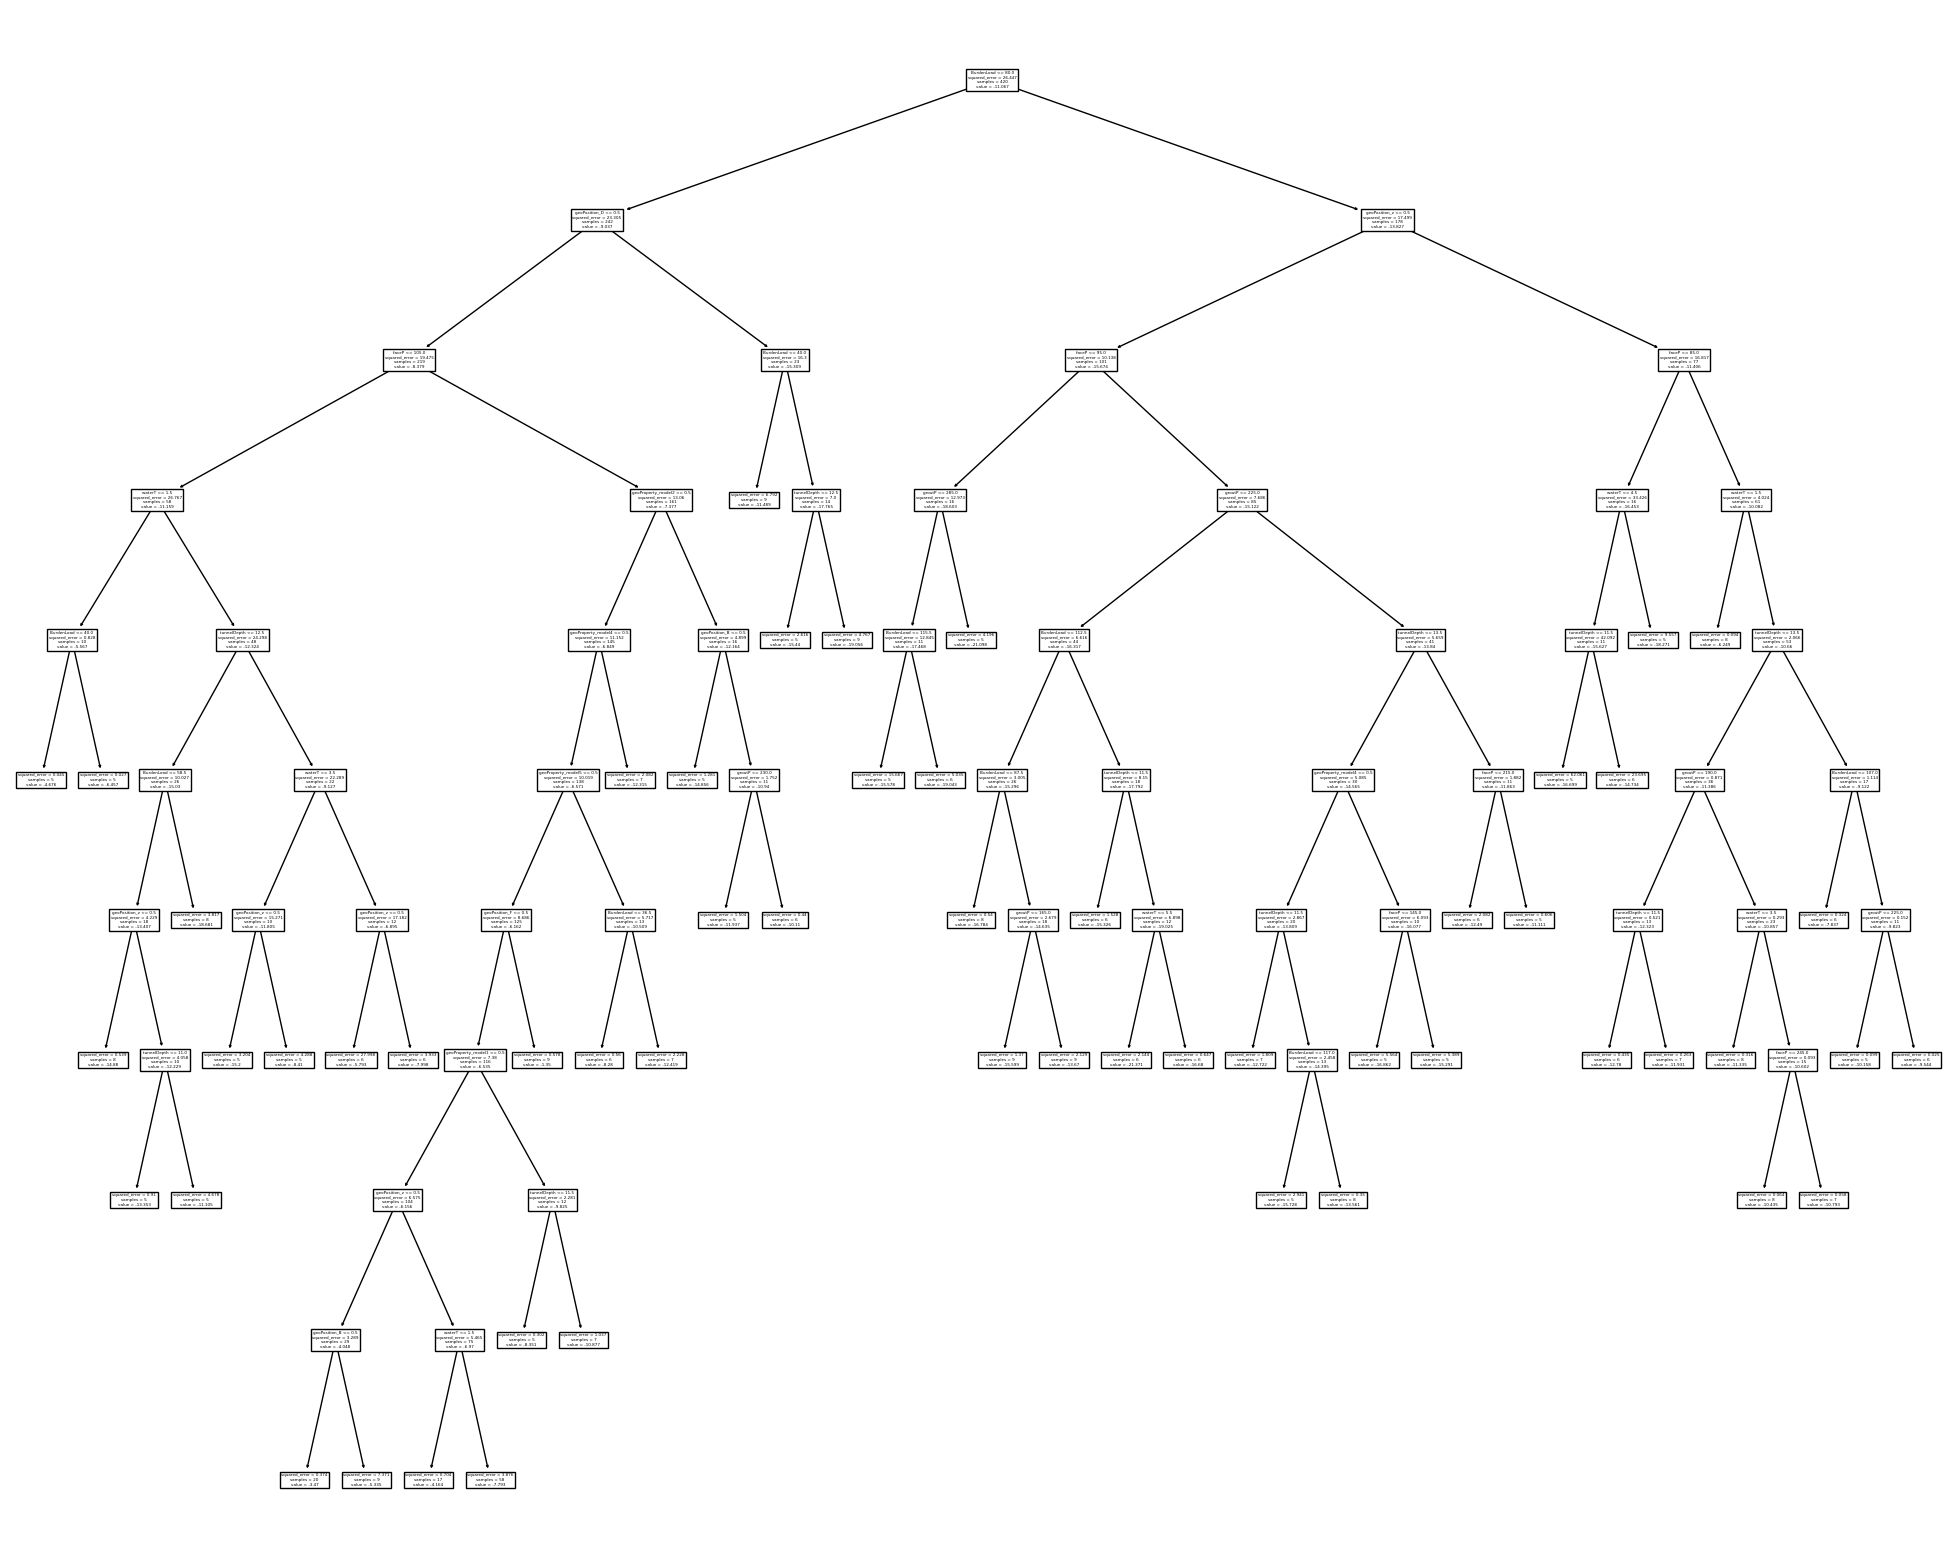

In [ ]:
#The Best Decision Tree Model Using All Variables
reg_tree = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 5, ccp_alpha = 0.0001)
tree_res = reg_tree.fit(X_train, y_train)

#Plot the Tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (25, 20))
plot_tree(tree_res, feature_names = X_train.columns)

In [ ]:
tree_res

DecisionTreeRegressor(ccp_alpha=0.01, max_depth=4, min_samples_leaf=5)

In [ ]:
def generate_predictions(model, X_train, X_test):
    """
    Generate predictions for the training and test datasets using the specified model.

    Parameters:
    model (object): The trained model object.
    X_train (DataFrame): The feature matrix of the training dataset.
    X_test (DataFrame): The feature matrix of the test dataset.

    Returns:
    tuple: A tuple containing the predictions for the training and test datasets.
    """
    # Generate predictions for training and test datasets
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    return pred_train, pred_test

In [ ]:
pred_tree_train = tree_res.predict(X_train)

In [ ]:
pred_tree = tree_res.predict(X_val)
pred_tree

array([-11.48881222, -13.84015854, -10.6600417 ,  -6.84856099,
       -10.6600417 , -21.0979    , -16.31718409, -16.31718409,
       -10.6600417 , -12.32432625, -15.62711273,  -6.84856099,
       -10.6600417 , -17.46829091, -16.31718409,  -6.84856099,
       -10.6600417 , -12.32432625, -12.16414437, -12.32432625,
       -21.0979    , -12.32432625, -17.46829091, -17.46829091,
       -13.84015854, -13.84015854, -17.46829091, -17.46829091,
       -16.31718409, -12.32432625, -13.84015854,  -6.84856099,
        -6.84856099,  -6.84856099, -10.6600417 ,  -6.84856099,
       -16.31718409,  -6.84856099, -10.6600417 , -10.6600417 ,
        -6.84856099,  -6.84856099, -12.32432625, -12.32432625,
        -6.84856099, -12.32432625,  -6.84856099,  -5.566612  ,
       -16.31718409, -10.6600417 , -13.84015854,  -6.84856099,
        -6.84856099,  -6.84856099,  -6.249215  ,  -6.249215  ,
       -10.6600417 , -18.2707    , -13.84015854, -12.32432625,
       -13.84015854,  -6.84856099,  -6.84856099, -13.84

In [ ]:
#Absolute error
abs_err_tree = abs(y_val - pred_tree)

In [ ]:
#Absolute error
abs_err_tree_train = abs(y_train - pred_tree_train)
abs_err_tree_train

69     1.006460
477    2.996800
307    0.328900
173    1.686100
237    0.599427
         ...   
71     1.691600
106    2.094720
270    0.117935
435    0.067037
102    2.034016
Name: zDisp_M, Length: 420, dtype: float64

In [ ]:
mean_squared_error

<function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)>

In [ ]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = pd.DataFrame({'Mean of Squared Error':  mean_squared_error(y_val , pred_tree),
                                  'RMSE': math.sqrt(mean_squared_error(y_val , pred_tree)),
                                  'R2':r2_score(y_val , pred_tree),
                                             'Mean of AbsErrors':    abs_err_tree.mean(),
                                             'Median of AbsErrors' : abs_err_tree.median(),
                                             'SD of AbsErrors' :     abs_err_tree.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_tree),
                                             'Min of AbsErrors':     abs_err_tree.min(),
                                             'Max of AbsErrors':     abs_err_tree.max()}, index = ['Decision Tree Reg'])
model_comp

Mean of Squared Error      RMSE        R2  \
Decision Tree Reg               9.677163  3.110814  0.625756   

                   Mean of AbsErrors  Median of AbsErrors  SD of AbsErrors  \
Decision Tree Reg           2.023516             1.270982         2.373966   

                   IQR of AbsErrors  Min of AbsErrors  Max of AbsErrors  
Decision Tree Reg          1.992034           0.00924         14.397921

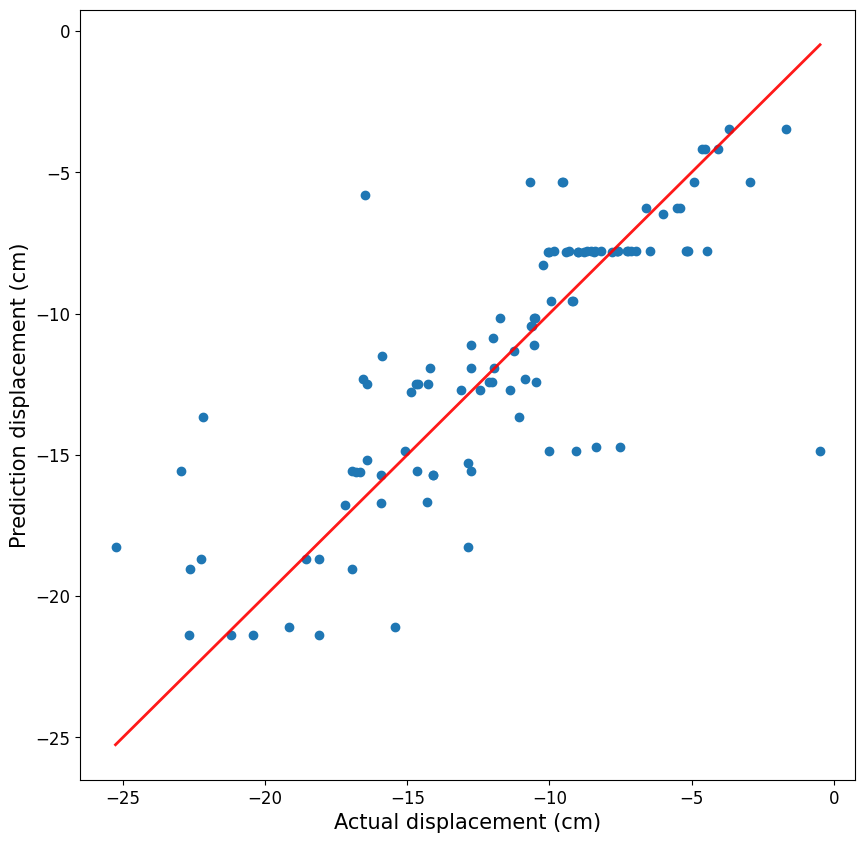

In [ ]:
plt.figure(figsize=(10, 10))

plt.scatter(x=y_val, y=pred_tree)
plt.xlabel('Actual displacement (cm)', fontsize=15)
plt.ylabel('Prediction displacement (cm)', fontsize=15)

# Increase font size of x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add 45 degree line
xp = np.linspace(y_val.min(), y_val.max(), 100)
plt.plot(xp, xp, alpha=0.9, linewidth=2, color='red')

plt.savefig("Decision Tree.png", dpi=300)
plt.show()

In [ ]:
# Save the model to disk
filename = 'tree.pkl'
with open(filename, 'wb') as file:
    pickle.dump(tree_res, file)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib

# Define a dictionary with column names as keys and empty lists as values
columns = {
    'Model': [],
    'Mean Absolute Error (Train)': [],
    'Mean Squared Error (Train)': [],
    'Root Mean Squared Error (Train)': [],
    'R-squared (Train)': [],
    'Mean Absolute Error (Test)': [],
    'Mean Squared Error (Test)': [],
    'Root Mean Squared Error (Test)': [],
    'R-squared (Test)': []
}

# Create an empty DataFrame using the dictionary
model_comp = pd.DataFrame(columns)
model_comp

Empty DataFrame
Columns: [Model, Mean Absolute Error (Train), Mean Squared Error (Train), Root Mean Squared Error (Train), R-squared (Train), Mean Absolute Error (Test), Mean Squared Error (Test), Root Mean Squared Error (Test), R-squared (Test)]
Index: []

### For paper_DT

In [ ]:
pred_train, pred_test = generate_predictions(tree_res, X_train, X_val)


# Calculate metrics for training dataset
mae_train = mean_absolute_error(y_train, pred_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, pred_train)

# Calculate metrics for validation dataset
mae_val = mean_absolute_error(y_val, pred_test)
mse_val = mean_squared_error(y_val, pred_test)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, pred_test)

In [ ]:
# Create a DataFrame to store the metrics for the decision tree model
tree_metrics = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Mean Absolute Error (Train)': [mae_train],
    'Mean Squared Error (Train)': [mse_train],
    'Root Mean Squared Error (Train)': [rmse_train],
    'R-squared (Train)': [r2_train],
    'Mean Absolute Error (Test)': [mae_val],
    'Mean Squared Error (Test)': [mse_val],
    'Root Mean Squared Error (Test)': [rmse_val],
    'R-squared (Test)': [r2_val]
})

In [ ]:
tree_metrics

Model  Mean Absolute Error (Train)  Mean Squared Error (Train)  \
0  Decision Tree                      2.44841                   10.222634   

   Root Mean Squared Error (Train)  R-squared (Train)  \
0                         3.197285           0.613469   

   Mean Absolute Error (Test)  Mean Squared Error (Test)  \
0                    2.649802                  12.503463   

   Root Mean Squared Error (Test)  R-squared (Test)  
0                        3.536024          0.516455

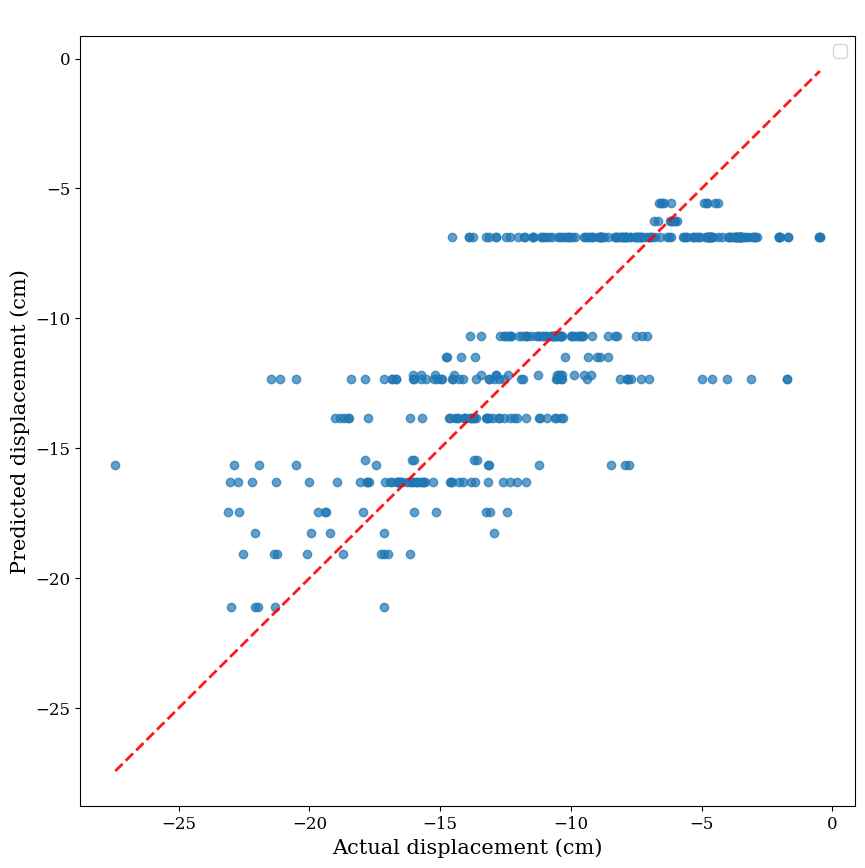

In [ ]:
# Set font to serif
matplotlib.rcParams['font.family'] = 'serif'

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatter plot for train dataset
plt.scatter(x=y_train, y=pred_train, alpha=0.7)

# Set labels and title
plt.xlabel('Actual displacement (cm)', fontsize=15)
plt.ylabel('Predicted displacement (cm)', fontsize=15)
plt.title(' ', fontsize=18)

# Increase font size of x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a 45-degree line
xp = np.linspace(min(y_train.min(), pred_train.min()), max(y_train.max(), pred_train.max()), 100)
plt.plot(xp, xp, alpha=0.9, linewidth=2, color='red', linestyle='--')

# Add legend
plt.legend(fontsize=12)

# Save the plot as an image
plt.savefig("Train_Scatter_DT.png", dpi=300)

# Show the plot
plt.show()

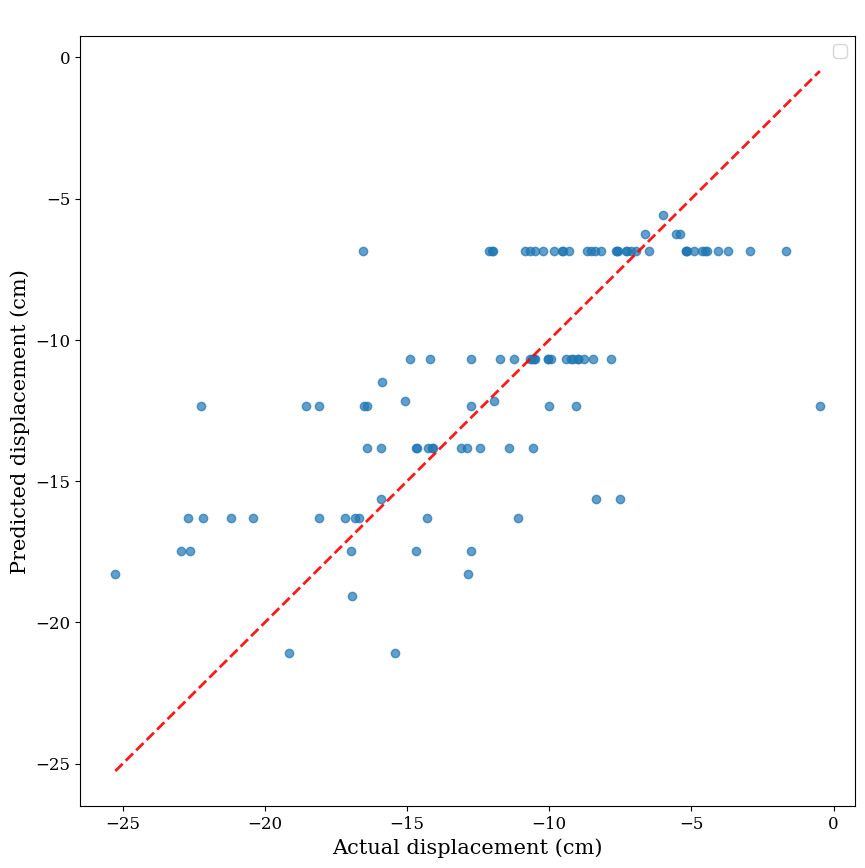

In [ ]:
# Set font to serif
matplotlib.rcParams['font.family'] = 'serif'

plt.figure(figsize=(10, 10))

# Scatter plot for test dataset
plt.scatter(x=y_val, y=pred_test, alpha=0.7)

# Set labels and title
plt.xlabel('Actual displacement (cm)', fontsize=15)
plt.ylabel('Predicted displacement (cm)', fontsize=15)
plt.title(' ', fontsize=18)

# Increase font size of x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a 45-degree line
xp = np.linspace(min(y_val.min(), pred_test.min()), max(y_val.max(), pred_test.max()), 100)
plt.plot(xp, xp, alpha=0.9, linewidth=2, color='red', linestyle='--')

# Add legend
plt.legend(fontsize=12)

# Save the plot as an image
plt.savefig("Test_Scatter_DT.png", dpi=300)

# Show the plot
plt.show()

## Model 2: Bagging

### Model 2: Prediction on Test Dataset

In [ ]:
X_train.shape[1]

17

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Sample Bagging Model (Not Tuned)
baggingreg = RandomForestRegressor(max_features = X_train.shape[1], random_state = 123, n_estimators = 500)
bagging_reg = baggingreg.fit(X_train,y_train)
pred_bagging = bagging_reg.predict(X_val)
pred_bagging

array([-13.71597222, -13.95953   ,  -9.87785026, -10.15209954,
        -8.33306428, -18.0989818 , -15.5252578 , -17.8990568 ,
       -12.6026832 , -17.56465154, -16.2088438 ,  -9.4420387 ,
        -9.06750084, -19.9846446 , -16.4752978 ,  -7.48160324,
        -7.85736724, -13.5121042 , -14.42529858, -19.37454694,
       -17.73797864, -12.05007794, -15.0997198 , -17.2574482 ,
       -11.07886   , -13.939243  , -18.99681   , -18.8269964 ,
       -16.1413422 , -13.30955488, -13.4648858 ,  -7.69562784,
        -4.8402049 , -12.85749237, -10.02542116,  -9.53692118,
       -13.6127378 ,  -7.83445152,  -9.42229684,  -8.50408888,
        -7.37549128,  -5.27927152,  -9.1428967 , -18.0658186 ,
       -10.94123732, -15.26981114,  -8.5011024 ,  -6.33916932,
       -19.1780014 ,  -8.6081959 , -13.5489154 ,  -6.32283736,
        -9.51006045, -11.82789936,  -6.46245704,  -6.10640216,
       -10.46890854, -13.59710924, -14.800823  , -12.85984732,
       -15.661957  , -12.39577548, -11.17925788, -12.43

In [ ]:
# Save the model to disk
filename = 'bagging.pkl'
with open(filename, 'wb') as file:
    pickle.dump(bagging_reg, file)

In [ ]:
#Absolute error
abs_err_bagging = abs(y_val- pred_bagging)

In [ ]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of Squared Error':  mean_squared_error(y_val , pred_bagging),
                                  'RMSE': math.sqrt(mean_squared_error(y_val , pred_bagging)),
                                  'R2':r2_score(y_val , pred_bagging),
                                            'Mean of AbsErrors':    abs_err_bagging.mean(),
                                             'Median of AbsErrors' : abs_err_bagging.median(),
                                             'SD of AbsErrors' :     abs_err_bagging.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_bagging),
                                             'Min of AbsErrors':     abs_err_bagging.min(),
                                             'Max of AbsErrors':     abs_err_bagging.max()}, index = ['Bagging Reg']),
                               ignore_index = False)

model_comp

<ipython-input-21-53b1221670b2>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'Mean of Squared Error':  mean_squared_error(y_val , pred_bagging),


Mean of Squared Error      RMSE        R2  \
Decision Tree Reg               9.677163  3.110814  0.625756   
Bagging Reg                     2.783419  1.668358  0.892357   

                   Mean of AbsErrors  Median of AbsErrors  SD of AbsErrors  \
Decision Tree Reg           2.023516             1.270982         2.373966   
Bagging Reg                 0.986864             0.520721         1.351574   

                   IQR of AbsErrors  Min of AbsErrors  Max of AbsErrors  
Decision Tree Reg          1.992034           0.00924         14.397921  
Bagging Reg                0.813001           0.00746          8.660818

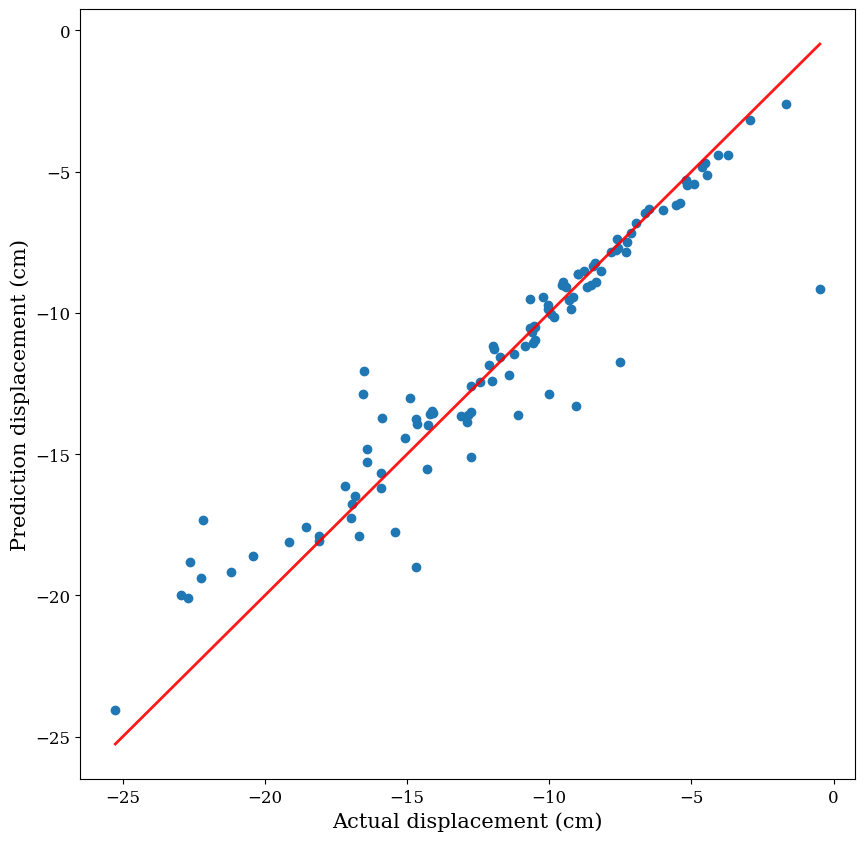

In [ ]:
#Actual vs. Prediction
plt.figure(figsize=(10, 10))
plt.scatter(x=y_val, y=pred_bagging)
plt.xlabel('Actual displacement (cm)', fontsize=15)
plt.ylabel('Prediction displacement (cm)', fontsize=15)
# plt.title('Actual vs. Prediction for Bagging', fontsize=18)

# Increase font size of x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add 45 degree line
xp = np.linspace(y_val.min(), y_val.max(), 100)
plt.plot(xp, xp, alpha=0.9, linewidth=2, color='red')

plt.savefig("bagging.png", dpi=300)
plt.show()

### Model 2: Prediction on CV

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_samples': [0.5, 0.7, 0.8, 1.0],
    'max_features': [0.5, 0.7, 0.8, 1.0],
    'bootstrap': [True, False]
}


In [ ]:
# Initialize the base regressor for BaggingRegressor
base_reg = RandomForestRegressor(random_state=123)

# Initialize the BaggingRegressor
bag_reg = BaggingRegressor(base_estimator=base_reg, random_state=123)

# Initialize RandomizedSearchCV with progress bar
random_search_bag = RandomizedSearchCV(estimator=bag_reg,
                                      param_distributions=param_grid,
                                      n_iter=100,
                                      cv=5,
                                      random_state=123,
                                      n_jobs=-1)

# Perform the random search with progress bar
for _ in tqdm(range(random_search_bag.n_iter)):
    random_search_bag.fit(X_train, y_train)

# Get the best parameters
best_params_bag = random_search_bag.best_params_
print("Best parameters:", best_params_bag)

  0%|          | 0/100 [05:41<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of Squared Error':  mean_squared_error(y_val , pred_bagging),
                                  'RMSE': math.sqrt(mean_squared_error(y_val , pred_bagging)),
                                  'R2':r2_score(y_val , pred_bagging),
                                            'Mean of AbsErrors':    abs_err_bagging.mean(),
                                             'Median of AbsErrors' : abs_err_bagging.median(),
                                             'SD of AbsErrors' :     abs_err_bagging.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_bagging),
                                             'Min of AbsErrors':     abs_err_bagging.min(),
                                             'Max of AbsErrors':     abs_err_bagging.max()}, index = ['Bagging Reg']),
                               ignore_index = False)

model_comp

<ipython-input-21-53b1221670b2>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'Mean of Squared Error':  mean_squared_error(y_val , pred_bagging),


Mean of Squared Error      RMSE        R2  \
Decision Tree Reg               9.677163  3.110814  0.625756   
Bagging Reg                     2.783419  1.668358  0.892357   

                   Mean of AbsErrors  Median of AbsErrors  SD of AbsErrors  \
Decision Tree Reg           2.023516             1.270982         2.373966   
Bagging Reg                 0.986864             0.520721         1.351574   

                   IQR of AbsErrors  Min of AbsErrors  Max of AbsErrors  
Decision Tree Reg          1.992034           0.00924         14.397921  
Bagging Reg                0.813001           0.00746          8.660818

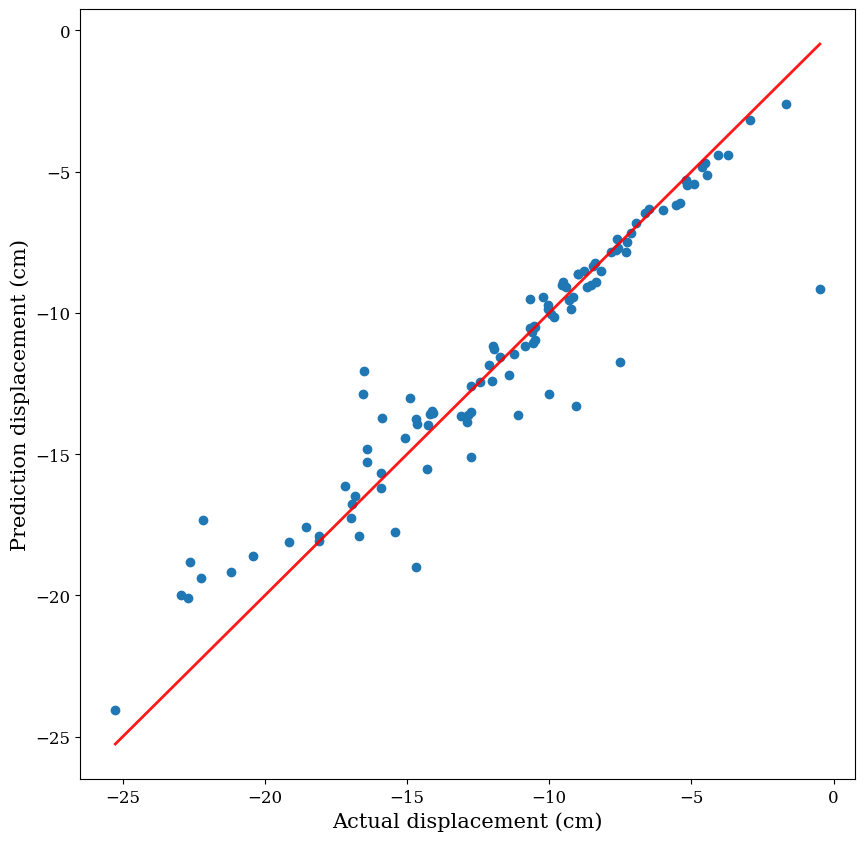

In [ ]:
#Actual vs. Prediction
plt.figure(figsize=(10, 10))
plt.scatter(x=y_val, y=pred_bagging)
plt.xlabel('Actual displacement (cm)', fontsize=15)
plt.ylabel('Prediction displacement (cm)', fontsize=15)
# plt.title('Actual vs. Prediction for Bagging', fontsize=18)

# Increase font size of x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add 45 degree line
xp = np.linspace(y_val.min(), y_val.max(), 100)
plt.plot(xp, xp, alpha=0.9, linewidth=2, color='red')

plt.savefig("bagging.png", dpi=300)
plt.show()

### For paper_Bagging

In [ ]:
pred_train, pred_test = generate_predictions(baggingreg, X_train, X_val)


# Calculate metrics for training dataset
mae_train = mean_absolute_error(y_train, pred_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, pred_train)

# Calculate metrics for validation dataset
mae_val = mean_absolute_error(y_val, pred_test)
mse_val = mean_squared_error(y_val, pred_test)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, pred_test)

In [ ]:
# Create a DataFrame to store the metrics for the decision tree model
bagging_metrics = pd.DataFrame({
    'Model': ['Bagging'],
    'Mean Absolute Error (Train)': [mae_train],
    'Mean Squared Error (Train)': [mse_train],
    'Root Mean Squared Error (Train)': [rmse_train],
    'R-squared (Train)': [r2_train],
    'Mean Absolute Error (Test)': [mae_val],
    'Mean Squared Error (Test)': [mse_val],
    'Root Mean Squared Error (Test)': [rmse_val],
    'R-squared (Test)': [r2_val]
})

In [ ]:
bagging_metrics

Model  Mean Absolute Error (Train)  Mean Squared Error (Train)  \
0  Bagging                     0.390881                    0.388675   

   Root Mean Squared Error (Train)  R-squared (Train)  \
0                         0.623438           0.985304   

   Mean Absolute Error (Test)  Mean Squared Error (Test)  \
0                    0.986864                   2.783419   

   Root Mean Squared Error (Test)  R-squared (Test)  
0                        1.668358          0.892357

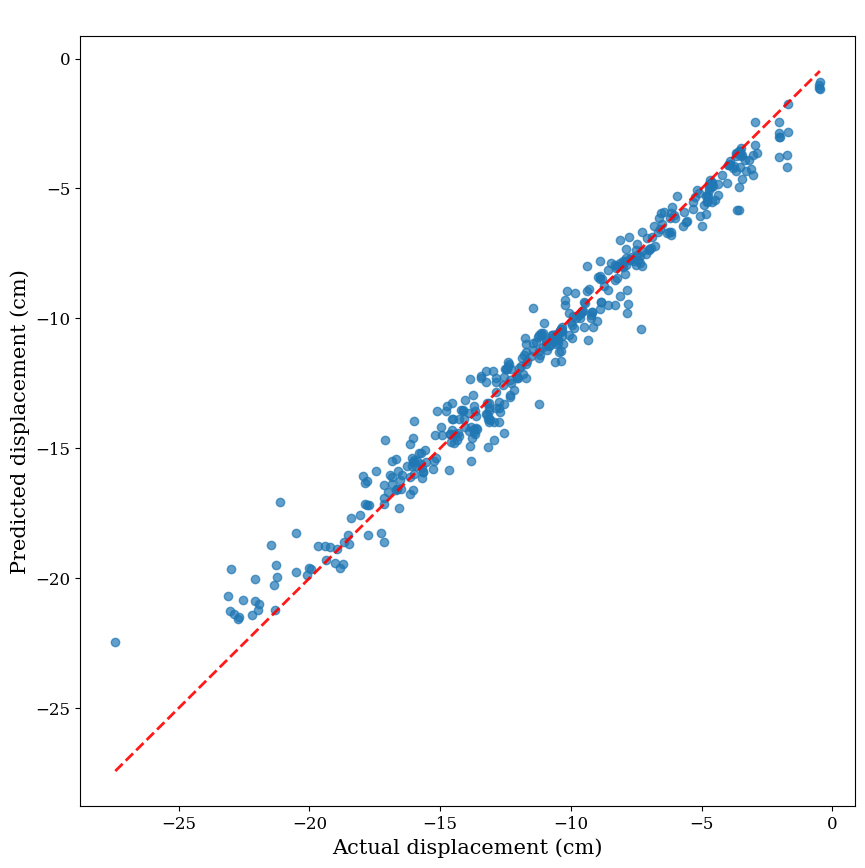

In [ ]:
# Set font to serif
matplotlib.rcParams['font.family'] = 'serif'

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatter plot for train dataset
plt.scatter(x=y_train, y=pred_train, alpha=0.7)

# Set labels and title
plt.xlabel('Actual displacement (cm)', fontsize=15)
plt.ylabel('Predicted displacement (cm)', fontsize=15)
plt.title(' ', fontsize=18)

# Increase font size of x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a 45-degree line
xp = np.linspace(min(y_train.min(), pred_train.min()), max(y_train.max(), pred_train.max()), 100)
plt.plot(xp, xp, alpha=0.9, linewidth=2, color='red', linestyle='--')



# Save the plot as an image
plt.savefig("Train_Scatter_Bagging.png", dpi=300)

# Show the plot
plt.show()

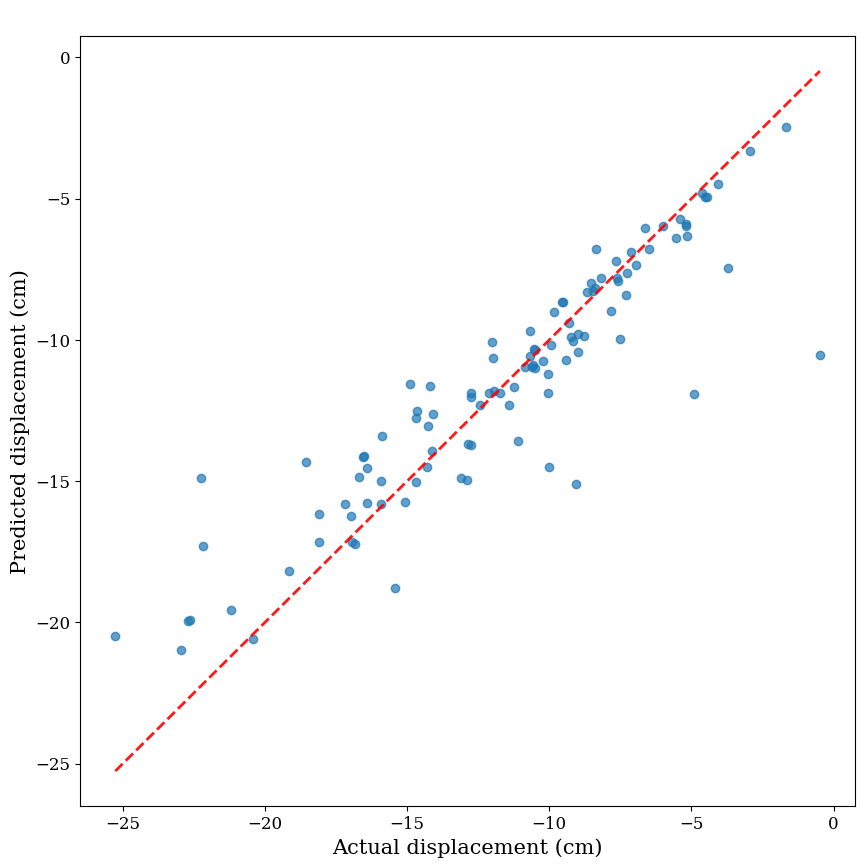

In [ ]:
# Set font to serif
matplotlib.rcParams['font.family'] = 'serif'

plt.figure(figsize=(10, 10))

# Scatter plot for test dataset
plt.scatter(x=y_val, y=pred_test, alpha=0.7)

# Set labels and title
plt.xlabel('Actual displacement (cm)', fontsize=15)
plt.ylabel('Predicted displacement (cm)', fontsize=15)
plt.title(' ', fontsize=18)

# Increase font size of x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a 45-degree line
xp = np.linspace(min(y_val.min(), pred_test.min()), max(y_val.max(), pred_test.max()), 100)
plt.plot(xp, xp, alpha=0.9, linewidth=2, color='red', linestyle='--')


# Save the plot as an image
plt.savefig("Test_Scatter_Bagging.png", dpi=300)

# Show the plot
plt.show()

## Model 3: Random Forest

In [ ]:
from scipy.stats import randint
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
model2=RandomForestRegressor(random_state = 32)
model2.fit(X_train , y_train)
ypreddt_train = model2.predict(X_train)
ypreddt_test = model2.predict(X_val)

MAE: 311    2.072439
397    0.258140
6      0.611731
184    0.301685
78     0.117432
         ...   
503    0.671846
429    0.481677
432    0.502642
153    0.191465
220    0.333032
Name: zDisp_M, Length: 106, dtype: float64
MSE: 2.7171057109214165
R2: 0.8949217274771573


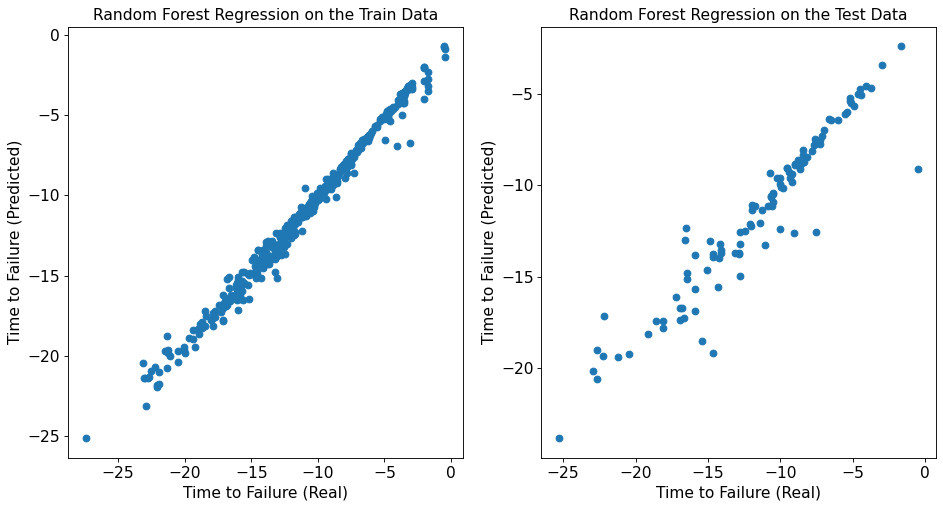

In [ ]:
plt.figure(figsize=(14, 7),dpi=80)
plt.subplot(121)
plt.scatter(y_train,ypreddt_train)
plt.annotate("R2 = {:.3f}".format(r2_score(y_train, ypreddt_train)), (1, 5.5))
fontsize=14
plt.title("Random Forest Regression on the Train Data",fontsize=fontsize)
plt.ylabel('Time to Failure (Predicted)',fontsize=fontsize)
plt.xlabel('Time to Failure (Real)',fontsize=fontsize)
plt.xticks(fontsize= fontsize)
plt.yticks(fontsize= fontsize)
plt.plot()

plt.subplot(122)
plt.scatter(y_val,ypreddt_test)
plt.annotate("R2 = {:.3f}".format(r2_score(y_val, ypreddt_test)), (1, 5.5))
fontsize=14
plt.title("Random Forest Regression on the Test Data",fontsize=fontsize)
plt.ylabel('Time to Failure (Predicted)',fontsize=fontsize)
plt.xlabel('Time to Failure (Real)',fontsize=fontsize)
plt.xticks(fontsize= fontsize)
plt.yticks(fontsize= fontsize)
plt.plot()
mae=abs(y_val-ypreddt_test)
mse=mean_squared_error(y_val,ypreddt_test)
r2=r2_score(y_val,ypreddt_test)
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
np.random.seed(123)
parameters = {'max_depth' : randint(low=1, high=30)
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : randint(low=1, high=10)
              ,'min_samples_leaf' : randint(low=1, high=10)
              , 'bootstrap': [True, False]
              , 'n_estimators': randint(low=1, high=30)


}
DT_grid  = RandomizedSearchCV(model2, param_distributions = parameters, n_iter=50, cv = 5, verbose = True)
# DT_grid  = GridSearchCV(model2, parameters, cv = 5, verbose = False)
DT_grid.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=32),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fc75b995450>,
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fc75b7b1930>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fc75b9c9f60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fc75b7b21d0>},
                   verbose=True)

In [ ]:
DT_grid.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=16, max_features='sqrt',
                      min_samples_split=6, n_estimators=9, random_state=32)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#Sample Random Forest Model (Not Tuned)
rfreg = RandomForestRegressor(bootstrap=False, max_depth=16, max_features='sqrt',
                      min_samples_split=6, n_estimators=9, random_state=32)
rf_reg = rfreg.fit(X_train, y_train)

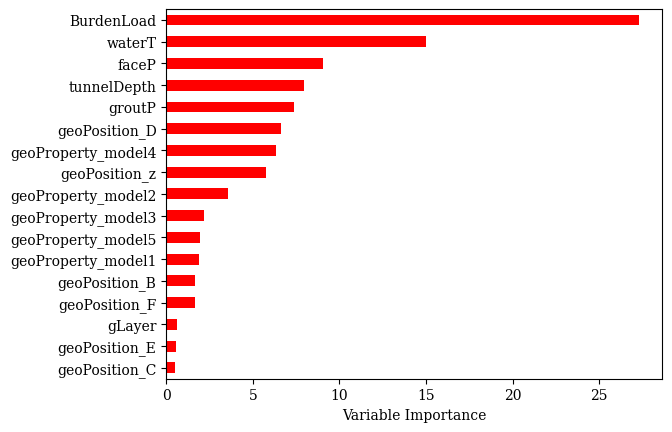

In [ ]:
Importance = pd.DataFrame({'Importance':rf_reg.feature_importances_ * 100},
                          index = X_train.columns)
Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
Importance.sort_values(by = 'Importance', axis = 0, ascending = False)

Importance
BurdenLoad           27.282572
waterT               15.022957
faceP                 9.030471
tunnelDepth           7.957436
groutP                7.358314
geoPosition_D         6.625304
geoProperty_model4    6.329648
geoPosition_z         5.754244
geoProperty_model2    3.585287
geoProperty_model3    2.179334
geoProperty_model5    1.930472
geoProperty_model1    1.904436
geoPosition_B         1.687178
geoPosition_F         1.657883
gLayer                0.613453
geoPosition_E         0.566252
geoPosition_C         0.514761

#### Model 3: Prediction on Test Dataset

In [ ]:
# Save the model to disk
filename = 'randomF.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf_reg, file)

In [ ]:
pred_rf = rf_reg.predict(X_val)
pred_rf

array([-13.39275711, -13.04979991,  -9.90172831,  -9.01228079,
        -8.25868604, -18.17249074, -14.49247681, -17.15512778,
       -12.02940376, -14.32907102, -14.990245  , -10.75148163,
       -10.70064631, -20.98259019, -17.21199093,  -7.6445358 ,
        -8.98262089, -13.71739081, -15.7412463 , -14.88380343,
       -18.77817407, -14.11716878, -11.89022419, -16.22907519,
       -10.898079  , -12.52534936, -15.03458389, -19.92749778,
       -15.79406296, -15.09096561, -13.93434231,  -7.89850526,
        -4.79906369, -14.13816893, -10.19046361,  -9.38680757,
       -13.58080804,  -8.415178  , -10.04899081,  -9.86946498,
        -7.80047604,  -5.95344237, -10.53452769, -16.17650037,
       -10.35463985, -15.76178056,  -7.79902128,  -5.96912519,
       -19.56334333,  -9.77726252, -12.60620793,  -6.79283172,
        -9.68431435, -11.88106811,  -6.03939894,  -5.7181375 ,
       -10.33543376, -13.67505663, -14.51786722, -14.5149597 ,
       -15.80069667, -10.06964337, -10.64372746, -12.31

In [ ]:
#Absolute error
abs_err_rf = abs(y_val - pred_rf)

In [ ]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of Squared Error':  mean_squared_error(y_val , pred_rf),
                                             'RMSE': math.sqrt(mean_squared_error(y_val , pred_rf)),
                                             'R2':r2_score(y_val , pred_rf),
                                             'Mean of AbsErrors':    abs_err_rf.mean(),
                                             'Median of AbsErrors' : abs_err_rf.median(),
                                             'SD of AbsErrors' :     abs_err_rf.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_rf),
                                             'Min of AbsErrors':     abs_err_rf.min(),
                                             'Max of AbsErrors':     abs_err_rf.max()}, index = ['Random Forest Reg']),
                               ignore_index = False)

model_comp

<ipython-input-28-8b8edd3a4fc8>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'Mean of Squared Error':  mean_squared_error(y_val , pred_rf),


Mean of Squared Error      RMSE        R2  \
Decision Tree Reg               9.677163  3.110814  0.625756   
Bagging Reg                     2.783419  1.668358  0.892357   
Random Forest Reg               4.649748  2.156327  0.820181   

                   Mean of AbsErrors  Median of AbsErrors  SD of AbsErrors  \
Decision Tree Reg           2.023516             1.270982         2.373966   
Bagging Reg                 0.986864             0.520721         1.351574   
Random Forest Reg           1.378930             0.839504         1.665675   

                   IQR of AbsErrors  Min of AbsErrors  Max of AbsErrors  
Decision Tree Reg          1.992034          0.009240         14.397921  
Bagging Reg                0.813001          0.007460          8.660818  
Random Forest Reg          1.475817          0.023905         10.052449

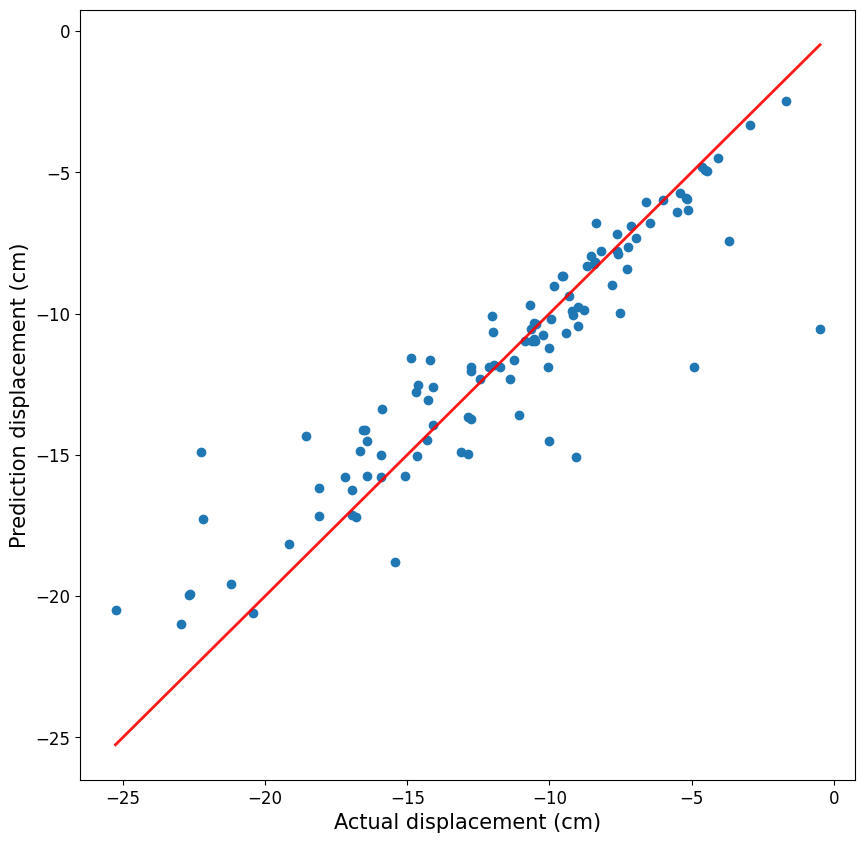

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(x=y_val, y=pred_rf)
plt.xlabel('Actual displacement (cm)', fontsize=15)
plt.ylabel('Prediction displacement (cm)', fontsize=15)
# plt.title('Actual vs. Prediction for Random Forest')

# Increase font size of x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add 45 degree line
xp = np.linspace(y_val.min(), y_val.max(), 100)
plt.plot(xp, xp, alpha=0.9, linewidth=2, color='red')

plt.savefig("Rf.png", dpi=300)
plt.show()

#### Model 3: Prediction on CV

In [ ]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [5, 10, 20],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rfreg, param_distributions=param_grid_rf, n_iter=100, cv=5, random_state=1234, n_jobs=-1)

# Perform the random search with progress bar
for _ in tqdm(range(random_search_rf.n_iter)):
    random_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = random_search_rf.best_params_

100%|██████████| 100/100 [11:37<00:00,  6.98s/it]


In [ ]:
print("Best parameters:", best_params_rf)

Best parameters: {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}


In [ ]:
best_modelRF = random_search_rf.best_estimator_

In [ ]:
pred_train, pred_test = generate_predictions(best_modelRF, X_train, X_val)


# Calculate metrics for training dataset
mae_train = mean_absolute_error(y_train, pred_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, pred_train)

# Calculate metrics for validation dataset
mae_val = mean_absolute_error(y_val, pred_test)
mse_val = mean_squared_error(y_val, pred_test)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, pred_test)

In [ ]:
# Create a DataFrame to store the metrics for the decision tree model
RF_metricsTuned = pd.DataFrame({
    'Model': ['RF'],
    'Mean Absolute Error (Train)': [mae_train],
    'Mean Squared Error (Train)': [mse_train],
    'Root Mean Squared Error (Train)': [rmse_train],
    'R-squared (Train)': [r2_train],
    'Mean Absolute Error (Test)': [mae_val],
    'Mean Squared Error (Test)': [mse_val],
    'Root Mean Squared Error (Test)': [rmse_val],
    'R-squared (Test)': [r2_val]
})

In [ ]:
RF_metricsTuned

Model  Mean Absolute Error (Train)  Mean Squared Error (Train)  \
0    RF                 2.119601e-15                9.134183e-30   

   Root Mean Squared Error (Train)  R-squared (Train)  \
0                     3.022281e-15                1.0   

   Mean Absolute Error (Test)  Mean Squared Error (Test)  \
0                    1.099328                   2.923409   

   Root Mean Squared Error (Test)  R-squared (Test)  
0                        1.709798          0.886943

In [ ]:
saveModel = '/content/drive/MyDrive/Colab Notebooks/FlacAIModels/simpleStaticModel/modelDeveloped/'

In [ ]:
# Save the tuned model
modelName = 'tuned_random_forest_model.pkl'
with open(saveModel+ modelName, 'wb') as f:
    pickle.dump(random_search_rf.best_estimator_, f)

In [ ]:
modelName = 'random_search_rf.pkl'
with open(saveModel+ modelName, 'wb') as f:
    pickle.dump(random_search_rf, f)

print("RandomizedSearchCV object saved to:", saveModel+ modelName)

RandomizedSearchCV object saved to: /content/drive/MyDrive/Colab Notebooks/FlacAIModels/simpleStaticModel/modelDeveloped/random_search_rf.pkl


### For paper_RF

In [ ]:
pred_train, pred_test = generate_predictions(rf_reg, X_train, X_val)


# Calculate metrics for training dataset
mae_train = mean_absolute_error(y_train, pred_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, pred_train)

# Calculate metrics for validation dataset
mae_val = mean_absolute_error(y_val, pred_test)
mse_val = mean_squared_error(y_val, pred_test)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, pred_test)

In [ ]:
# Create a DataFrame to store the metrics for the decision tree model
rf_metrics = pd.DataFrame({
    'Model': ['RF'],
    'Mean Absolute Error (Train)': [mae_train],
    'Mean Squared Error (Train)': [mse_train],
    'Root Mean Squared Error (Train)': [rmse_train],
    'R-squared (Train)': [r2_train],
    'Mean Absolute Error (Test)': [mae_val],
    'Mean Squared Error (Test)': [mse_val],
    'Root Mean Squared Error (Test)': [rmse_val],
    'R-squared (Test)': [r2_val]
})

In [ ]:
rf_metrics

Model  Mean Absolute Error (Train)  Mean Squared Error (Train)  \
0    RF                     0.608144                    0.738547   

   Root Mean Squared Error (Train)  R-squared (Train)  \
0                         0.859387           0.972075   

   Mean Absolute Error (Test)  Mean Squared Error (Test)  \
0                     1.37893                   4.649748   

   Root Mean Squared Error (Test)  R-squared (Test)  
0                        2.156327          0.820181

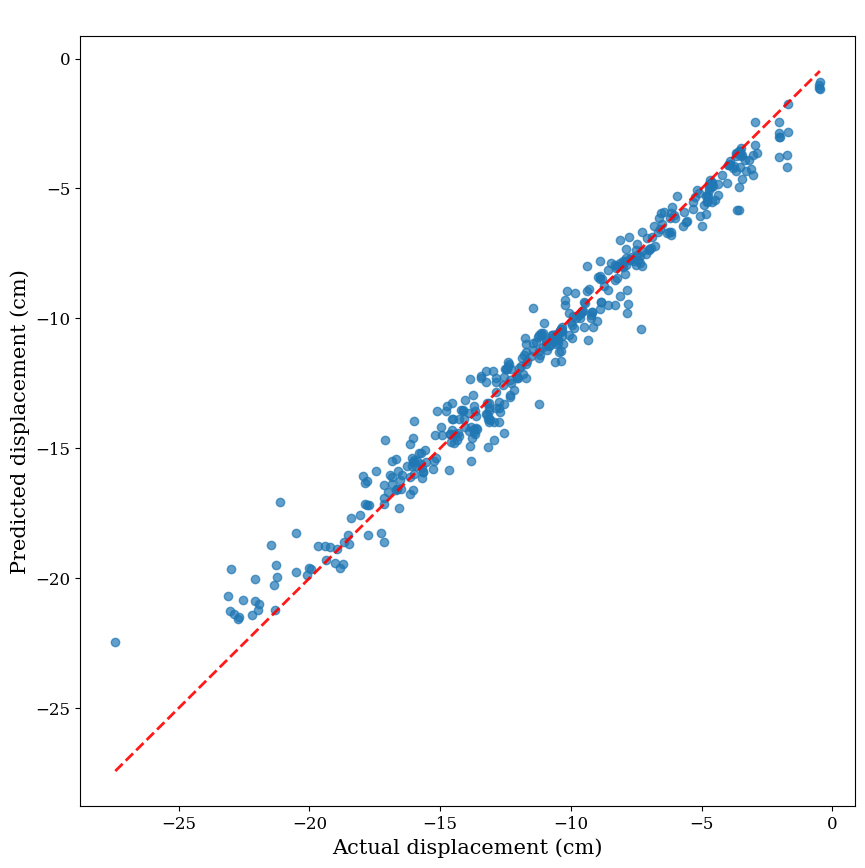

In [ ]:
# Set font to serif
matplotlib.rcParams['font.family'] = 'serif'

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatter plot for train dataset
plt.scatter(x=y_train, y=pred_train, alpha=0.7)

# Set labels and title
plt.xlabel('Actual displacement (cm)', fontsize=15)
plt.ylabel('Predicted displacement (cm)', fontsize=15)
plt.title(' ', fontsize=18)

# Increase font size of x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a 45-degree line
xp = np.linspace(min(y_train.min(), pred_train.min()), max(y_train.max(), pred_train.max()), 100)
plt.plot(xp, xp, alpha=0.9, linewidth=2, color='red', linestyle='--')



# Save the plot as an image
plt.savefig("Train_Scatter_RF.png", dpi=300)

# Show the plot
plt.show()

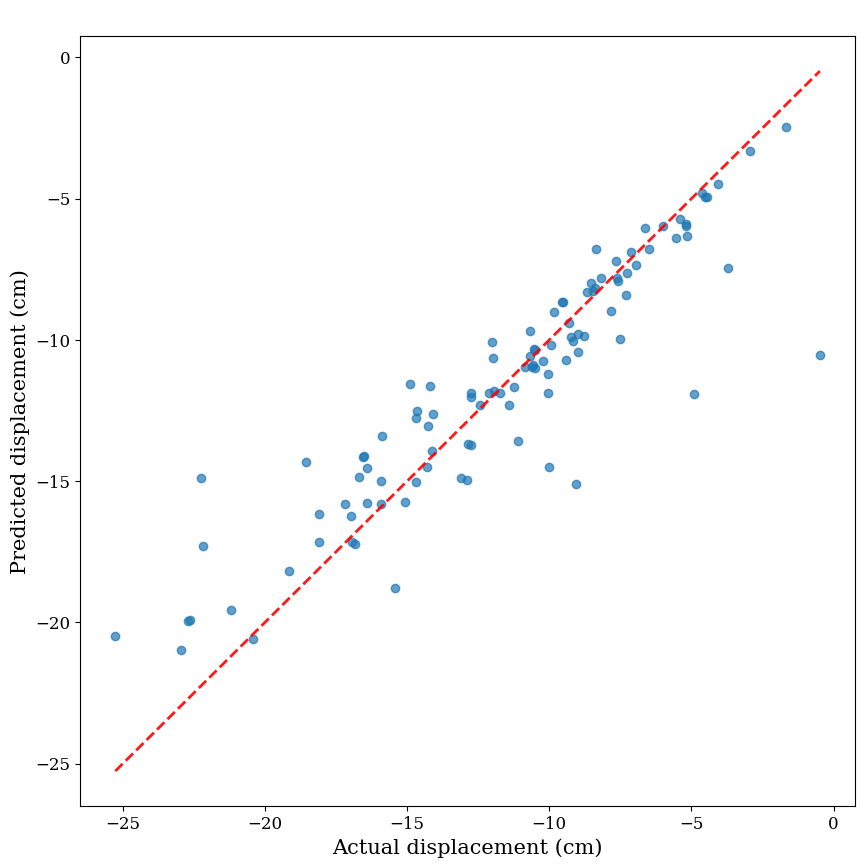

In [ ]:
# Set font to serif
matplotlib.rcParams['font.family'] = 'serif'

plt.figure(figsize=(10, 10))

# Scatter plot for test dataset
plt.scatter(x=y_val, y=pred_test, alpha=0.7)

# Set labels and title
plt.xlabel('Actual displacement (cm)', fontsize=15)
plt.ylabel('Predicted displacement (cm)', fontsize=15)
plt.title(' ', fontsize=18)

# Increase font size of x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a 45-degree line
xp = np.linspace(min(y_val.min(), pred_test.min()), max(y_val.max(), pred_test.max()), 100)
plt.plot(xp, xp, alpha=0.9, linewidth=2, color='red', linestyle='--')



# Save the plot as an image
plt.savefig("Test_Scatter_RF.png", dpi=300)

# Show the plot
plt.show()

## Model 4: GB Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#Sample Boosted Model (Not Tuned)
boostingreg = GradientBoostingRegressor(learning_rate = 0.1,   #learning rate
                                         n_estimators = 1000,  #the total number of trees to fit
                                         subsample = 1.0,      #the fraction of samples to be used,
                                                                    #if .< 1, Stochastic GB
                                         max_depth = 4,        #the maximum depth of each tree
                                         min_samples_leaf = 5, #the minimum number of observations in the leaf nodes of the trees
                                         random_state = 1234)

boosting_reg = boostingreg.fit(X_train, y_train)

In [ ]:
#K-Fold Cross Validation for Choosing Hyper-parameters
#Create Hyper-parameters grid
learning_rate = [0.01, 0.1, 0.3]
subsample = [0.6, 0.8, 1]
max_depth = [1, 3, 5]
grid = list(itertools.product(learning_rate, subsample, max_depth))
grid = pd.DataFrame(data = grid, index = range(1, 28), columns = ['learning_rate', 'subsample', 'max_depth'])
grid

learning_rate  subsample  max_depth
1            0.01        0.6          1
2            0.01        0.6          3
3            0.01        0.6          5
4            0.01        0.8          1
5            0.01        0.8          3
6            0.01        0.8          5
7            0.01        1.0          1
8            0.01        1.0          3
9            0.01        1.0          5
10           0.10        0.6          1
11           0.10        0.6          3
12           0.10        0.6          5
13           0.10        0.8          1
14           0.10        0.8          3
15           0.10        0.8          5
16           0.10        1.0          1
17           0.10        1.0          3
18           0.10        1.0          5
19           0.30        0.6          1
20           0.30        0.6          3
21           0.30        0.6          5
22           0.30        0.8          1
23           0.30        0.8          3
24           0.30        0.8          5
25           0.30        1.0          1
26           0.30        1.0          3
27           0.30        1.0          5

In [ ]:
t#K-fold Cross Validation to Choose the Best Model
from sklearn.model_selection import cross_val_score

cv_errors = np.zeros(shape = grid.shape[0]) #to save cv results

for i in range(grid.shape[0]):
    boostingreg = GradientBoostingRegressor(learning_rate = grid.iloc[i, 0],
                                            subsample = grid.iloc[i, 1],
                                            max_depth = grid.iloc[i, 2],
                                            min_samples_leaf = 5,
                                            n_estimators = 100)
    scores = cross_val_score(estimator = boostingreg,
                             X = X_train, y = y_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 5, n_jobs = -1)
    cv_errors [i] = scores.mean()
#To check scoring: https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
cv_errors

array([-4.56276215, -3.81129675, -3.41959295, -4.57724395, -3.81222438,
       -3.3461269 , -4.59633905, -3.81067007, -3.3129499 , -3.10158017,
       -1.85772139, -1.6533988 , -3.1483294 , -1.83032816, -1.56389352,
       -3.22756829, -1.81179734, -1.51735026, -2.54264826, -1.65678261,
       -1.6978505 , -2.55603662, -1.54764637, -1.43451159, -2.57709772,
       -1.46943516, -1.53275375])

In [ ]:
#Best Model
grid.iloc[np.argmax(cv_errors), :]

learning_rate    0.3
subsample        0.8
max_depth        3.0
Name: 23, dtype: float64

#### Model 4: Prediction on Test Dataset

In [ ]:
boosting_reg = GradientBoostingRegressor(learning_rate = 0.3,  #learning rate
                                         n_estimators = 100,   #the total number of trees to fit
                                         subsample = 1,      #the fraction of samples to be used,
                                                                    #if .< 1, Stochastic GB
                                         max_depth = 3,        #the maximum depth of each tree
                                         min_samples_leaf = 5, #the minimum number of observations in the leaf nodes of the trees
                                         random_state = 123)

boosting_res = boosting_reg.fit(X_train, y_train)

In [ ]:
# Save the model to disk
filename = 'GBoost.pkl'
with open(filename, 'wb') as file:
    pickle.dump(boosting_res, file)

In [ ]:
pred_boosting = boosting_res.predict(X_val)
pred_boosting

array([-16.3875777 , -13.8011163 ,  -9.87577749, -10.04507628,
        -8.31915113, -19.87165453, -15.31135504, -17.62024972,
       -12.72789769, -17.29785127, -16.99551134, -11.1007546 ,
       -11.62943953, -20.98039314, -18.27795395,  -6.99581736,
        -8.34406421, -12.80968037, -14.77765768, -19.14034647,
       -16.0821508 , -15.0916247 , -14.03832755, -15.83906294,
       -10.88781298, -14.12765007, -19.76007984, -22.75553445,
       -15.40962042, -12.45129486, -11.23873586,  -7.82927788,
        -4.51302525, -15.1134702 ,  -9.61268294,  -9.98290257,
       -11.57160551,  -8.06119196,  -9.84592186,  -9.76799923,
        -7.47153575,  -5.29353343,  -7.69900864, -18.40214325,
       -11.19967826, -15.9346359 ,  -7.34996071,  -6.22448133,
       -19.30525333, -10.5950054 , -11.97463001,  -6.19055741,
        -9.96733998, -12.35846092,  -6.26831517,  -5.90134191,
       -10.50779899, -13.33427524, -14.69794847, -15.48307182,
       -15.48328523, -12.87221216, -10.98003056, -11.74

In [ ]:
#Absolute error
abs_err_boosting = abs(y_val - pred_boosting)

In [ ]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of Squared Error':  mean_squared_error(y_val , pred_boosting),
                                             'RMSE': math.sqrt(mean_squared_error(y_val , pred_boosting)),
                                             'R2':r2_score(y_val , pred_boosting),
                                             'Mean of AbsErrors':    abs_err_boosting.mean(),
                                             'Median of AbsErrors' : abs_err_boosting.median(),
                                             'SD of AbsErrors' :     abs_err_boosting.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_boosting),
                                             'Min of AbsErrors':     abs_err_boosting.min(),
                                             'Max of AbsErrors':     abs_err_boosting.max()}, index = ['GB Reg1']),
                               ignore_index = False)

model_comp

<ipython-input-35-405c6c8bbe83>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'Mean of Squared Error':  mean_squared_error(y_val , pred_boosting),


Mean of Squared Error      RMSE        R2  \
Decision Tree Reg               9.677163  3.110814  0.625756   
Bagging Reg                     2.783419  1.668358  0.892357   
Random Forest Reg               4.649748  2.156327  0.820181   
GB Reg1                         2.337023  1.528733  0.909621   

                   Mean of AbsErrors  Median of AbsErrors  SD of AbsErrors  \
Decision Tree Reg           2.023516             1.270982         2.373966   
Bagging Reg                 0.986864             0.520721         1.351574   
Random Forest Reg           1.378930             0.839504         1.665675   
GB Reg1                     0.967782             0.597501         1.189016   

                   IQR of AbsErrors  Min of AbsErrors  Max of AbsErrors  
Decision Tree Reg          1.992034          0.009240         14.397921  
Bagging Reg                0.813001          0.007460          8.660818  
Random Forest Reg          1.475817          0.023905         10.052449  
GB Reg1                    0.984200          0.016974          7.216930

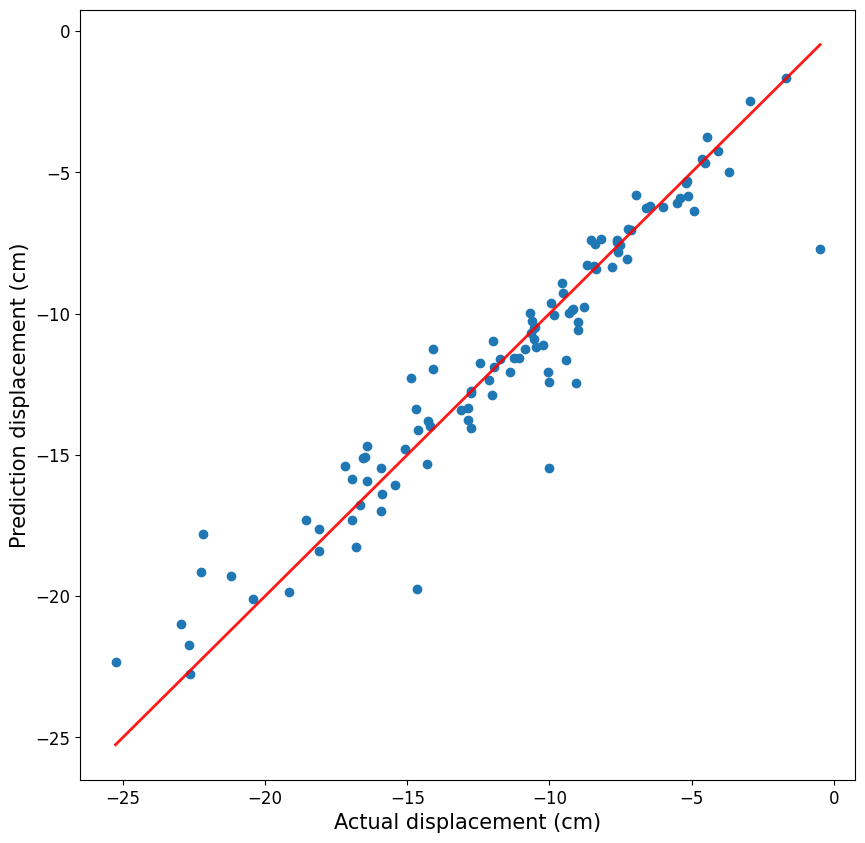

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(x=y_val, y=pred_boosting)
plt.xlabel('Actual displacement (cm)', fontsize=15)
plt.ylabel('Prediction displacement (cm)', fontsize=15)
# plt.title('Actual vs. Prediction for GB')

# Increase font size of x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add 45 degree line
xp = np.linspace(y_val.min(), y_val.max(), 100)
plt.plot(xp, xp, alpha=0.9, linewidth=2, color='red')

plt.savefig("GB.png", dpi=300)
plt.show()

#### Model 4: Prediction on CV

In [ ]:
# Define the parameter grid
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
    'n_estimators': randint(50, 200),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_leaf': randint(1, 10)
}

In [ ]:
# Initialize Gradient Boosting Regressor
boosting_reg = GradientBoostingRegressor(random_state=123)

# Initialize RandomizedSearchCV
random_search_boosting = RandomizedSearchCV(estimator=boosting_reg, param_distributions=param_dist, n_iter=100, cv=5, random_state=123, n_jobs=-1)

In [ ]:
# Perform random search with cross-validation with progress bar
progress_bar = tqdm(total=random_search_boosting.n_iter, desc="Tuning Models")
for _ in range(random_search_boosting.n_iter):
    random_search_boosting.fit(X_train, y_train)
    progress_bar.update(1)

# Close the progress bar
progress_bar.close()

# Get the best parameters
best_params_boosting = random_search_boosting.best_params_
print("Best parameters:", best_params_boosting)

Tuning Models: 100%|██████████| 100/100 [54:44<00:00, 32.84s/it]

Best parameters: {'learning_rate': 0.3, 'max_depth': 4, 'min_samples_leaf': 9, 'n_estimators': 196, 'subsample': 0.9}


In [ ]:
print("Best parameters found:")
for param, value in best_params_boosting.items():
    print(f"\t{param}: {value}")

Best parameters found:
	learning_rate: 0.3
	max_depth: 4
	min_samples_leaf: 9
	n_estimators: 196
	subsample: 0.9


In [ ]:
best_modelGB = random_search_boosting.best_estimator_

In [ ]:
pred_train, pred_test = generate_predictions(best_modelGB, X_train, X_val)


# Calculate metrics for training dataset
mae_train = mean_absolute_error(y_train, pred_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, pred_train)

# Calculate metrics for validation dataset
mae_val = mean_absolute_error(y_val, pred_test)
mse_val = mean_squared_error(y_val, pred_test)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, pred_test)

In [ ]:
# Create a DataFrame to store the metrics for the decision tree model
GB_metricsTuned = pd.DataFrame({
    'Model': ['GB'],
    'Mean Absolute Error (Train)': [mae_train],
    'Mean Squared Error (Train)': [mse_train],
    'Root Mean Squared Error (Train)': [rmse_train],
    'R-squared (Train)': [r2_train],
    'Mean Absolute Error (Test)': [mae_val],
    'Mean Squared Error (Test)': [mse_val],
    'Root Mean Squared Error (Test)': [rmse_val],
    'R-squared (Test)': [r2_val]
})

In [ ]:
GB_metricsTuned

Model  Mean Absolute Error (Train)  Mean Squared Error (Train)  \
0    GB                     0.147645                     0.04356   

   Root Mean Squared Error (Train)  R-squared (Train)  \
0                          0.20871           0.998353   

   Mean Absolute Error (Test)  Mean Squared Error (Test)  \
0                    0.914345                   1.761053   

   Root Mean Squared Error (Test)  R-squared (Test)  
0                        1.327047          0.931895

In [ ]:
saveModel = '/content/drive/MyDrive/Colab Notebooks/FlacAIModels/simpleStaticModel/modelDeveloped'

In [ ]:
# Save the best_params dictionary using pickle
with open(saveModel+"/best_gb.pkl", 'wb') as f:
    pickle.dump(best_modelGB, f)

print("Best parameters saved to:", saveModel)

Best parameters saved to: /content/drive/MyDrive/Colab Notebooks/FlacAIModels/simpleStaticModel/modelDeveloped


In [ ]:
# File path to save the RandomizedSearchCV object
path = saveModel + '/random_search_model_GB.pkl'

# Save the RandomizedSearchCV object
joblib.dump(random_search_boosting, path)
print("RandomizedSearchCV object saved successfully at:", path)

RandomizedSearchCV object saved successfully at: /content/drive/MyDrive/Colab Notebooks/FlacAIModels/simpleStaticModel/modelDeveloped/random_search_model_GB.pkl


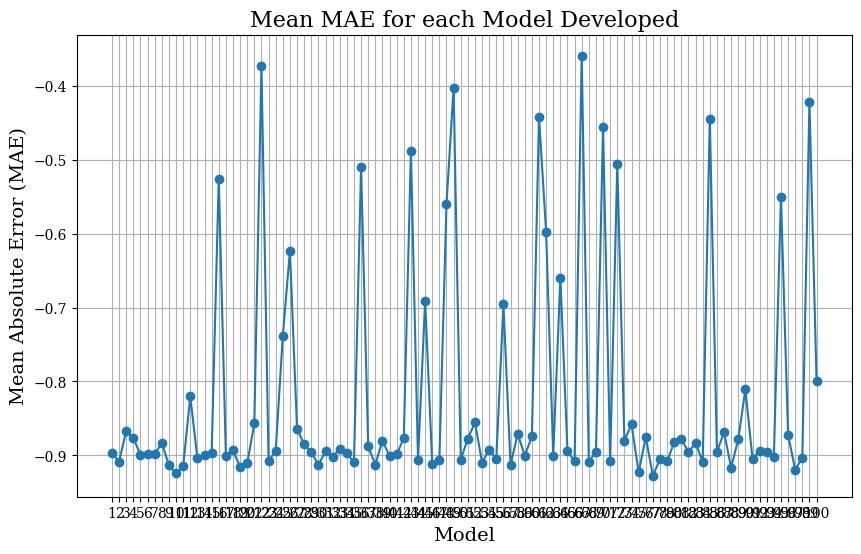

In [ ]:
# Get the mean test scores for each split
split0_test_scores = -random_search_boosting.cv_results_['split0_test_score']  # Note the negative sign to convert to positive MAE
split1_test_scores = -random_search_boosting.cv_results_['split1_test_score']
split2_test_scores = -random_search_boosting.cv_results_['split2_test_score']
split3_test_scores = -random_search_boosting.cv_results_['split3_test_score']
split4_test_scores = -random_search_boosting.cv_results_['split4_test_score']

# Compute the mean of the test scores across all splits
mean_test_scores = (split0_test_scores + split1_test_scores + split2_test_scores + split3_test_scores + split4_test_scores) / 5

# Plot the mean test scores for each split
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mean_test_scores) + 1), mean_test_scores, marker='o', linestyle='-')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=14)
plt.title('Mean MAE for each Model Developed', fontsize=16)
plt.grid(True)
plt.xticks(range(1, len(mean_test_scores) + 1))
plt.show()

### For paper_GB

In [ ]:
pred_train, pred_test = generate_predictions(boosting_res, X_train, X_val)


# Calculate metrics for training dataset
mae_train = mean_absolute_error(y_train, pred_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, pred_train)

# Calculate metrics for validation dataset
mae_val = mean_absolute_error(y_val, pred_test)
mse_val = mean_squared_error(y_val, pred_test)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, pred_test)

In [ ]:
# Create a DataFrame to store the metrics for the decision tree model
GBoost_metrics = pd.DataFrame({
    'Model': ['GB'],
    'Mean Absolute Error (Train)': [mae_train],
    'Mean Squared Error (Train)': [mse_train],
    'Root Mean Squared Error (Train)': [rmse_train],
    'R-squared (Train)': [r2_train],
    'Mean Absolute Error (Test)': [mae_val],
    'Mean Squared Error (Test)': [mse_val],
    'Root Mean Squared Error (Test)': [rmse_val],
    'R-squared (Test)': [r2_val]
})

In [ ]:
GBoost_metrics

Model  Mean Absolute Error (Train)  Mean Squared Error (Train)  \
0    GB                     0.388626                    0.302541   

   Root Mean Squared Error (Train)  R-squared (Train)  \
0                         0.550037           0.988561   

   Mean Absolute Error (Test)  Mean Squared Error (Test)  \
0                    0.967782                   2.337023   

   Root Mean Squared Error (Test)  R-squared (Test)  
0                        1.528733          0.909621

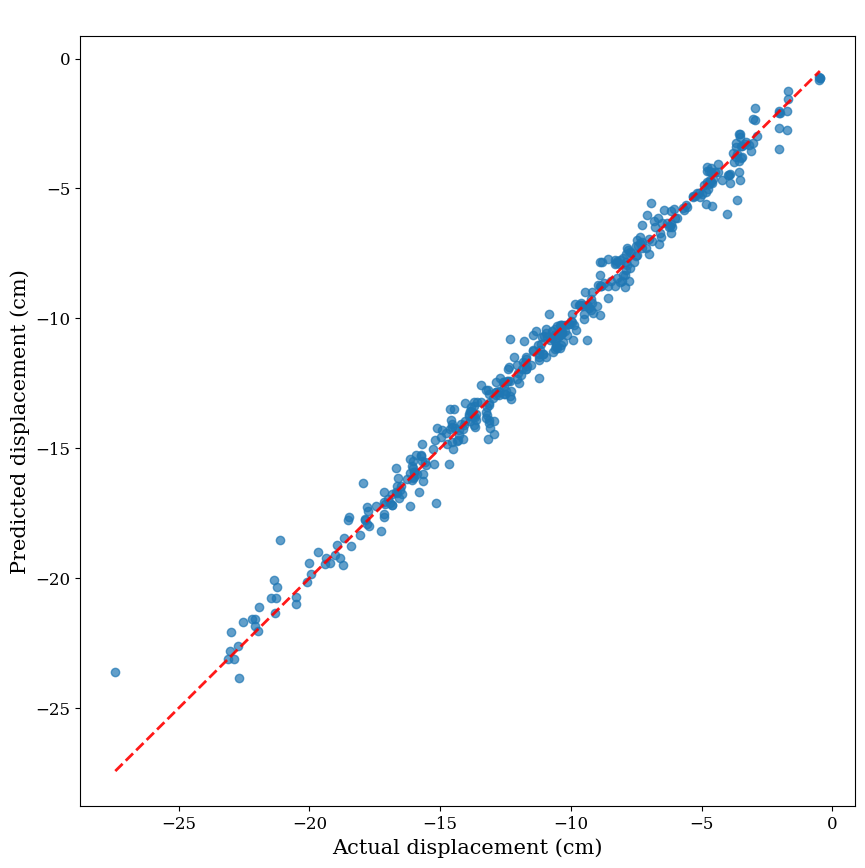

In [ ]:
# Set font to serif
matplotlib.rcParams['font.family'] = 'serif'

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatter plot for train dataset
plt.scatter(x=y_train, y=pred_train, alpha=0.7)

# Set labels and title
plt.xlabel('Actual displacement (cm)', fontsize=15)
plt.ylabel('Predicted displacement (cm)', fontsize=15)
plt.title(' ', fontsize=18)

# Increase font size of x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a 45-degree line
xp = np.linspace(min(y_train.min(), pred_train.min()), max(y_train.max(), pred_train.max()), 100)
plt.plot(xp, xp, alpha=0.9, linewidth=2, color='red', linestyle='--')



# Save the plot as an image
plt.savefig("Train_Scatter_GB.png", dpi=300)

# Show the plot
plt.show()

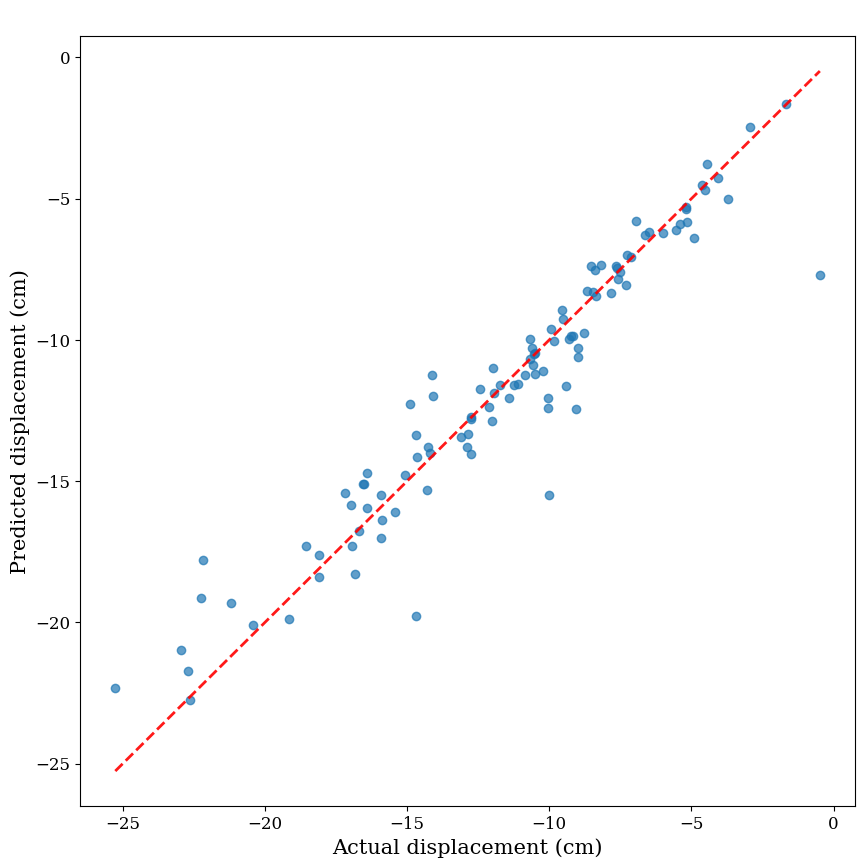

In [ ]:
# Set font to serif
matplotlib.rcParams['font.family'] = 'serif'

plt.figure(figsize=(10, 10))

# Scatter plot for test dataset
plt.scatter(x=y_val, y=pred_test, alpha=0.7)

# Set labels and title
plt.xlabel('Actual displacement (cm)', fontsize=15)
plt.ylabel('Predicted displacement (cm)', fontsize=15)
plt.title(' ', fontsize=18)

# Increase font size of x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a 45-degree line
xp = np.linspace(min(y_val.min(), pred_test.min()), max(y_val.max(), pred_test.max()), 100)
plt.plot(xp, xp, alpha=0.9, linewidth=2, color='red', linestyle='--')



# Save the plot as an image
plt.savefig("Test_Scatter_GB.png", dpi=300)

# Show the plot
plt.show()

## Model 5: XGBoost Regression

In [ ]:
import xgboost as xgb

In [ ]:
from xgboost import XGBRegressor

In [ ]:
#Sample XGB Model (Not Tuned)
xgbreg = XGBRegressor(n_estimators = 1000,
                      max_depth = 4,               #the maximum depth of each tree
                      learning_rate = 0.01,        #learning rate
                      subsample = 0.9,             #the fraction of samples to be used when constructing each tree
                      colsample_bytree = 0.3,      #subsample ratio of columns when constructing each tree
                      reg_alpha = 0.1,             #L1 (Lasso) regularization term
                      reg_lambda = 0.1,            #L2 (Ridge) regularization term
                      n_jobs = -1,                 #-1 means using all processors.
                      random_state = 1234)

xgb_reg = xgbreg.fit(X_train, y_train)

In [ ]:
pred_xgb = xgb_reg.predict(X_val)
pred_xgb

In [ ]:
math.sqrt(mean_squared_error(y_val , pred_xgb))

1.6061139229490797

In [ ]:
model3=XGBRegressor(random_state = 123)
model3.fit(X_train , y_train)
ypreddt_train = model3.predict(X_train)
ypreddt_test = model3.predict(X_val)

In [ ]:
xgbreg.evals_result

<bound method XGBModel.evals_result of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=1234, ...)>

In [ ]:
from scipy.stats import randint
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
np.random.seed(32)

parameters = {'max_depth' : randint(low=2, high=10)
              , 'learning_rate' : (0.01, 0.9)
              , 'min_child_weight' : (1, 5)
              , 'subsample':(0.9,1)
              ,'min_samples_leaf' : randint(low=2, high=10)
              , 'reg_alpha':randint(low=0, high=200)
              , 'reg_lambda':randint(low=0, high=200)
              , 'gamma': (0, 0.9)
              , 'colsample_bytree': (0.1, 0.9)
              , 'n_estimators': randint(low=2, high=1000)
}

DT_grid  = RandomizedSearchCV(model3, param_distributions = parameters, n_iter=50, cv = 5, verbose = True)
# DT_grid  = GridSearchCV(model3, parameters, cv = 5, verbose = False)
DT_grid.fit(X_train,y_train)
DT_grid.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.9, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.9, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=5, min_samples_leaf=6, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=653,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
DT_grid.best_estimator_

#### Model 5: Prediction on Test Dataset

In [ ]:
#Tuned XGB Model (Not Tuned)
xgbreg = XGBRegressor(colsample_bytree=0.9, gamma=0.9, learning_rate=0.9, max_depth=4,
             min_child_weight=5, min_samples_leaf=6, n_estimators=653,
             random_state=1234, reg_alpha=3, reg_lambda=65, subsample=0.9)

xgb_reg = xgbreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:18:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
pred_xgb = xgb_reg.predict(X_val)
pred_xgb

array([-14.795399 , -14.215801 ,  -9.433898 ,  -9.90814  ,  -8.429362 ,
       -19.617073 , -15.013422 , -16.983894 , -13.438455 , -17.610218 ,
       -15.449353 ,  -9.776815 ,  -9.93675  , -20.568403 , -17.952023 ,
        -6.6722913,  -9.350267 , -13.113026 , -14.830252 , -18.537754 ,
       -15.181075 , -15.052355 , -13.400208 , -16.237583 , -11.408248 ,
       -14.795198 , -17.468441 , -22.166002 , -16.29803  , -14.2620325,
       -13.222411 ,  -7.3985763,  -5.015029 , -12.64912  ,  -9.989888 ,
       -10.399042 , -12.6111555,  -7.236602 ,  -9.261657 ,  -9.416534 ,
        -7.3208566,  -5.467059 ,  -7.948496 , -17.777006 , -10.53503  ,
       -16.416035 ,  -5.8613515,  -6.7376266, -19.726255 , -11.253681 ,
       -13.614654 ,  -5.9149156,  -9.886357 , -11.199646 ,  -5.3023477,
        -5.643605 , -10.803084 , -13.748655 , -14.652303 , -15.200265 ,
       -15.547907 , -11.7408   , -11.645086 , -12.625394 ,  -5.418685 ,
       -13.755102 ,  -7.5435405, -12.847    ,  -7.8005443, -13.1

In [ ]:
#Absolute error
abs_err_xgb = abs(y_val - pred_xgb)
abs_err_xgb

311    1.098301
397    0.040699
6      0.216608
184    0.065840
78     0.020258
         ...   
503    0.427710
429    0.409514
432    0.823699
153    0.474248
220    0.346748
Name: zDisp_M, Length: 106, dtype: float64

In [ ]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of Squared Error':  mean_squared_error(y_val , pred_xgb),
                                             'RMSE': math.sqrt(mean_squared_error(y_val , pred_xgb)),
                                             'R2':r2_score(y_val , pred_xgb),
                                             'Mean of AbsErrors':    abs_err_xgb.mean(),
                                             'Median of AbsErrors' : abs_err_xgb.median(),
                                             'SD of AbsErrors' :     abs_err_xgb.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_xgb),
                                             'Min of AbsErrors':     abs_err_xgb.min(),
                                             'Max of AbsErrors':     abs_err_xgb.max()}, index = ['XGB Reg_2Dummies']),
                               ignore_index = False)

model_comp

<ipython-input-132-55b335bc2f4e>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'Mean of Squared Error':  mean_squared_error(y_val , pred_xgb),


Model  Mean Absolute Error (Train)  \
XGB Reg_2Dummies    NaN                          NaN   

                  Mean Squared Error (Train)  Root Mean Squared Error (Train)  \
XGB Reg_2Dummies                         NaN                              NaN   

                  R-squared (Train)  Mean Absolute Error (Test)  \
XGB Reg_2Dummies                NaN                         NaN   

                  Mean Squared Error (Test)  Root Mean Squared Error (Test)  \
XGB Reg_2Dummies                        NaN                             NaN   

                  R-squared (Test)  Mean of Squared Error      RMSE        R2  \
XGB Reg_2Dummies               NaN               2.518576  1.587002  0.902599   

                  Mean of AbsErrors  Median of AbsErrors  SD of AbsErrors  \
XGB Reg_2Dummies           1.035419             0.670187         1.208413   

                  IQR of AbsErrors  Min of AbsErrors  Max of AbsErrors  
XGB Reg_2Dummies          0.937238          0.008565          7.466417

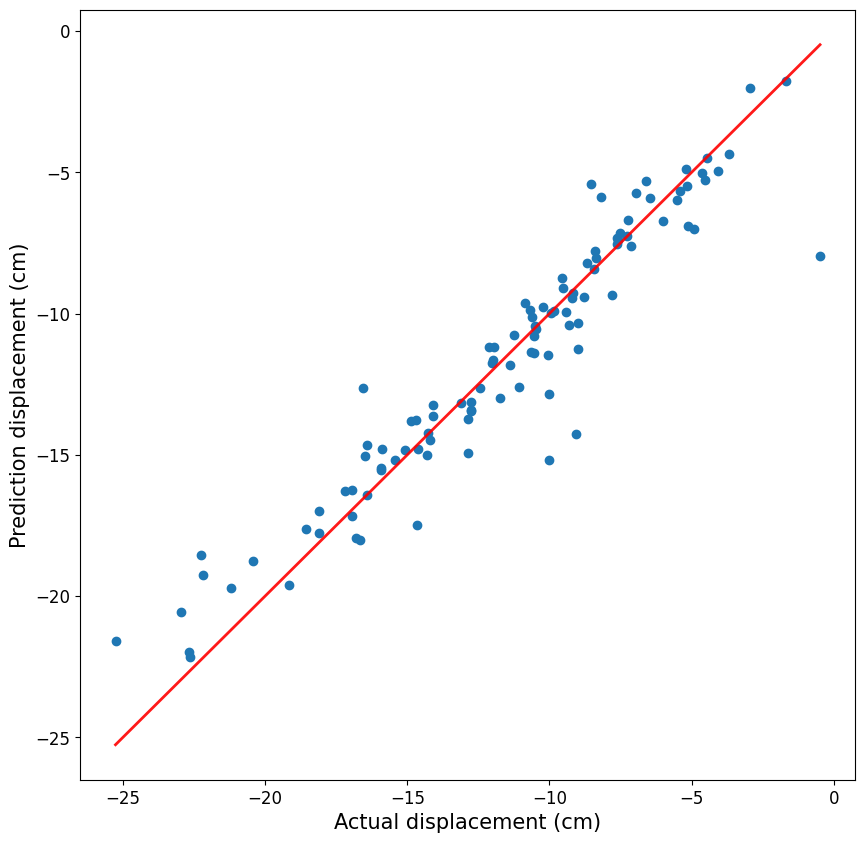

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(x=y_val, y=pred_xgb)
plt.xlabel('Actual displacement (cm)', fontsize=15)
plt.ylabel('Prediction displacement (cm)', fontsize=15)
# plt.title('Actual vs. Prediction for XGBoost')

# Increase font size of x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add 45 degree line
xp = np.linspace(y_val.min(), y_val.max(), 100)
plt.plot(xp, xp, alpha=0.9, linewidth=2, color='red')

plt.savefig("XGBoost.png", dpi=300)
plt.show()

In [ ]:
# Save the model to disk
filename = 'xgb.pkl'
with open(filename, 'wb') as file:
    pickle.dump(xgb_reg, file)

In [ ]:
math.sqrt(mean_squared_error(y_val , pred_xgb))

1.4637469468841546

In [ ]:
model3=XGBRegressor(random_state = 123)
model3.fit(X_train , y_train)
ypreddt_train = model3.predict(X_train)
ypreddt_test = model3.predict(X_val)

In [ ]:
xgbreg.evals_result

<bound method XGBModel.evals_result of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.9, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.9, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=5, min_samples_leaf=6, missing=nan,
             monotone_constraints=None, n_estimators=653, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)>

In [ ]:
from scipy.stats import randint
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
np.random.seed(32)

parameters = {'max_depth' : randint(low=2, high=10)
              , 'learning_rate' : (0.01, 0.9)
              , 'min_child_weight' : (1, 5)
              , 'subsample':(0.9,1)
              ,'min_samples_leaf' : randint(low=2, high=10)
              , 'reg_alpha':randint(low=0, high=200)
              , 'reg_lambda':randint(low=0, high=200)
              , 'gamma': (0, 0.9)
              , 'colsample_bytree': (0.1, 0.9)
              , 'n_estimators': randint(low=2, high=1000)
}

DT_grid  = RandomizedSearchCV(model3, param_distributions = parameters, n_iter=50, cv = 5, verbose = True)
# DT_grid  = GridSearchCV(model3, parameters, cv = 5, verbose = False)
DT_grid.fit(X_train,y_train)
DT_grid.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[21:25:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[21:25:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[21:25:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[21:25:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[21:25:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[21:25:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[21:25:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[21:25:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[21:25:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[21:25:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.9, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.9, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=5, min_samples_leaf=6, missing=nan,
             monotone_constraints=None, n_estimators=653, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [ ]:
DT_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.9, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.9, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=5, min_samples_leaf=6, missing=nan,
             monotone_constraints=None, n_estimators=653, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

### For paper_XGB_look at next

In [ ]:
pred_train, pred_test = generate_predictions(xgb_reg, X_train, X_val)


# Calculate metrics for training dataset
mae_train = mean_absolute_error(y_train, pred_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, pred_train)

# Calculate metrics for validation dataset
mae_val = mean_absolute_error(y_val, pred_test)
mse_val = mean_squared_error(y_val, pred_test)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, pred_test)

In [ ]:
# Create a DataFrame to store the metrics for the decision tree model
XGB_metrics = pd.DataFrame({
    'Model': ['XGB'],
    'Mean Absolute Error (Train)': [mae_train],
    'Mean Squared Error (Train)': [mse_train],
    'Root Mean Squared Error (Train)': [rmse_train],
    'R-squared (Train)': [r2_train],
    'Mean Absolute Error (Test)': [mae_val],
    'Mean Squared Error (Test)': [mse_val],
    'Root Mean Squared Error (Test)': [rmse_val],
    'R-squared (Test)': [r2_val]
})

In [ ]:
XGB_metrics

Model  Mean Absolute Error (Train)  Mean Squared Error (Train)  \
0   XGB                     0.653992                    0.844924   

   Root Mean Squared Error (Train)  R-squared (Train)  \
0                         0.919198           0.968052   

   Mean Absolute Error (Test)  Mean Squared Error (Test)  \
0                    1.035419                   2.518576   

   Root Mean Squared Error (Test)  R-squared (Test)  
0                        1.587002          0.902599

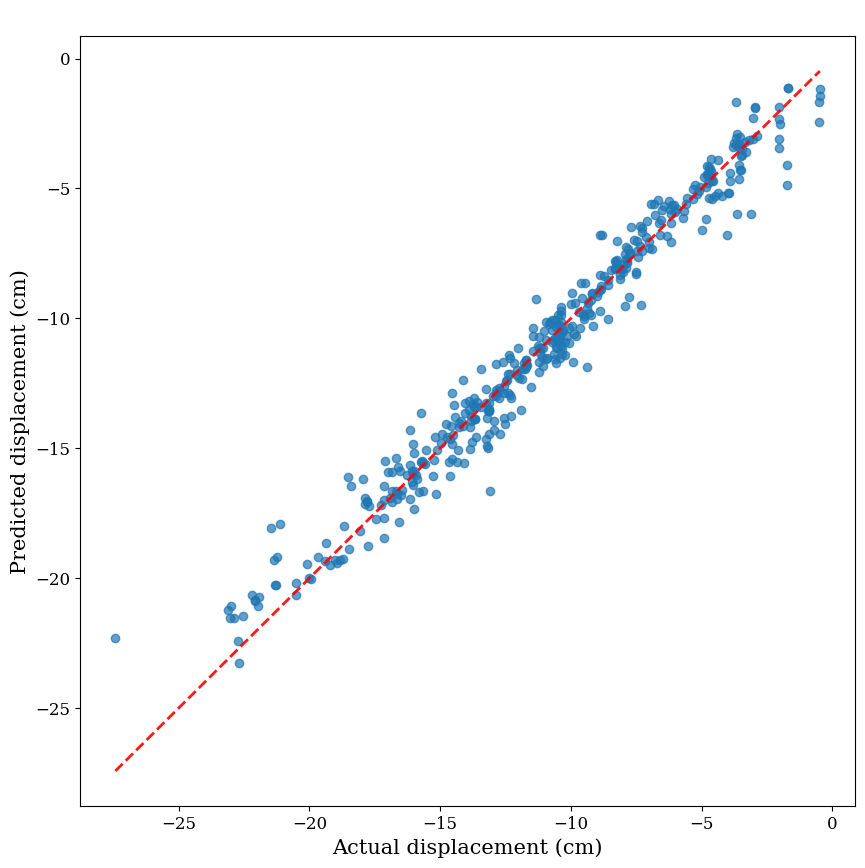

In [ ]:
# Set font to serif
matplotlib.rcParams['font.family'] = 'serif'

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatter plot for train dataset
plt.scatter(x=y_train, y=pred_train, alpha=0.7)

# Set labels and title
plt.xlabel('Actual displacement (cm)', fontsize=15)
plt.ylabel('Predicted displacement (cm)', fontsize=15)
plt.title(' ', fontsize=18)

# Increase font size of x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a 45-degree line
xp = np.linspace(min(y_train.min(), pred_train.min()), max(y_train.max(), pred_train.max()), 100)
plt.plot(xp, xp, alpha=0.9, linewidth=2, color='red', linestyle='--')



# Save the plot as an image
plt.savefig("Train_Scatter_XGB.png", dpi=300)

# Show the plot
plt.show()

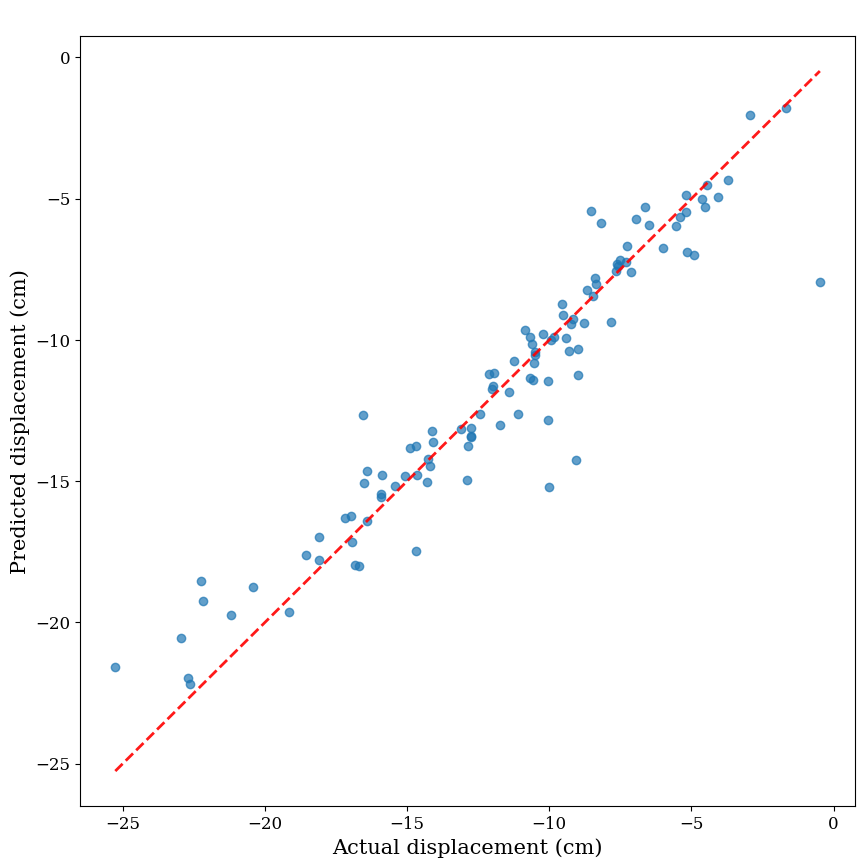

In [ ]:
# Set font to serif
matplotlib.rcParams['font.family'] = 'serif'

plt.figure(figsize=(10, 10))

# Scatter plot for test dataset
plt.scatter(x=y_val, y=pred_test, alpha=0.7)

# Set labels and title
plt.xlabel('Actual displacement (cm)', fontsize=15)
plt.ylabel('Predicted displacement (cm)', fontsize=15)
plt.title(' ', fontsize=18)

# Increase font size of x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a 45-degree line
xp = np.linspace(min(y_val.min(), pred_test.min()), max(y_val.max(), pred_test.max()), 100)
plt.plot(xp, xp, alpha=0.9, linewidth=2, color='red', linestyle='--')



# Save the plot as an image
plt.savefig("Test_Scatter_XGB.png", dpi=300)

# Show the plot
plt.show()

### Model 5: Prediction on CV

In [ ]:
from tqdm import tqdm
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

In [ ]:
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 0.9],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5, 7, 9],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 1, 2, 3, 4],
    'reg_lambda': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

In [ ]:
# Initialize the XGBoost regressor
xgbreg = XGBRegressor(random_state=1234)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgbreg, param_distributions=param_grid, n_iter=100, cv=5, random_state=1234, n_jobs=-1)

# Perform the random search with progress bar
for _ in tqdm(range(random_search.n_iter)):
    random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters:", best_params)

100%|██████████| 100/100 [42:58<00:00, 25.78s/it]

Best parameters: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [ ]:
best_model = random_search.best_estimator_
# Print the best parameters
print("Best parameters found:")
for param, value in best_params.items():
    print(f"\t{param}: {value}")

Best parameters found:
	subsample: 1.0
	reg_lambda: 0
	reg_alpha: 0
	n_estimators: 500
	min_child_weight: 7
	max_depth: 3
	learning_rate: 0.1
	gamma: 0.1
	colsample_bytree: 1.0


In [ ]:
pred_train, pred_test = generate_predictions(best_model, X_train, X_val)


# Calculate metrics for training dataset
mae_train = mean_absolute_error(y_train, pred_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, pred_train)

# Calculate metrics for validation dataset
mae_val = mean_absolute_error(y_val, pred_test)
mse_val = mean_squared_error(y_val, pred_test)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, pred_test)

In [ ]:
# Create a DataFrame to store the metrics for the decision tree model
XGBoost_metricsTuned = pd.DataFrame({
    'Model': ['XGB'],
    'Mean Absolute Error (Train)': [mae_train],
    'Mean Squared Error (Train)': [mse_train],
    'Root Mean Squared Error (Train)': [rmse_train],
    'R-squared (Train)': [r2_train],
    'Mean Absolute Error (Test)': [mae_val],
    'Mean Squared Error (Test)': [mse_val],
    'Root Mean Squared Error (Test)': [rmse_val],
    'R-squared (Test)': [r2_val]
})

In [ ]:
XGBoost_metricsTuned

Model  Mean Absolute Error (Train)  Mean Squared Error (Train)  \
0   XGB                     0.372075                    0.274402   

   Root Mean Squared Error (Train)  R-squared (Train)  \
0                         0.523834           0.989625   

   Mean Absolute Error (Test)  Mean Squared Error (Test)  \
0                    0.892462                   1.785747   

   Root Mean Squared Error (Test)  R-squared (Test)  
0                        1.336318           0.93094

In [ ]:
saveModel = '/content/drive/MyDrive/Colab Notebooks/FlacAIModels/simpleStaticModel/modelDeveloped'

In [ ]:
# Save the best_params dictionary using pickle
with open(saveModel+"/best_xgb.pkl", 'wb') as f:
    pickle.dump(best_model, f)

print("Best parameters saved to:", saveModel)

Best parameters saved to: /content/drive/MyDrive/Colab Notebooks/FlacAIModels/simpleStaticModel/modelDeveloped


In [ ]:
# File path to save the RandomizedSearchCV object
path = saveModel + '/random_search_model_XGB.pkl'

# Save the RandomizedSearchCV object
joblib.dump(random_search, path)
print("RandomizedSearchCV object saved successfully at:", path)

RandomizedSearchCV object saved successfully at: /content/drive/MyDrive/Colab Notebooks/FlacAIModels/simpleStaticModel/modelDeveloped/random_search_model_XGB.pkl


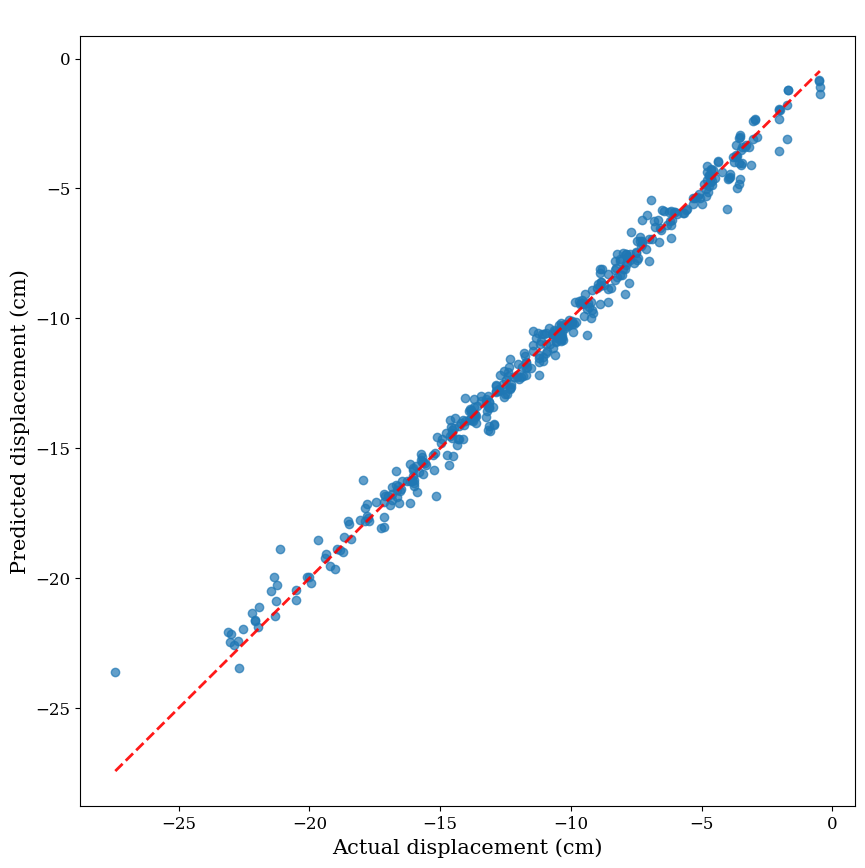

In [ ]:
# Set font to serif
matplotlib.rcParams['font.family'] = 'serif'

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatter plot for train dataset
plt.scatter(x=y_train, y=pred_train, alpha=0.7)

# Set labels and title
plt.xlabel('Actual displacement (cm)', fontsize=15)
plt.ylabel('Predicted displacement (cm)', fontsize=15)
plt.title(' ', fontsize=18)

# Increase font size of x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a 45-degree line
xp = np.linspace(min(y_train.min(), pred_train.min()), max(y_train.max(), pred_train.max()), 100)
plt.plot(xp, xp, alpha=0.9, linewidth=2, color='red', linestyle='--')



# Save the plot as an image
plt.savefig("Train_Scatter_XGBT.png", dpi=300)

# Show the plot
plt.show()

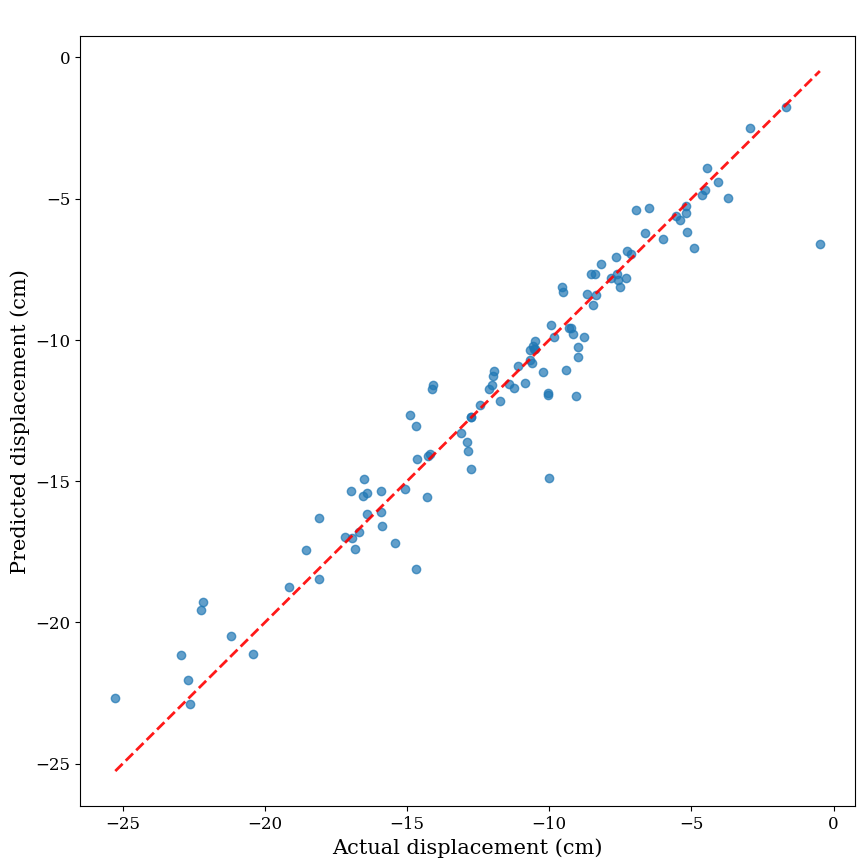

In [ ]:
# Set font to serif
matplotlib.rcParams['font.family'] = 'serif'

plt.figure(figsize=(10, 10))

# Scatter plot for test dataset
plt.scatter(x=y_val, y=pred_test, alpha=0.7)

# Set labels and title
plt.xlabel('Actual displacement (cm)', fontsize=15)
plt.ylabel('Predicted displacement (cm)', fontsize=15)
plt.title(' ', fontsize=18)

# Increase font size of x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a 45-degree line
xp = np.linspace(min(y_val.min(), pred_test.min()), max(y_val.max(), pred_test.max()), 100)
plt.plot(xp, xp, alpha=0.9, linewidth=2, color='red', linestyle='--')



# Save the plot as an image
plt.savefig("Test_Scatter_XGBT.png", dpi=300)

# Show the plot
plt.show()

## load model

# Predict real data

In [ ]:
import xgboost as xgb

In [ ]:
saveModel = '/content/drive/MyDrive/Colab Notebooks/FlacAIModels/simpleStaticModel/modelDeveloped'

In [ ]:
# Load the saved model
with open(saveModel+"/best_xgb.pkl", 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
loaded_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=1234, ...)

In [ ]:
testFile = sourceAddress + "realData2.csv"

In [ ]:
dfTest= pd.read_csv(testFile)
dfTest.tail()

locatoin  faceP  groutP  gLayer  waterT  BurdenLoad  tunnelDepth  \
4  PJerez_D2    150     200       1       2          20           10   
5   Pcuba_E1    250     300       1       4         130           10   
6   Pcuba_E2    150     200       1       4         130           10   
7   PLosP_F1    150     200       1       5         130           12   
8   PLosP_F2     50     100       1       5         130           12   

   geoProperty_model1  geoProperty_model2  geoProperty_model3  \
4                   0                   0                   0   
5                   0                   0                   1   
6                   0                   0                   1   
7                   0                   0                   1   
8                   0                   0                   1   

   geoProperty_model4  geoProperty_model5  geoPosition_B  geoPosition_C  \
4                   0                   0              0              0   
5                   0                   0              0              0   
6                   0                   0              0              0   
7                   0                   0              0              0   
8                   0                   0              0              0   

   geoPosition_D  geoPosition_E  geoPosition_F  geoPosition_z  Real  
4              1              0              0              0  -3.6  
5              0              1              0              0  -6.5  
6              0              1              0              0  -7.3  
7              0              0              1              0  -7.4  
8              0              0              1              0  -9.8

In [ ]:
filtered_df= dfRead[dfRead["geoProperty"]=="model0"]
filtered_df[filtered_df["geoPosition"]=="E"]

faceP  groutP  gLayer  zDisp_M  waterT  BurdenLoad  tunnelDepth  \
247    280     340       0 -1.68651       4          63           15   
248     90     140       1 -1.72282       4          63           15   
249    280     300       1 -1.68725       4          63           15   
250     70     350       1 -1.73978       4          63           15   
251    160     320       1 -1.70532       4          63           15   

    geoPosition geoProperty  
247           E      model0  
248           E      model0  
249           E      model0  
250           E      model0  
251           E      model0

In [ ]:
X_train.columns

Index(['faceP', 'groutP', 'gLayer', 'waterT', 'BurdenLoad', 'tunnelDepth',
       'geoProperty_model1', 'geoProperty_model2', 'geoProperty_model3',
       'geoProperty_model4', 'geoProperty_model5', 'geoPosition_B',
       'geoPosition_C', 'geoPosition_D', 'geoPosition_E', 'geoPosition_F',
       'geoPosition_z'],
      dtype='object')

In [ ]:
X_test = dfTest.drop(columns=["locatoin","Real"])
X_test.columns

Index(['faceP', 'groutP', 'gLayer', 'waterT', 'BurdenLoad', 'tunnelDepth',
       'geoProperty_model1', 'geoProperty_model2', 'geoProperty_model3',
       'geoProperty_model4', 'geoProperty_model5', 'geoPosition_B',
       'geoPosition_C', 'geoPosition_D', 'geoPosition_E', 'geoPosition_F',
       'geoPosition_z'],
      dtype='object')

In [ ]:
X_test['constant'] = 1

In [ ]:
X_test.shape

(9, 17)

In [ ]:
xgb_reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.9, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.9, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=5, min_samples_leaf=6, missing=nan,
             monotone_constraints=None, n_estimators=653, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [ ]:
pred = loaded_model.predict(X_test)

In [ ]:
# pred = loaded_model.predict(X_test)

In [ ]:
pred

array([ -6.2341504,  -3.6227932,  -4.97123  ,  -6.0929565,  -6.143315 ,
       -13.661333 , -15.031979 , -13.699935 , -19.443174 ], dtype=float32)

In [ ]:
dfTest["Real"]

0   -1.7
1   -2.7
2   -3.4
3   -3.1
4   -3.6
5   -6.5
6   -7.3
7   -7.4
8   -9.8
Name: Real, dtype: float64

In [ ]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': dfTest["Real"], 'Predicted': pred})

# Calculate absolute error
results_df['Absolute Error'] = abs(results_df['Actual'] - results_df['Predicted'])

# Calculate percentage error
results_df['Percentage Error'] = (results_df['Absolute Error'] / results_df['Actual']) * 100

# Display the DataFrame
results_df

Actual  Predicted  Absolute Error  Percentage Error
0    -1.7  -6.234150        4.534150       -266.714730
1    -2.7  -3.622793        0.922793        -34.177526
2    -3.4  -4.971230        1.571230        -46.212648
3    -3.1  -6.092957        2.992957        -96.546985
4    -3.6  -6.143315        2.543315        -70.647634
5    -6.5 -13.661333        7.161333       -110.174355
6    -7.3 -15.031979        7.731979       -105.917515
7    -7.4 -13.699935        6.299935        -85.134256
8    -9.8 -19.443174        9.643174        -98.399738

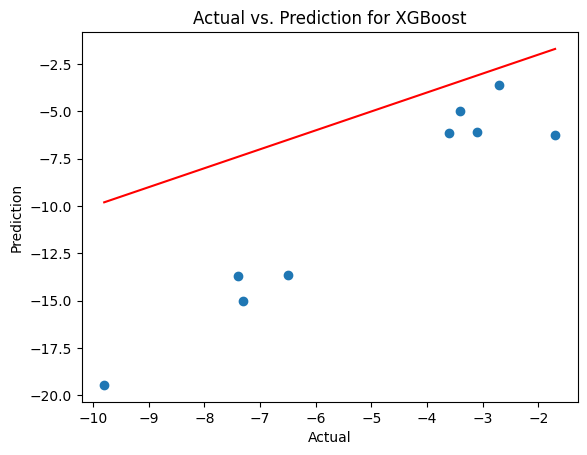

In [ ]:
# Create scatter plot
plt.scatter(x=dfTest["Real"], y=pred)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction for XGBoost')

# Add 45-degree line
plt.plot([dfTest["Real"].min(), dfTest["Real"].max()], [dfTest["Real"].min(), dfTest["Real"].max()], color='red')

# Show plot
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE
mse = mean_squared_error(dfTest["Real"], pred)

# Calculate MAE
mae = mean_absolute_error(dfTest["Real"], pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 31.450360806860424
Mean Absolute Error (MAE): 4.822318447960748


In [ ]:
math.sqrt(mean_squared_error(dfTest["Real"] , pred)) #RMSE

5.608062125802497

In [ ]:
r2_score(dfTest["Real"] , pred) #R2

-3.6691334775580913

In [ ]:
dfRead[(dfRead["geoPosition"]=="F") & (dfRead["BurdenLoad"]>100)]

## ReRun model

In [ ]:
from xgboost import XGBRegressor

In [ ]:
updated_model = XGBRegressor(loaded_model.get_xgb_params())
updated_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshol...
                        'max_cat_to_onehot': None, 'max_delta_step': None,
                        'max_depth': 3, 'max_leaves': None,
                        'min_child_weight': 7, 'monotone_constraints': None,
                        'multi_strategy': None, 'n_jobs': None,
                        'num_parallel_tree': None,
                        'objective': 'reg:squarederror', 'random_state': 1234,
                        'reg_alpha': 0, 'reg_lambda': 0,
                        'sampling_method': None, 'scale_pos_weight': None,
                        'subsample': 1.0, 'tree_method': None, ...}, ...)

In [ ]:
# Train the XGBoost model with the new data
updated_model.fit(X_test, dfTest["Real"])

# Make predictions on the new data
predictions = updated_model.predict(X_test)

# Evaluate the performance of the updated model
mse = mean_squared_error(dfTest["Real"], predictions)
mae = mean_absolute_error(dfTest["Real"], predictions)


XGBoostError: [22:55:08] /workspace/src/objective/objective.cc:27: Unknown objective function: `{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'device': None, 'eval_metric': None, 'gamma': 0.1, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': 7, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 1234, 'reg_alpha': 0, 'reg_lambda': 0, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 1.0, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}`
Objective candidate: rank:ndcg
Objective candidate: rank:pairwise
Objective candidate: rank:map
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: reg:quantileerror
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror

Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x1ba24e) [0x7cbae22d424e]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x60c6ce) [0x7cbae27266ce]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4b9c3f) [0x7cbae25d3c3f]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4cccd3) [0x7cbae25e6cd3]
  [bt] (4) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4c5268) [0x7cbae25df268]
  [bt] (5) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7cbae227bef0]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7cbb51e25e2e]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7cbb51e22493]
  [bt] (8) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa3e9) [0x7cbb51e4b3e9]



# DEvelop Metrics table

In [ ]:
all_metrics = pd.concat([XGB_metrics, GBoost_metrics, rf_metrics, bagging_metrics, tree_metrics], ignore_index=True)


In [ ]:
all_metrics

Model  Mean Absolute Error (Train)  Mean Squared Error (Train)  \
0            XGB                     0.653992                    0.844924   
1             GB                     0.388626                    0.302541   
2             RF                     0.608144                    0.738547   
3        Bagging                     0.390881                    0.388675   
4  Decision Tree                     2.448410                   10.222634   

   Root Mean Squared Error (Train)  R-squared (Train)  \
0                         0.919198           0.968052   
1                         0.550037           0.988561   
2                         0.859387           0.972075   
3                         0.623438           0.985304   
4                         3.197285           0.613469   

   Mean Absolute Error (Test)  Mean Squared Error (Test)  \
0                    1.035419                   2.518576   
1                    0.967782                   2.337023   
2                    1.378930                   4.649748   
3                    0.986864                   2.783419   
4                    2.649802                  12.503463   

   Root Mean Squared Error (Test)  R-squared (Test)  
0                        1.587002          0.902599  
1                        1.528733          0.909621  
2                        2.156327          0.820181  
3                        1.668358          0.892357  
4                        3.536024          0.516455

##  Error analyse


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = {
    "Model": ["DT", "Bagging", "RF", "GB", "XGB"],
    "Training MAE": [2.44841, 0.390881, 0.608144, 0.388626, 0.372075],
    "Training MSE": [10.22263, 0.388675, 0.738547, 0.302541, 0.274402],
    "Training RMSE": [3.197285, 0.623438, 0.859387, 0.550037, 0.523834],
    "Training R-squared": [0.613469, 0.985304, 0.972075, 0.988561, 0.989625],
    "Test MAE": [2.649802, 0.986864, 1.37893, 0.967782, 0.892462],
    "Test MSE": [12.50346, 2.783419, 4.649748, 2.337023, 1.785747],
    "Test RMSE": [3.536024, 1.668358, 2.156327, 1.528733, 1.336318],
    "Test R-squared": [0.516455229, 0.892357207, 0.820180923, 0.909620605, 0.930940048]
}


df = pd.DataFrame(data)
df

Model  Training MAE  Training MSE  Training RMSE  Training R-squared  \
0       DT      2.448410     10.222630       3.197285            0.613469   
1  Bagging      0.390881      0.388675       0.623438            0.985304   
2       RF      0.608144      0.738547       0.859387            0.972075   
3       GB      0.388626      0.302541       0.550037            0.988561   
4      XGB      0.372075      0.274402       0.523834            0.989625   

   Test MAE   Test MSE  Test RMSE  Test R-squared  
0  2.649802  12.503460   3.536024        0.516455  
1  0.986864   2.783419   1.668358        0.892357  
2  1.378930   4.649748   2.156327        0.820181  
3  0.967782   2.337023   1.528733        0.909621  
4  0.892462   1.785747   1.336318        0.930940

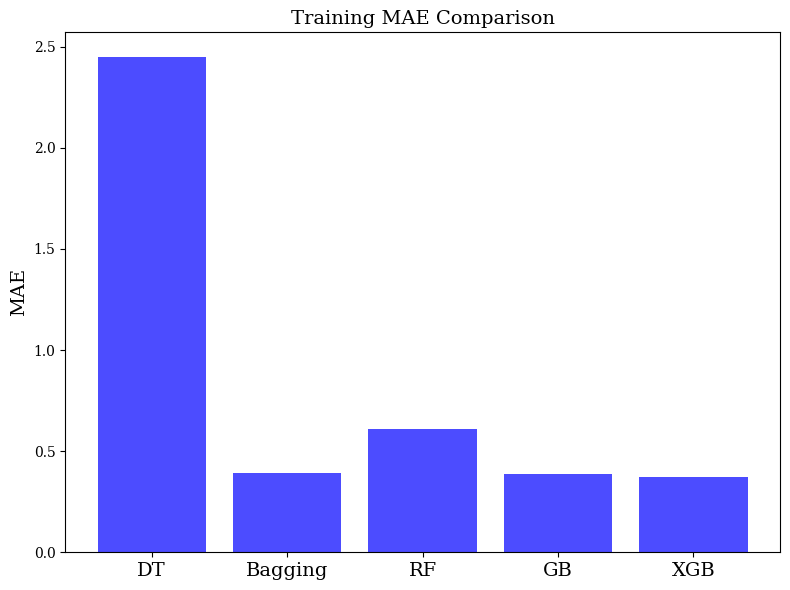

In [ ]:
# Set serif font
plt.rcParams['font.family'] = 'serif'

# Set the figure size
plt.figure(figsize=(8, 6))

# Bar chart for MAE
plt.bar(df["Model"], df["Training MAE"], color="b", alpha=0.7)

plt.ylabel("MAE", fontsize=14)
plt.title("Training MAE Comparison", fontsize=14)
plt.xticks(rotation=0, fontsize=14)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()

# Save the plot with 300 DPI resolution
plt.savefig("Training_MAE_Comparison.png", dpi=300)

# Show the plot
plt.show()

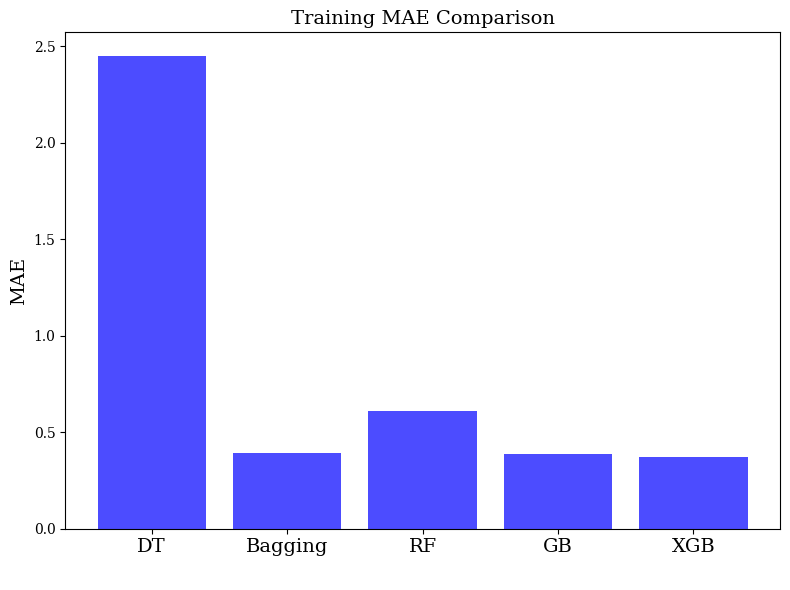

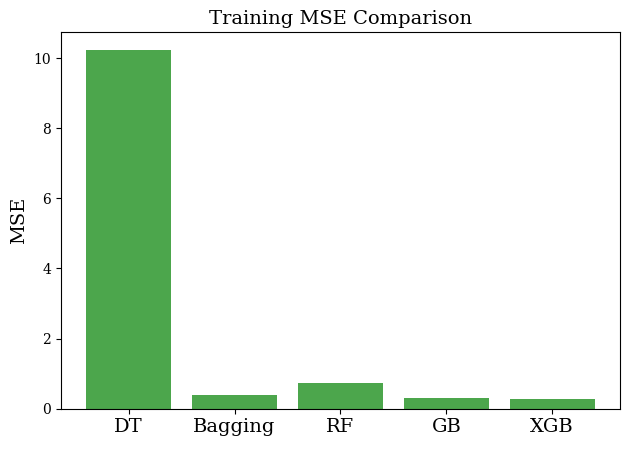

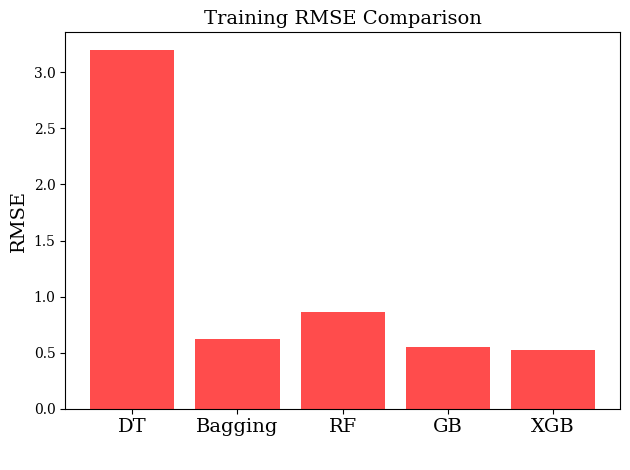

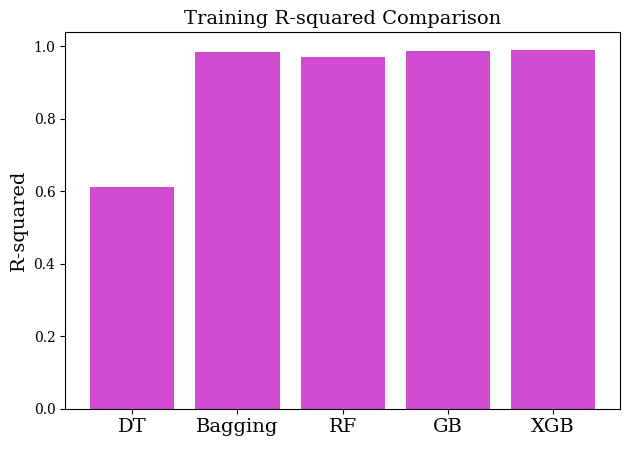

In [ ]:
# Set serif font
plt.rcParams['font.family'] = 'serif'

# Define plot attributes
plot_attributes = [
    {"column": "Training MAE", "ylabel": "MAE", "title": "Training MAE Comparison", "filename": "Training_MAE_Comparison.png", "color": "b"},
    {"column": "Training MSE", "ylabel": "MSE", "title": "Training MSE Comparison", "filename": "Training_MSE_Comparison.png", "color": "g"},
    {"column": "Training RMSE", "ylabel": "RMSE", "title": "Training RMSE Comparison", "filename": "Training_RMSE_Comparison.png", "color": "r"},
    {"column": "Training R-squared", "ylabel": "R-squared", "title": "Training R-squared Comparison", "filename": "Training_R-squared_Comparison.png", "color": "m"}
]

# Set the figure size
plt.figure(figsize=(8, 6))

# Iterate over plot attributes and create bar chart for each
for attributes in plot_attributes:
    plt.bar(df["Model"], df[attributes["column"]], color=attributes["color"], alpha=0.7)
    plt.xlabel(" ", fontsize=14)
    plt.ylabel(attributes["ylabel"], fontsize=14)
    plt.title(attributes["title"], fontsize=14)
    plt.xticks(rotation=0, fontsize=14)  # Rotate x-axis labels

    # Adjust layout
    plt.tight_layout()

    # Save the plot with 300 DPI resolution
    plt.savefig(attributes["filename"], dpi=300)

    # Show the plot
    plt.show()


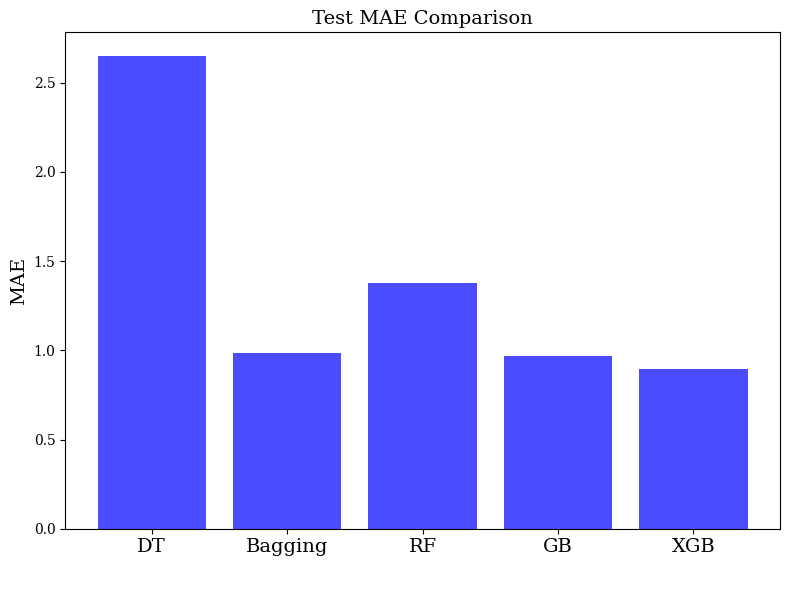

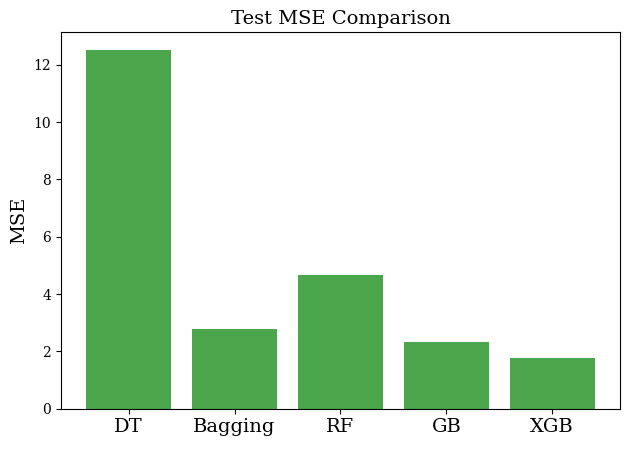

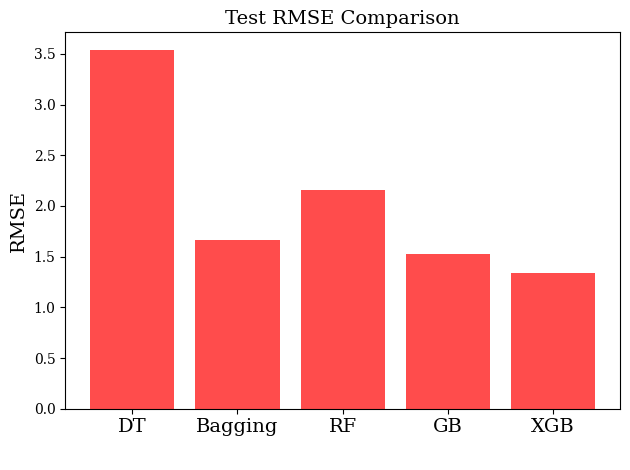

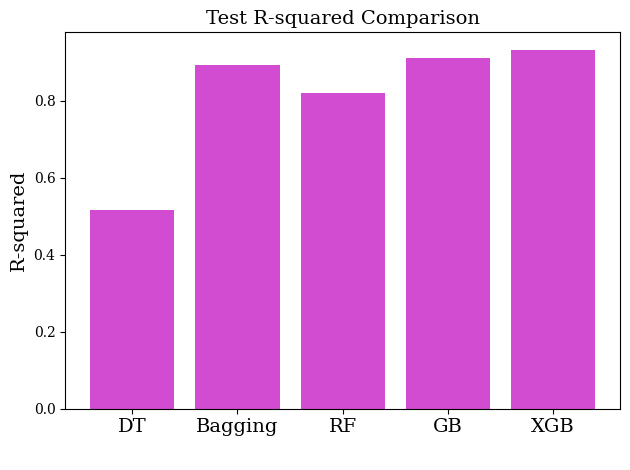

In [ ]:
# Set serif font
plt.rcParams['font.family'] = 'serif'

# Define plot attributes for test comparison
test_plot_attributes = [
    {"column": "Test MAE", "ylabel": "MAE", "title": "Test MAE Comparison", "filename": "Test_MAE_Comparison.png", "color": "b"},
    {"column": "Test MSE", "ylabel": "MSE", "title": "Test MSE Comparison", "filename": "Test_MSE_Comparison.png", "color": "g"},
    {"column": "Test RMSE", "ylabel": "RMSE", "title": "Test RMSE Comparison", "filename": "Test_RMSE_Comparison.png", "color": "r"},
    {"column": "Test R-squared", "ylabel": "R-squared", "title": "Test R-squared Comparison", "filename": "Test_R-squared_Comparison.png", "color": "m"}
]

# Set the figure size
plt.figure(figsize=(8, 6))

# Iterate over plot attributes for test comparison and create bar chart for each
for attributes in test_plot_attributes:
    plt.bar(df["Model"], df[attributes["column"]], color=attributes["color"], alpha=0.7)
    plt.xlabel(" ", fontsize=14)
    plt.ylabel(attributes["ylabel"], fontsize=14)
    plt.title(attributes["title"], fontsize=14)
    plt.xticks(rotation=0, fontsize=14)  # Rotate x-axis labels

    # Adjust layout
    plt.tight_layout()

    # Save the plot with 300 DPI resolution
    plt.savefig(attributes["filename"], dpi=300)

    # Show the plot
    plt.show()

# Predict the location

In [ ]:
saveModel+"/best_xgb.pkl"

'/content/drive/MyDrive/Colab Notebooks/FlacAIModels/simpleStaticModel/modelDeveloped/best_xgb.pkl'

In [ ]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=1234, ...)

In [ ]:
predLoc = best_model.predict(X)
predLoc

array([ -8.111561  ,  -6.0232635 ,  -7.801808  ,  -7.434939  ,
        -6.200619  , -10.541349  ,  -9.581026  , -10.140023  ,
        -9.6611595 ,  -9.79848   , -16.098755  , -12.649052  ,
       -17.058344  , -11.710203  , -12.07883   , -14.048666  ,
       -11.668808  , -10.998955  , -11.692696  , -10.678727  ,
        -5.5879197 ,  -4.685463  ,  -6.1692386 ,  -4.563266  ,
        -4.7656627 , -11.413255  , -12.89697   , -11.913777  ,
       -11.652598  , -10.213194  ,  -9.469664  , -12.172342  ,
       -10.121977  , -12.172794  ,  -9.411455  ,  -4.856204  ,
        -5.0340714 ,  -3.9289289 ,  -4.28453   ,  -3.9264102 ,
        -8.079967  ,  -8.101196  , -11.5540495 , -10.484362  ,
       -10.35406   , -10.981279  , -10.696729  , -10.797831  ,
       -12.526078  , -10.7511835 , -10.765202  , -17.633444  ,
       -11.882798  , -10.5879755 , -12.175004  ,  -7.8766923 ,
        -7.937431  ,  -7.8539443 , -12.2566395 ,  -8.078768  ,
        -7.5027404 ,  -7.1505675 , -10.658306  ,  -7.64

In [ ]:
math.sqrt(mean_squared_error(y , predLoc)) #RMSE

0.7609005858329603

In [ ]:
r2_score(y , predLoc) #R2

0.9780436136753258

In [ ]:
predLoc

array([ -7.1602697,  -6.23956  ,  -9.350267 ,  -8.224804 ,  -6.5125065,
       -11.676224 ,  -9.433898 , -10.666622 ,  -9.027099 ,  -9.261657 ,
       -15.449353 , -13.810823 , -17.73804  , -11.867615 , -12.15004  ,
       -14.473676 , -11.122507 , -10.147135 , -10.747429 ,  -9.871822 ,
        -6.6124287,  -4.4611773,  -6.891089 ,  -4.343551 ,  -4.253619 ,
       -10.752658 , -14.062496 , -12.657972 , -11.829281 ,  -9.01179  ,
        -9.989888 , -12.079184 ,  -9.4549675, -13.002764 ,  -8.638363 ,
        -4.708025 ,  -6.1674232,  -3.8890066,  -4.724712 ,  -4.4998126,
        -6.797545 ,  -6.797545 , -11.521578 , -10.370853 , -10.198967 ,
       -10.814359 , -11.36486  ,  -9.733496 , -13.747695 , -11.35395  ,
        -9.238134 , -18.457579 , -11.416932 , -10.431232 , -14.453089 ,
        -7.3985763,  -7.239818 ,  -6.9738164, -13.530253 ,  -7.8331633,
        -7.699683 ,  -6.6617913, -11.887621 ,  -7.8005443,  -7.4748073,
        -7.038992 ,  -7.279354 ,  -7.5098257,  -7.236602 ,  -6.0

In [ ]:
# Add the array as a new column to the DataFrame
dfRead['zDisp_M_pred'] = predLoc
dfRead.head()

faceP  groutP  gLayer  zDisp_M  waterT  BurdenLoad  tunnelDepth  \
0     70     300       0 -7.51789       3         102           15   
1    190     340       1 -7.07843       3         102           15   
2    150     160       0 -7.81465       3         102           15   
3    300     150       1 -7.52817       3         102           15   
4    180     320       0 -7.27724       3         102           15   

  geoPosition geoProperty  zDisp_M_pred  
0           z      model0     -8.111561  
1           z      model0     -6.023263  
2           z      model0     -7.801808  
3           z      model0     -7.434939  
4           z      model0     -6.200619

In [ ]:
dfCat = dfRead[["zDisp_M",	"geoPosition",	"geoProperty","zDisp_M_pred"]]
dfCat

zDisp_M geoPosition geoProperty  zDisp_M_pred
0    -7.51789           z      model0     -8.111561
1    -7.07843           z      model0     -6.023263
2    -7.81465           z      model0     -7.801808
3    -7.52817           z      model0     -7.434939
4    -7.27724           z      model0     -6.200619
..        ...         ...         ...           ...
521 -14.10640           F      model5    -11.745064
522 -14.08380           F      model5    -11.592522
523 -12.96760           B      model5    -13.430178
524 -15.81460           B      model5    -15.927742
525 -14.30110           B      model5    -15.546711

[526 rows x 4 columns]

In [ ]:
# Calculate the percentage error
dfCat['Percentage_Error'] = (abs((dfCat['zDisp_M_pred'] - dfCat['zDisp_M'])) / abs(dfCat['zDisp_M'])) * 100
dfCat

zDisp_M geoPosition geoProperty  zDisp_M_pred  Percentage_Error
0    -7.51789           z      model0     -8.111561          7.896775
1    -7.07843           z      model0     -6.023263         14.906788
2    -7.81465           z      model0     -7.801808          0.164334
3    -7.52817           z      model0     -7.434939          1.238430
4    -7.27724           z      model0     -6.200619         14.794356
..        ...         ...         ...           ...               ...
521 -14.10640           F      model5    -11.745064         16.739467
522 -14.08380           F      model5    -11.592522         17.688964
523 -12.96760           B      model5    -13.430178          3.567180
524 -15.81460           B      model5    -15.927742          0.715428
525 -14.30110           B      model5    -15.546711          8.709896

[526 rows x 5 columns]

In [ ]:
indexRemove = dfCat[dfCat['Percentage_Error'] > 100].index
dfNew = dfCat.drop(indexRemove)
dfNew

zDisp_M geoPosition geoProperty  zDisp_M_pred  Percentage_Error
0    -7.51789           z      model0     -8.111561          7.896775
1    -7.07843           z      model0     -6.023263         14.906788
2    -7.81465           z      model0     -7.801808          0.164334
3    -7.52817           z      model0     -7.434939          1.238430
4    -7.27724           z      model0     -6.200619         14.794356
..        ...         ...         ...           ...               ...
521 -14.10640           F      model5    -11.745064         16.739467
522 -14.08380           F      model5    -11.592522         17.688964
523 -12.96760           B      model5    -13.430178          3.567180
524 -15.81460           B      model5    -15.927742          0.715428
525 -14.30110           B      model5    -15.546711          8.709896

[523 rows x 5 columns]

In [ ]:
# Calculate the mean percentage error for each 'geoProperty' category
geoProperty_mean_error = dfNew.groupby('geoProperty')['Percentage_Error'].mean()

# Calculate the mean percentage error for each 'geoPosition' category
geoPosition_mean_error = dfNew.groupby('geoPosition')['Percentage_Error'].mean()

# Display the mean percentage errors
print("Mean Percentage Error by geoProperty:")
print(geoProperty_mean_error)

print("\nMean Percentage Error by geoPosition:")
print(geoPosition_mean_error)

Mean Percentage Error by geoProperty:
geoProperty
model0    7.117004
model1    2.620317
model2    2.445017
model3    3.691216
model4    3.975226
model5    4.431094
Name: Percentage_Error, dtype: float64

Mean Percentage Error by geoPosition:
geoPosition
A    10.975712
B     4.901354
C     8.079945
D     2.283241
E     6.517757
F     7.070940
z     4.755129
Name: Percentage_Error, dtype: float64


In [ ]:

# Mean Percentage Error data by geoProperty
geo_property_data = {
    'model0': 7.117004,
    'model1': 2.620317,
    'model2': 2.445017,
    'model3': 3.691216,
    'model4': 3.975226,
    'model5': 4.431094
}

# Mean Percentage Error data by geoPosition
geo_position_data = {
    'A': 10.975712,
    'B': 4.901354,
    'C': 8.079945,
    'D': 2.283241,
    'E': 6.517757,
    'F': 7.070940,
    'z': 4.755129
}

# Create a Series from the geoPosition data
geoPosition_mean_error = pd.Series(geo_position_data, name='Percentage_Error')

# Create a Series from the geoProperty data
geoProperty_mean_error = pd.Series(geo_property_data, name='Percentage_Error')

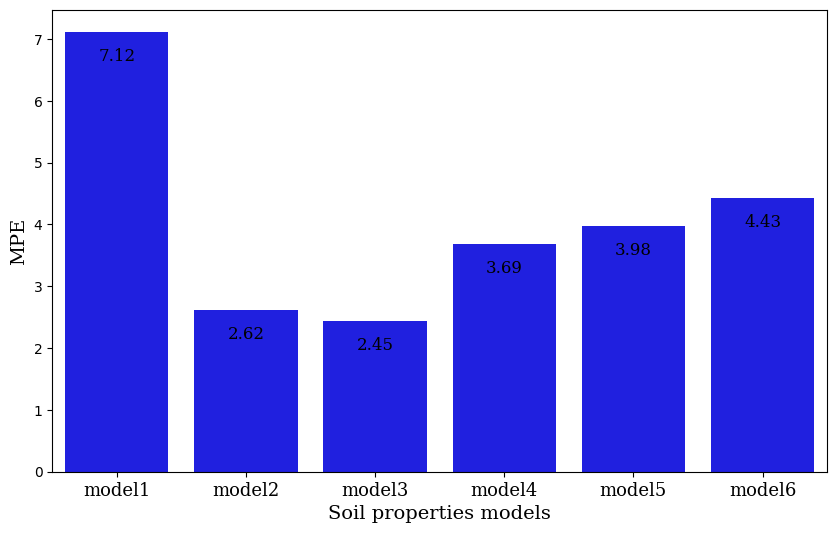

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

bars = sns.barplot(x=geoProperty_mean_error.index, y=geoProperty_mean_error.values, color='blue')

# Customize the plot
plt.xlabel('Soil properties models', fontsize=14, fontfamily='serif')
plt.ylabel('MPE', fontsize=14, fontfamily='serif')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontfamily='serif')
new_labels = ['model1', 'model2', 'model3', 'model4', 'model5', 'model6']
plt.xticks(range(len(new_labels)), new_labels, fontsize=13, fontfamily='serif')

# Annotate the values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()-0.4),
                 ha='center', va='center', fontsize=12, fontfamily='serif')


# Save the plot as an image for the paper (adjust DPI as needed)
plt.savefig('mean_percentage_error_SoilProp.png', dpi=800, bbox_inches='tight', pad_inches=0.1)
# Show the plot
plt.show()


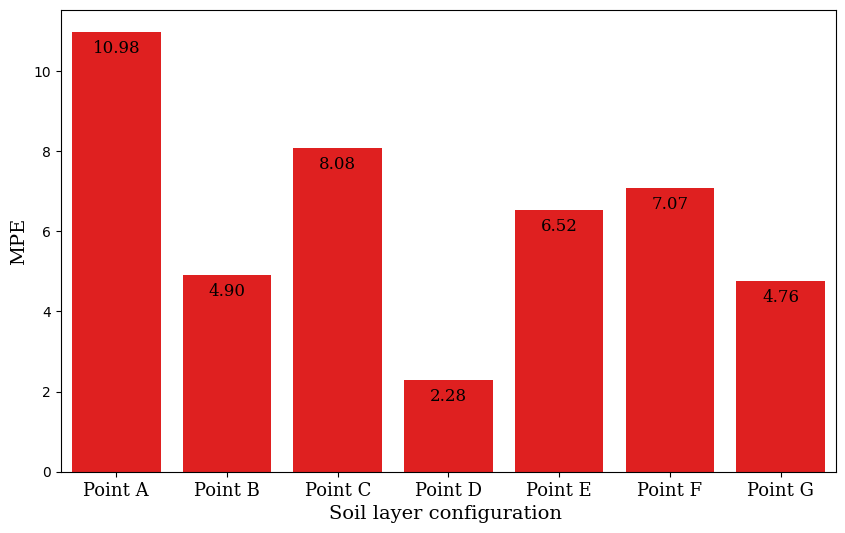

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

bars = sns.barplot(x=geoPosition_mean_error.index, y=geoPosition_mean_error.values, color='red')

# Customize the plot
plt.xlabel('Soil layer configuration ', fontsize=14, fontfamily='serif')
plt.ylabel('MPE', fontsize=14, fontfamily='serif')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontfamily='serif')
new_labels = ['Point A', 'Point B', 'Point C', 'Point D', 'Point E', 'Point F','Point G']
plt.xticks(range(len(new_labels)), new_labels, fontsize=13, fontfamily='serif')

# Annotate the values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()-0.4),
                 ha='center', va='center', fontsize=12, fontfamily='serif')


# Save the plot as an image for the paper (adjust DPI as needed)
plt.savefig('mean_percentage_error_SoilLayers.png', dpi=800, bbox_inches='tight', pad_inches=0.1)
# Show the plot
plt.show()


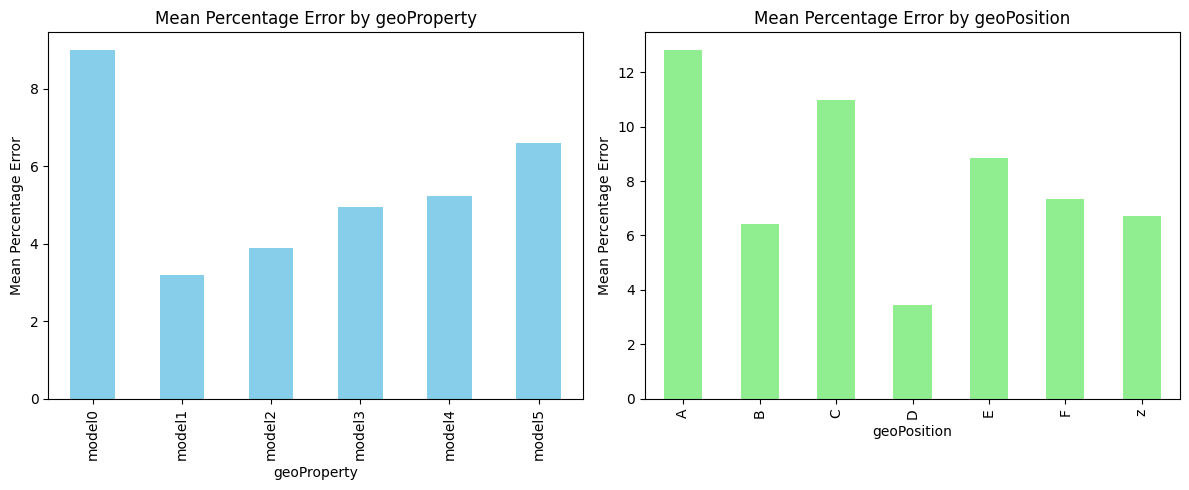

In [ ]:
# Create bar plots
plt.figure(figsize=(12, 5))

# Bar plot for 'geoProperty'
plt.subplot(1, 2, 1)
geoProperty_mean_error.plot(kind='bar', color='skyblue')
plt.title('Mean Percentage Error by geoProperty')
plt.xlabel('geoProperty')
plt.ylabel('Mean Percentage Error')

# Bar plot for 'geoPosition'
plt.subplot(1, 2, 2)
geoPosition_mean_error.plot(kind='bar', color='lightgreen')
plt.title('Mean Percentage Error by geoPosition')
plt.xlabel('geoPosition')
plt.ylabel('Mean Percentage Error')

plt.tight_layout()
